### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.shape

(34299, 12)

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
df = application_df.drop(columns=['EIN'])
df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
df.shape

(34299, 11)

In [5]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

### preprocessing 

In [6]:
name = df.NAME.value_counts()
name

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

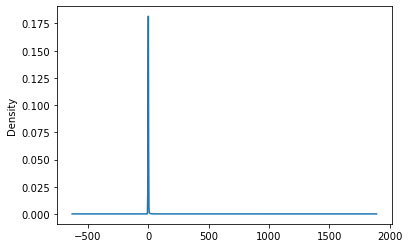

In [7]:
name.plot.density()

In [8]:
replace_name = list(name[name < 90].index)
for n in replace_name:
    df.NAME = df.NAME.replace(n, "Other")
df.NAME.value_counts()

Other                                                                 25608
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [9]:
income_amt = df.INCOME_AMT.value_counts()
income_amt

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [10]:
replace_income_amt = list(income_amt[income_amt < 500].index)
# Replace in dataframe
for inc in replace_income_amt:
    df.INCOME_AMT = df.INCOME_AMT.replace(inc,"Other")
    
# Check to make sure binning was successful
df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [11]:
use_case = df.USE_CASE.value_counts()
use_case

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [12]:
replace_use_case = list(use_case[use_case < 1000].index)
# Replace in dataframe
for usec in replace_use_case:
    df.USE_CASE = df.USE_CASE.replace(usec,"Other")
    
# Check to make sure binning was successful
df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [13]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
applicationType_counts = df['APPLICATION_TYPE'].value_counts()
applicationType_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

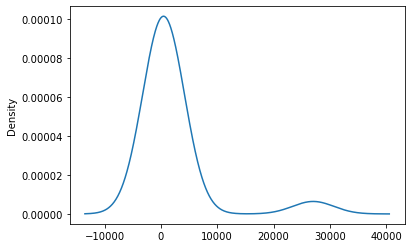

In [14]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
applicationType_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than 10k/1k/5oo
#  YOUR CODE GOES HERE
replace_application = list(applicationType_counts[applicationType_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [17]:
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

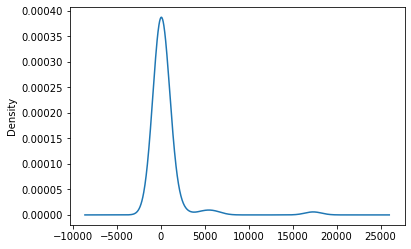

In [18]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

In [19]:
# Determine which values to replace if counts are less than 200
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 200].index)
# Replace in dataframe
for cls in replace_class:
    df.CLASSIFICATION = df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [20]:
affi = df['AFFILIATION'].value_counts()
affi

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

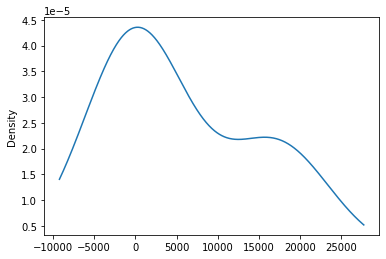

In [21]:
affi.plot.density()

In [22]:
# Determine which values to replace if counts are less than 5k
#  YOUR CODE GOES HERE
replace_affi = list(affi[affi < 5000].index)
# Replace in dataframe
for aff in replace_affi:
    df.AFFILIATION = df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [23]:
ask_amt = df.ASK_AMT.value_counts()
ask_amt

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [24]:
replace_ask_amt = list(ask_amt[ask_amt <= 3].index)
# Replace in dataframe
for amt in replace_ask_amt:
    df.ASK_AMT = df.ASK_AMT.replace(amt,">5k")
    
# Check to make sure binning was successful
df.ASK_AMT.value_counts()

5000    25398
>5k      8901
Name: ASK_AMT, dtype: int64

### encoding

In [25]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
categorical_list = df.dtypes[df.dtypes == "object"].index.tolist()
categorical_list

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [26]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list 
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(df[categorical_list].astype(str)))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(categorical_list)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_GAMMA THETA UPSILON,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_>5k
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
merged_df = df.merge(encode_df,left_index=True, right_index=True)
cleaned_df = merged_df.drop(categorical_list,axis=1)
cleaned_df.head()

,STATUS,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_GAMMA THETA UPSILON,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_>5k
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
# Split our preprocessed data into our features and target arrays
y = cleaned_df['IS_SUCCESSFUL'].values
X = cleaned_df.drop(['IS_SUCCESSFUL'],axis=1).values

In [29]:
X.shape

(34299, 74)

In [30]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=78)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
len(X_train_scaled[0])

74

### Deliverable 2: Compile, Train and Evaluate the Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

rf_model = rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Random forest predictive accuracy: 0.752


In [34]:
from sklearn.svm import SVC
# Create the SVM model
svm = SVC(kernel='linear')
# Train the model
svm.fit(X_train, y_train)
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.737


In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =185
hidden_nodes_layer2 = 95
hidden_nodes_layer3 = 65
#hidden_nodes_layer4 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 185)               13875     
                                                                 
 dense_1 (Dense)             (None, 95)                17670     
                                                                 
 dense_2 (Dense)             (None, 65)                6240      
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 37,851
Trainable params: 37,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# create callback
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,verbose=1,save_weight_only=True, save_freq=5)

In [37]:
# Train the model

# fit_model = nn.fit(X_train_scaled, y_train, epochs=200)
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 10:27 - loss: 0.7013 - accuracy: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5
  5/804 [..............................] - ETA: 13s - loss: 0.6508 - accuracy: 0.6500  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 11s - loss: 0.6322 - accuracy: 0.6844
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 15/804 [..............................] - ETA: 10s - loss: 0.6112 - accuracy: 0.6979
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 10s - loss: 0.6054 - accuracy: 0.6969
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 25/804 [..............................] - ETA: 11s - loss: 0.5974 - accuracy: 0.7063
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 11s - loss: 0.5787 - accuracy: 0.7156
Epoch 00001: saving model to checkpoints

285/804 [=========>....................] - ETA: 7s - loss: 0.5129 - accuracy: 0.7442
Epoch 00001: saving model to checkpoints/weights.01.hdf5
290/804 [=========>....................] - ETA: 7s - loss: 0.5117 - accuracy: 0.7450
Epoch 00001: saving model to checkpoints/weights.01.hdf5
295/804 [==========>...................] - ETA: 7s - loss: 0.5119 - accuracy: 0.7456
Epoch 00001: saving model to checkpoints/weights.01.hdf5
300/804 [==========>...................] - ETA: 7s - loss: 0.5119 - accuracy: 0.7465
Epoch 00001: saving model to checkpoints/weights.01.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 0.5121 - accuracy: 0.7458
Epoch 00001: saving model to checkpoints/weights.01.hdf5
310/804 [==========>...................] - ETA: 7s - loss: 0.5110 - accuracy: 0.7472
Epoch 00001: saving model to checkpoints/weights.01.hdf5
315/804 [==========>...................] - ETA: 7s - loss: 0.5120 - accuracy: 0.7465
Epoch 00001: saving model to checkpoints/weights.01.hdf5
320/80

575/804 [====================>.........] - ETA: 3s - loss: 0.5044 - accuracy: 0.7508
Epoch 00001: saving model to checkpoints/weights.01.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 0.5046 - accuracy: 0.7508
Epoch 00001: saving model to checkpoints/weights.01.hdf5
585/804 [====================>.........] - ETA: 3s - loss: 0.5041 - accuracy: 0.7509
Epoch 00001: saving model to checkpoints/weights.01.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.5042 - accuracy: 0.7510
Epoch 00001: saving model to checkpoints/weights.01.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.5042 - accuracy: 0.7508
Epoch 00001: saving model to checkpoints/weights.01.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.5045 - accuracy: 0.7507
Epoch 00001: saving model to checkpoints/weights.01.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.5043 - accuracy: 0.7507
Epoch 00001: saving model to checkpoints/weights.01.hdf5
610/80

 56/804 [=>............................] - ETA: 11s - loss: 0.5042 - accuracy: 0.7461
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 61/804 [=>............................] - ETA: 10s - loss: 0.4994 - accuracy: 0.7515
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 66/804 [=>............................] - ETA: 10s - loss: 0.5051 - accuracy: 0.7481
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 71/804 [=>............................] - ETA: 10s - loss: 0.5059 - accuracy: 0.7482
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 76/804 [=>............................] - ETA: 10s - loss: 0.5050 - accuracy: 0.7500
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 81/804 [==>...........................] - ETA: 10s - loss: 0.5040 - accuracy: 0.7512
Epoch 00002: saving model to checkpoints/weights.02.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.5022 - accuracy: 0.7507
Epoch 00002: saving model to checkpoints/weights.02.hdf5

346/804 [===========>..................] - ETA: 6s - loss: 0.4950 - accuracy: 0.7525
Epoch 00002: saving model to checkpoints/weights.02.hdf5
351/804 [============>.................] - ETA: 5s - loss: 0.4934 - accuracy: 0.7537
Epoch 00002: saving model to checkpoints/weights.02.hdf5
356/804 [============>.................] - ETA: 5s - loss: 0.4944 - accuracy: 0.7532
Epoch 00002: saving model to checkpoints/weights.02.hdf5
361/804 [============>.................] - ETA: 5s - loss: 0.4938 - accuracy: 0.7534
Epoch 00002: saving model to checkpoints/weights.02.hdf5
366/804 [============>.................] - ETA: 5s - loss: 0.4935 - accuracy: 0.7535
Epoch 00002: saving model to checkpoints/weights.02.hdf5
371/804 [============>.................] - ETA: 5s - loss: 0.4940 - accuracy: 0.7529
Epoch 00002: saving model to checkpoints/weights.02.hdf5
376/804 [=============>................] - ETA: 5s - loss: 0.4937 - accuracy: 0.7538
Epoch 00002: saving model to checkpoints/weights.02.hdf5
381/80

636/804 [======================>.......] - ETA: 2s - loss: 0.4906 - accuracy: 0.7562
Epoch 00002: saving model to checkpoints/weights.02.hdf5
641/804 [======================>.......] - ETA: 2s - loss: 0.4908 - accuracy: 0.7562
Epoch 00002: saving model to checkpoints/weights.02.hdf5
646/804 [=======================>......] - ETA: 2s - loss: 0.4913 - accuracy: 0.7559
Epoch 00002: saving model to checkpoints/weights.02.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.4911 - accuracy: 0.7559
Epoch 00002: saving model to checkpoints/weights.02.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.4908 - accuracy: 0.7561
Epoch 00002: saving model to checkpoints/weights.02.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.4904 - accuracy: 0.7561
Epoch 00002: saving model to checkpoints/weights.02.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.4907 - accuracy: 0.7560
Epoch 00002: saving model to checkpoints/weights.02.hdf5
671/80

117/804 [===>..........................] - ETA: 9s - loss: 0.4868 - accuracy: 0.7548
Epoch 00003: saving model to checkpoints/weights.03.hdf5
122/804 [===>..........................] - ETA: 9s - loss: 0.4889 - accuracy: 0.7541
Epoch 00003: saving model to checkpoints/weights.03.hdf5
127/804 [===>..........................] - ETA: 9s - loss: 0.4897 - accuracy: 0.7539
Epoch 00003: saving model to checkpoints/weights.03.hdf5
132/804 [===>..........................] - ETA: 8s - loss: 0.4875 - accuracy: 0.7554
Epoch 00003: saving model to checkpoints/weights.03.hdf5
137/804 [====>.........................] - ETA: 8s - loss: 0.4875 - accuracy: 0.7559
Epoch 00003: saving model to checkpoints/weights.03.hdf5
142/804 [====>.........................] - ETA: 8s - loss: 0.4875 - accuracy: 0.7564
Epoch 00003: saving model to checkpoints/weights.03.hdf5
147/804 [====>.........................] - ETA: 8s - loss: 0.4881 - accuracy: 0.7568
Epoch 00003: saving model to checkpoints/weights.03.hdf5
152/80

407/804 [==============>...............] - ETA: 5s - loss: 0.4871 - accuracy: 0.7571
Epoch 00003: saving model to checkpoints/weights.03.hdf5
412/804 [==============>...............] - ETA: 5s - loss: 0.4873 - accuracy: 0.7571
Epoch 00003: saving model to checkpoints/weights.03.hdf5
417/804 [==============>...............] - ETA: 5s - loss: 0.4869 - accuracy: 0.7574
Epoch 00003: saving model to checkpoints/weights.03.hdf5
422/804 [==============>...............] - ETA: 4s - loss: 0.4872 - accuracy: 0.7569
Epoch 00003: saving model to checkpoints/weights.03.hdf5
427/804 [==============>...............] - ETA: 4s - loss: 0.4867 - accuracy: 0.7574
Epoch 00003: saving model to checkpoints/weights.03.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.4869 - accuracy: 0.7576
Epoch 00003: saving model to checkpoints/weights.03.hdf5
437/804 [===============>..............] - ETA: 4s - loss: 0.4868 - accuracy: 0.7577
Epoch 00003: saving model to checkpoints/weights.03.hdf5
442/80

697/804 [=========================>....] - ETA: 1s - loss: 0.4853 - accuracy: 0.7580
Epoch 00003: saving model to checkpoints/weights.03.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.4855 - accuracy: 0.7576
Epoch 00003: saving model to checkpoints/weights.03.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.4857 - accuracy: 0.7578
Epoch 00003: saving model to checkpoints/weights.03.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4856 - accuracy: 0.7582
Epoch 00003: saving model to checkpoints/weights.03.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4856 - accuracy: 0.7582
Epoch 00003: saving model to checkpoints/weights.03.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 0.4854 - accuracy: 0.7584
Epoch 00003: saving model to checkpoints/weights.03.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.4859 - accuracy: 0.7581
Epoch 00003: saving model to checkpoints/weights.03.hdf5
732/80

178/804 [=====>........................] - ETA: 10s - loss: 0.4703 - accuracy: 0.7653
Epoch 00004: saving model to checkpoints/weights.04.hdf5
183/804 [=====>........................] - ETA: 9s - loss: 0.4704 - accuracy: 0.7650 
Epoch 00004: saving model to checkpoints/weights.04.hdf5
188/804 [======>.......................] - ETA: 9s - loss: 0.4704 - accuracy: 0.7655
Epoch 00004: saving model to checkpoints/weights.04.hdf5
193/804 [======>.......................] - ETA: 9s - loss: 0.4708 - accuracy: 0.7644
Epoch 00004: saving model to checkpoints/weights.04.hdf5
198/804 [======>.......................] - ETA: 9s - loss: 0.4687 - accuracy: 0.7661
Epoch 00004: saving model to checkpoints/weights.04.hdf5
203/804 [======>.......................] - ETA: 9s - loss: 0.4684 - accuracy: 0.7663
Epoch 00004: saving model to checkpoints/weights.04.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 0.4695 - accuracy: 0.7658
Epoch 00004: saving model to checkpoints/weights.04.hdf5
213/

468/804 [================>.............] - ETA: 4s - loss: 0.4782 - accuracy: 0.7630
Epoch 00004: saving model to checkpoints/weights.04.hdf5
473/804 [================>.............] - ETA: 4s - loss: 0.4790 - accuracy: 0.7629
Epoch 00004: saving model to checkpoints/weights.04.hdf5
478/804 [================>.............] - ETA: 4s - loss: 0.4789 - accuracy: 0.7631
Epoch 00004: saving model to checkpoints/weights.04.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4796 - accuracy: 0.7626
Epoch 00004: saving model to checkpoints/weights.04.hdf5
488/804 [=================>............] - ETA: 4s - loss: 0.4799 - accuracy: 0.7625
Epoch 00004: saving model to checkpoints/weights.04.hdf5
493/804 [=================>............] - ETA: 4s - loss: 0.4802 - accuracy: 0.7627
Epoch 00004: saving model to checkpoints/weights.04.hdf5
498/804 [=================>............] - ETA: 4s - loss: 0.4797 - accuracy: 0.7631
Epoch 00004: saving model to checkpoints/weights.04.hdf5
503/80

Epoch 00004: saving model to checkpoints/weights.04.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4835 - accuracy: 0.7602
Epoch 00004: saving model to checkpoints/weights.04.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4832 - accuracy: 0.7606
Epoch 00004: saving model to checkpoints/weights.04.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.4831 - accuracy: 0.7607
Epoch 00004: saving model to checkpoints/weights.04.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4832 - accuracy: 0.7605
Epoch 00004: saving model to checkpoints/weights.04.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4835 - accuracy: 0.7604
Epoch 00004: saving model to checkpoints/weights.04.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4831 - accuracy: 0.7607
Epoch 00004: saving model to checkpoints/weights.04.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4831 - accuracy: 0.7608
Epoch 

234/804 [=======>......................] - ETA: 7s - loss: 0.4772 - accuracy: 0.7654
Epoch 00005: saving model to checkpoints/weights.05.hdf5
239/804 [=======>......................] - ETA: 7s - loss: 0.4777 - accuracy: 0.7645
Epoch 00005: saving model to checkpoints/weights.05.hdf5
244/804 [========>.....................] - ETA: 7s - loss: 0.4775 - accuracy: 0.7649
Epoch 00005: saving model to checkpoints/weights.05.hdf5
249/804 [========>.....................] - ETA: 7s - loss: 0.4763 - accuracy: 0.7658
Epoch 00005: saving model to checkpoints/weights.05.hdf5
254/804 [========>.....................] - ETA: 7s - loss: 0.4747 - accuracy: 0.7666
Epoch 00005: saving model to checkpoints/weights.05.hdf5
259/804 [========>.....................] - ETA: 7s - loss: 0.4765 - accuracy: 0.7653
Epoch 00005: saving model to checkpoints/weights.05.hdf5
264/804 [========>.....................] - ETA: 7s - loss: 0.4773 - accuracy: 0.7650
Epoch 00005: saving model to checkpoints/weights.05.hdf5
269/80

524/804 [==================>...........] - ETA: 3s - loss: 0.4838 - accuracy: 0.7605
Epoch 00005: saving model to checkpoints/weights.05.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.4834 - accuracy: 0.7609
Epoch 00005: saving model to checkpoints/weights.05.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.4835 - accuracy: 0.7608
Epoch 00005: saving model to checkpoints/weights.05.hdf5
539/804 [===================>..........] - ETA: 3s - loss: 0.4837 - accuracy: 0.7607
Epoch 00005: saving model to checkpoints/weights.05.hdf5
544/804 [===================>..........] - ETA: 3s - loss: 0.4833 - accuracy: 0.7607
Epoch 00005: saving model to checkpoints/weights.05.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.4839 - accuracy: 0.7603
Epoch 00005: saving model to checkpoints/weights.05.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.4836 - accuracy: 0.7607
Epoch 00005: saving model to checkpoints/weights.05.hdf5
559/80

  5/804 [..............................] - ETA: 12s - loss: 0.3550 - accuracy: 0.8125
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 10/804 [..............................] - ETA: 10s - loss: 0.4200 - accuracy: 0.7812
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 15/804 [..............................] - ETA: 10s - loss: 0.4494 - accuracy: 0.7708
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.4592 - accuracy: 0.7578 
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 25/804 [..............................] - ETA: 10s - loss: 0.4527 - accuracy: 0.7663
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 30/804 [>.............................] - ETA: 9s - loss: 0.4622 - accuracy: 0.7583 
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 35/804 [>.............................] - ETA: 9s - loss: 0.4512 - accuracy: 0.7705
Epoch 00006: saving model to checkpoints/weights.06.hdf5


295/804 [==========>...................] - ETA: 6s - loss: 0.4821 - accuracy: 0.7589
Epoch 00006: saving model to checkpoints/weights.06.hdf5
300/804 [==========>...................] - ETA: 6s - loss: 0.4827 - accuracy: 0.7580
Epoch 00006: saving model to checkpoints/weights.06.hdf5
305/804 [==========>...................] - ETA: 6s - loss: 0.4824 - accuracy: 0.7581
Epoch 00006: saving model to checkpoints/weights.06.hdf5
310/804 [==========>...................] - ETA: 6s - loss: 0.4824 - accuracy: 0.7573
Epoch 00006: saving model to checkpoints/weights.06.hdf5
315/804 [==========>...................] - ETA: 6s - loss: 0.4821 - accuracy: 0.7575
Epoch 00006: saving model to checkpoints/weights.06.hdf5
320/804 [==========>...................] - ETA: 6s - loss: 0.4822 - accuracy: 0.7574
Epoch 00006: saving model to checkpoints/weights.06.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.4830 - accuracy: 0.7570
Epoch 00006: saving model to checkpoints/weights.06.hdf5
330/80

585/804 [====================>.........] - ETA: 2s - loss: 0.4818 - accuracy: 0.7620
Epoch 00006: saving model to checkpoints/weights.06.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.4822 - accuracy: 0.7615
Epoch 00006: saving model to checkpoints/weights.06.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.4821 - accuracy: 0.7614
Epoch 00006: saving model to checkpoints/weights.06.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.4822 - accuracy: 0.7614
Epoch 00006: saving model to checkpoints/weights.06.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4828 - accuracy: 0.7610
Epoch 00006: saving model to checkpoints/weights.06.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.4829 - accuracy: 0.7608
Epoch 00006: saving model to checkpoints/weights.06.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.4826 - accuracy: 0.7610
Epoch 00006: saving model to checkpoints/weights.06.hdf5
620/80

 66/804 [=>............................] - ETA: 10s - loss: 0.4769 - accuracy: 0.7571
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 71/804 [=>............................] - ETA: 10s - loss: 0.4805 - accuracy: 0.7557
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 76/804 [=>............................] - ETA: 10s - loss: 0.4830 - accuracy: 0.7533
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 81/804 [==>...........................] - ETA: 10s - loss: 0.4833 - accuracy: 0.7562
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.4809 - accuracy: 0.7580
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 91/804 [==>...........................] - ETA: 10s - loss: 0.4798 - accuracy: 0.7593
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.4809 - accuracy: 0.7585
Epoch 00007: saving model to checkpoints/weights.07.hdf5

356/804 [============>.................] - ETA: 6s - loss: 0.4790 - accuracy: 0.7621
Epoch 00007: saving model to checkpoints/weights.07.hdf5
361/804 [============>.................] - ETA: 6s - loss: 0.4789 - accuracy: 0.7626
Epoch 00007: saving model to checkpoints/weights.07.hdf5
366/804 [============>.................] - ETA: 6s - loss: 0.4795 - accuracy: 0.7624
Epoch 00007: saving model to checkpoints/weights.07.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.4796 - accuracy: 0.7620
Epoch 00007: saving model to checkpoints/weights.07.hdf5
376/804 [=============>................] - ETA: 6s - loss: 0.4792 - accuracy: 0.7622
Epoch 00007: saving model to checkpoints/weights.07.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.4788 - accuracy: 0.7620
Epoch 00007: saving model to checkpoints/weights.07.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.4791 - accuracy: 0.7617
Epoch 00007: saving model to checkpoints/weights.07.hdf5
391/80

646/804 [=======================>......] - ETA: 2s - loss: 0.4790 - accuracy: 0.7629
Epoch 00007: saving model to checkpoints/weights.07.hdf5
651/804 [=======================>......] - ETA: 2s - loss: 0.4789 - accuracy: 0.7629
Epoch 00007: saving model to checkpoints/weights.07.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 0.4790 - accuracy: 0.7627
Epoch 00007: saving model to checkpoints/weights.07.hdf5
661/804 [=======================>......] - ETA: 2s - loss: 0.4792 - accuracy: 0.7626
Epoch 00007: saving model to checkpoints/weights.07.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.4792 - accuracy: 0.7626
Epoch 00007: saving model to checkpoints/weights.07.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.4793 - accuracy: 0.7625
Epoch 00007: saving model to checkpoints/weights.07.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4798 - accuracy: 0.7621
Epoch 00007: saving model to checkpoints/weights.07.hdf5
681/80

127/804 [===>..........................] - ETA: 9s - loss: 0.4771 - accuracy: 0.7608
Epoch 00008: saving model to checkpoints/weights.08.hdf5
132/804 [===>..........................] - ETA: 9s - loss: 0.4770 - accuracy: 0.7602
Epoch 00008: saving model to checkpoints/weights.08.hdf5
137/804 [====>.........................] - ETA: 9s - loss: 0.4766 - accuracy: 0.7600
Epoch 00008: saving model to checkpoints/weights.08.hdf5
142/804 [====>.........................] - ETA: 9s - loss: 0.4769 - accuracy: 0.7606
Epoch 00008: saving model to checkpoints/weights.08.hdf5
147/804 [====>.........................] - ETA: 9s - loss: 0.4748 - accuracy: 0.7628
Epoch 00008: saving model to checkpoints/weights.08.hdf5
152/804 [====>.........................] - ETA: 9s - loss: 0.4740 - accuracy: 0.7640
Epoch 00008: saving model to checkpoints/weights.08.hdf5
157/804 [====>.........................] - ETA: 8s - loss: 0.4752 - accuracy: 0.7633
Epoch 00008: saving model to checkpoints/weights.08.hdf5
162/80

417/804 [==============>...............] - ETA: 5s - loss: 0.4768 - accuracy: 0.7636
Epoch 00008: saving model to checkpoints/weights.08.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.4760 - accuracy: 0.7643
Epoch 00008: saving model to checkpoints/weights.08.hdf5
427/804 [==============>...............] - ETA: 5s - loss: 0.4764 - accuracy: 0.7644
Epoch 00008: saving model to checkpoints/weights.08.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.4765 - accuracy: 0.7643
Epoch 00008: saving model to checkpoints/weights.08.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.4767 - accuracy: 0.7638
Epoch 00008: saving model to checkpoints/weights.08.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.4771 - accuracy: 0.7634
Epoch 00008: saving model to checkpoints/weights.08.hdf5
447/804 [===============>..............] - ETA: 4s - loss: 0.4772 - accuracy: 0.7633
Epoch 00008: saving model to checkpoints/weights.08.hdf5
452/80

707/804 [=========================>....] - ETA: 1s - loss: 0.4789 - accuracy: 0.7619
Epoch 00008: saving model to checkpoints/weights.08.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4789 - accuracy: 0.7618
Epoch 00008: saving model to checkpoints/weights.08.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4786 - accuracy: 0.7620
Epoch 00008: saving model to checkpoints/weights.08.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 0.4788 - accuracy: 0.7619
Epoch 00008: saving model to checkpoints/weights.08.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4787 - accuracy: 0.7618
Epoch 00008: saving model to checkpoints/weights.08.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.4785 - accuracy: 0.7620
Epoch 00008: saving model to checkpoints/weights.08.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4783 - accuracy: 0.7620
Epoch 00008: saving model to checkpoints/weights.08.hdf5
742/80

188/804 [======>.......................] - ETA: 9s - loss: 0.4724 - accuracy: 0.7663
Epoch 00009: saving model to checkpoints/weights.09.hdf5
193/804 [======>.......................] - ETA: 9s - loss: 0.4729 - accuracy: 0.7652
Epoch 00009: saving model to checkpoints/weights.09.hdf5
198/804 [======>.......................] - ETA: 9s - loss: 0.4733 - accuracy: 0.7653
Epoch 00009: saving model to checkpoints/weights.09.hdf5
203/804 [======>.......................] - ETA: 9s - loss: 0.4746 - accuracy: 0.7635
Epoch 00009: saving model to checkpoints/weights.09.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 0.4744 - accuracy: 0.7638
Epoch 00009: saving model to checkpoints/weights.09.hdf5
213/804 [======>.......................] - ETA: 9s - loss: 0.4737 - accuracy: 0.7644
Epoch 00009: saving model to checkpoints/weights.09.hdf5
218/804 [=======>......................] - ETA: 9s - loss: 0.4747 - accuracy: 0.7638
Epoch 00009: saving model to checkpoints/weights.09.hdf5
223/80

478/804 [================>.............] - ETA: 4s - loss: 0.4776 - accuracy: 0.7614
Epoch 00009: saving model to checkpoints/weights.09.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4772 - accuracy: 0.7618
Epoch 00009: saving model to checkpoints/weights.09.hdf5
488/804 [=================>............] - ETA: 4s - loss: 0.4771 - accuracy: 0.7616
Epoch 00009: saving model to checkpoints/weights.09.hdf5
493/804 [=================>............] - ETA: 4s - loss: 0.4773 - accuracy: 0.7612
Epoch 00009: saving model to checkpoints/weights.09.hdf5
498/804 [=================>............] - ETA: 4s - loss: 0.4777 - accuracy: 0.7611
Epoch 00009: saving model to checkpoints/weights.09.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.4783 - accuracy: 0.7607
Epoch 00009: saving model to checkpoints/weights.09.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.4783 - accuracy: 0.7607
Epoch 00009: saving model to checkpoints/weights.09.hdf5
513/80

768/804 [===========================>..] - ETA: 0s - loss: 0.4786 - accuracy: 0.7637
Epoch 00009: saving model to checkpoints/weights.09.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4784 - accuracy: 0.7637
Epoch 00009: saving model to checkpoints/weights.09.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4784 - accuracy: 0.7635
Epoch 00009: saving model to checkpoints/weights.09.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4786 - accuracy: 0.7634
Epoch 00009: saving model to checkpoints/weights.09.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4786 - accuracy: 0.7636
Epoch 00009: saving model to checkpoints/weights.09.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.7635
Epoch 00009: saving model to checkpoints/weights.09.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4791 - accuracy: 0.7630
Epoch 00009: saving model to checkpoints/weights.09.hdf5
804/80

249/804 [========>.....................] - ETA: 7s - loss: 0.4781 - accuracy: 0.7653
Epoch 00010: saving model to checkpoints/weights.10.hdf5
254/804 [========>.....................] - ETA: 7s - loss: 0.4793 - accuracy: 0.7639
Epoch 00010: saving model to checkpoints/weights.10.hdf5
259/804 [========>.....................] - ETA: 7s - loss: 0.4810 - accuracy: 0.7630
Epoch 00010: saving model to checkpoints/weights.10.hdf5
264/804 [========>.....................] - ETA: 7s - loss: 0.4808 - accuracy: 0.7633
Epoch 00010: saving model to checkpoints/weights.10.hdf5
269/804 [=========>....................] - ETA: 7s - loss: 0.4809 - accuracy: 0.7631
Epoch 00010: saving model to checkpoints/weights.10.hdf5
274/804 [=========>....................] - ETA: 6s - loss: 0.4804 - accuracy: 0.7638
Epoch 00010: saving model to checkpoints/weights.10.hdf5
279/804 [=========>....................] - ETA: 6s - loss: 0.4813 - accuracy: 0.7634
Epoch 00010: saving model to checkpoints/weights.10.hdf5
284/80

539/804 [===================>..........] - ETA: 3s - loss: 0.4778 - accuracy: 0.7665
Epoch 00010: saving model to checkpoints/weights.10.hdf5
544/804 [===================>..........] - ETA: 3s - loss: 0.4777 - accuracy: 0.7666
Epoch 00010: saving model to checkpoints/weights.10.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.4771 - accuracy: 0.7668
Epoch 00010: saving model to checkpoints/weights.10.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.4769 - accuracy: 0.7672
Epoch 00010: saving model to checkpoints/weights.10.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.4772 - accuracy: 0.7669
Epoch 00010: saving model to checkpoints/weights.10.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.4775 - accuracy: 0.7669
Epoch 00010: saving model to checkpoints/weights.10.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.4772 - accuracy: 0.7672
Epoch 00010: saving model to checkpoints/weights.10.hdf5
574/80

 20/804 [..............................] - ETA: 11s - loss: 0.4574 - accuracy: 0.7672
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 25/804 [..............................] - ETA: 11s - loss: 0.4751 - accuracy: 0.7500
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 30/804 [>.............................] - ETA: 10s - loss: 0.4779 - accuracy: 0.7531
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 35/804 [>.............................] - ETA: 10s - loss: 0.4775 - accuracy: 0.7571
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 40/804 [>.............................] - ETA: 10s - loss: 0.4833 - accuracy: 0.7523
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 45/804 [>.............................] - ETA: 10s - loss: 0.4856 - accuracy: 0.7514
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 50/804 [>.............................] - ETA: 10s - loss: 0.4788 - accuracy: 0.7538
Epoch 00011: saving model to checkpoints/weights.11.hdf5

310/804 [==========>...................] - ETA: 6s - loss: 0.4753 - accuracy: 0.7639
Epoch 00011: saving model to checkpoints/weights.11.hdf5
315/804 [==========>...................] - ETA: 6s - loss: 0.4766 - accuracy: 0.7631
Epoch 00011: saving model to checkpoints/weights.11.hdf5
320/804 [==========>...................] - ETA: 6s - loss: 0.4770 - accuracy: 0.7631
Epoch 00011: saving model to checkpoints/weights.11.hdf5
325/804 [===========>..................] - ETA: 6s - loss: 0.4769 - accuracy: 0.7633
Epoch 00011: saving model to checkpoints/weights.11.hdf5
330/804 [===========>..................] - ETA: 6s - loss: 0.4771 - accuracy: 0.7632
Epoch 00011: saving model to checkpoints/weights.11.hdf5
335/804 [===========>..................] - ETA: 6s - loss: 0.4769 - accuracy: 0.7636
Epoch 00011: saving model to checkpoints/weights.11.hdf5
340/804 [===========>..................] - ETA: 6s - loss: 0.4766 - accuracy: 0.7640
Epoch 00011: saving model to checkpoints/weights.11.hdf5
345/80

600/804 [=====================>........] - ETA: 2s - loss: 0.4745 - accuracy: 0.7663
Epoch 00011: saving model to checkpoints/weights.11.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4743 - accuracy: 0.7663
Epoch 00011: saving model to checkpoints/weights.11.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.4743 - accuracy: 0.7669
Epoch 00011: saving model to checkpoints/weights.11.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.4743 - accuracy: 0.7669
Epoch 00011: saving model to checkpoints/weights.11.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.4745 - accuracy: 0.7667
Epoch 00011: saving model to checkpoints/weights.11.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.4745 - accuracy: 0.7667
Epoch 00011: saving model to checkpoints/weights.11.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.4752 - accuracy: 0.7665
Epoch 00011: saving model to checkpoints/weights.11.hdf5
635/80

 81/804 [==>...........................] - ETA: 10s - loss: 0.4853 - accuracy: 0.7608
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.4843 - accuracy: 0.7594
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 91/804 [==>...........................] - ETA: 10s - loss: 0.4853 - accuracy: 0.7582
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 96/804 [==>...........................] - ETA: 9s - loss: 0.4860 - accuracy: 0.7565 
Epoch 00012: saving model to checkpoints/weights.12.hdf5
101/804 [==>...........................] - ETA: 9s - loss: 0.4854 - accuracy: 0.7556
Epoch 00012: saving model to checkpoints/weights.12.hdf5
106/804 [==>...........................] - ETA: 9s - loss: 0.4820 - accuracy: 0.7583
Epoch 00012: saving model to checkpoints/weights.12.hdf5
111/804 [===>..........................] - ETA: 9s - loss: 0.4818 - accuracy: 0.7582
Epoch 00012: saving model to checkpoints/weights.12.hdf5
11

371/804 [============>.................] - ETA: 5s - loss: 0.4761 - accuracy: 0.7647
Epoch 00012: saving model to checkpoints/weights.12.hdf5
376/804 [=============>................] - ETA: 5s - loss: 0.4769 - accuracy: 0.7641
Epoch 00012: saving model to checkpoints/weights.12.hdf5
381/804 [=============>................] - ETA: 5s - loss: 0.4768 - accuracy: 0.7640
Epoch 00012: saving model to checkpoints/weights.12.hdf5
386/804 [=============>................] - ETA: 5s - loss: 0.4762 - accuracy: 0.7643
Epoch 00012: saving model to checkpoints/weights.12.hdf5
391/804 [=============>................] - ETA: 5s - loss: 0.4768 - accuracy: 0.7641
Epoch 00012: saving model to checkpoints/weights.12.hdf5
396/804 [=============>................] - ETA: 5s - loss: 0.4779 - accuracy: 0.7631
Epoch 00012: saving model to checkpoints/weights.12.hdf5
401/804 [=============>................] - ETA: 5s - loss: 0.4779 - accuracy: 0.7630
Epoch 00012: saving model to checkpoints/weights.12.hdf5
406/80

661/804 [=======================>......] - ETA: 1s - loss: 0.4758 - accuracy: 0.7650
Epoch 00012: saving model to checkpoints/weights.12.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.4758 - accuracy: 0.7651
Epoch 00012: saving model to checkpoints/weights.12.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.4755 - accuracy: 0.7653
Epoch 00012: saving model to checkpoints/weights.12.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4759 - accuracy: 0.7651
Epoch 00012: saving model to checkpoints/weights.12.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4755 - accuracy: 0.7658
Epoch 00012: saving model to checkpoints/weights.12.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4754 - accuracy: 0.7660
Epoch 00012: saving model to checkpoints/weights.12.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4755 - accuracy: 0.7663
Epoch 00012: saving model to checkpoints/weights.12.hdf5
696/80

142/804 [====>.........................] - ETA: 8s - loss: 0.4822 - accuracy: 0.7542
Epoch 00013: saving model to checkpoints/weights.13.hdf5
147/804 [====>.........................] - ETA: 8s - loss: 0.4822 - accuracy: 0.7549
Epoch 00013: saving model to checkpoints/weights.13.hdf5
152/804 [====>.........................] - ETA: 8s - loss: 0.4817 - accuracy: 0.7556
Epoch 00013: saving model to checkpoints/weights.13.hdf5
157/804 [====>.........................] - ETA: 8s - loss: 0.4834 - accuracy: 0.7558
Epoch 00013: saving model to checkpoints/weights.13.hdf5
162/804 [=====>........................] - ETA: 8s - loss: 0.4825 - accuracy: 0.7564
Epoch 00013: saving model to checkpoints/weights.13.hdf5
167/804 [=====>........................] - ETA: 8s - loss: 0.4841 - accuracy: 0.7554
Epoch 00013: saving model to checkpoints/weights.13.hdf5
172/804 [=====>........................] - ETA: 8s - loss: 0.4849 - accuracy: 0.7553
Epoch 00013: saving model to checkpoints/weights.13.hdf5
177/80

432/804 [===============>..............] - ETA: 5s - loss: 0.4718 - accuracy: 0.7690
Epoch 00013: saving model to checkpoints/weights.13.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.4727 - accuracy: 0.7686
Epoch 00013: saving model to checkpoints/weights.13.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.4736 - accuracy: 0.7681
Epoch 00013: saving model to checkpoints/weights.13.hdf5
447/804 [===============>..............] - ETA: 4s - loss: 0.4730 - accuracy: 0.7685
Epoch 00013: saving model to checkpoints/weights.13.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.4734 - accuracy: 0.7680
Epoch 00013: saving model to checkpoints/weights.13.hdf5
457/804 [================>.............] - ETA: 4s - loss: 0.4730 - accuracy: 0.7682
Epoch 00013: saving model to checkpoints/weights.13.hdf5
462/804 [================>.............] - ETA: 4s - loss: 0.4727 - accuracy: 0.7681
Epoch 00013: saving model to checkpoints/weights.13.hdf5
467/80

722/804 [=========================>....] - ETA: 1s - loss: 0.4754 - accuracy: 0.7664
Epoch 00013: saving model to checkpoints/weights.13.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4750 - accuracy: 0.7667
Epoch 00013: saving model to checkpoints/weights.13.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4749 - accuracy: 0.7668
Epoch 00013: saving model to checkpoints/weights.13.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4749 - accuracy: 0.7665
Epoch 00013: saving model to checkpoints/weights.13.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4750 - accuracy: 0.7663
Epoch 00013: saving model to checkpoints/weights.13.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4749 - accuracy: 0.7664
Epoch 00013: saving model to checkpoints/weights.13.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4751 - accuracy: 0.7665
Epoch 00013: saving model to checkpoints/weights.13.hdf5
757/80

203/804 [======>.......................] - ETA: 8s - loss: 0.4724 - accuracy: 0.7677
Epoch 00014: saving model to checkpoints/weights.14.hdf5
208/804 [======>.......................] - ETA: 8s - loss: 0.4718 - accuracy: 0.7685
Epoch 00014: saving model to checkpoints/weights.14.hdf5
213/804 [======>.......................] - ETA: 8s - loss: 0.4710 - accuracy: 0.7688
Epoch 00014: saving model to checkpoints/weights.14.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 0.4701 - accuracy: 0.7698
Epoch 00014: saving model to checkpoints/weights.14.hdf5
223/804 [=======>......................] - ETA: 8s - loss: 0.4696 - accuracy: 0.7706
Epoch 00014: saving model to checkpoints/weights.14.hdf5
228/804 [=======>......................] - ETA: 8s - loss: 0.4704 - accuracy: 0.7699
Epoch 00014: saving model to checkpoints/weights.14.hdf5
233/804 [=======>......................] - ETA: 7s - loss: 0.4694 - accuracy: 0.7701
Epoch 00014: saving model to checkpoints/weights.14.hdf5
238/80

493/804 [=================>............] - ETA: 4s - loss: 0.4752 - accuracy: 0.7669
Epoch 00014: saving model to checkpoints/weights.14.hdf5
498/804 [=================>............] - ETA: 4s - loss: 0.4757 - accuracy: 0.7665
Epoch 00014: saving model to checkpoints/weights.14.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.4760 - accuracy: 0.7663
Epoch 00014: saving model to checkpoints/weights.14.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.4760 - accuracy: 0.7661
Epoch 00014: saving model to checkpoints/weights.14.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 0.4764 - accuracy: 0.7655
Epoch 00014: saving model to checkpoints/weights.14.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.4765 - accuracy: 0.7654
Epoch 00014: saving model to checkpoints/weights.14.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.4766 - accuracy: 0.7652
Epoch 00014: saving model to checkpoints/weights.14.hdf5
528/80

783/804 [============================>.] - ETA: 0s - loss: 0.4749 - accuracy: 0.7670
Epoch 00014: saving model to checkpoints/weights.14.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.7669
Epoch 00014: saving model to checkpoints/weights.14.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.7669
Epoch 00014: saving model to checkpoints/weights.14.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.7668
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.4754 - accuracy: 0.7662
Epoch 15/100
  1/804 [..............................] - ETA: 3s - loss: 0.3313 - accuracy: 0.8438
Epoch 00015: saving model to checkpoints/weights.15.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.4591 - accuracy: 0.7734
Epoch 00015: saving model to checkpoints/weights.15.hdf5
  9/804 [..............................] - 

264/804 [========>.....................] - ETA: 11s - loss: 0.4688 - accuracy: 0.7708
Epoch 00015: saving model to checkpoints/weights.15.hdf5
269/804 [=========>....................] - ETA: 10s - loss: 0.4706 - accuracy: 0.7701
Epoch 00015: saving model to checkpoints/weights.15.hdf5
274/804 [=========>....................] - ETA: 10s - loss: 0.4704 - accuracy: 0.7701
Epoch 00015: saving model to checkpoints/weights.15.hdf5
279/804 [=========>....................] - ETA: 10s - loss: 0.4697 - accuracy: 0.7707
Epoch 00015: saving model to checkpoints/weights.15.hdf5
284/804 [=========>....................] - ETA: 10s - loss: 0.4697 - accuracy: 0.7710
Epoch 00015: saving model to checkpoints/weights.15.hdf5
289/804 [=========>....................] - ETA: 10s - loss: 0.4697 - accuracy: 0.7708
Epoch 00015: saving model to checkpoints/weights.15.hdf5
294/804 [=========>....................] - ETA: 10s - loss: 0.4691 - accuracy: 0.7712
Epoch 00015: saving model to checkpoints/weights.15.hdf5

554/804 [===================>..........] - ETA: 4s - loss: 0.4751 - accuracy: 0.7650
Epoch 00015: saving model to checkpoints/weights.15.hdf5
559/804 [===================>..........] - ETA: 4s - loss: 0.4748 - accuracy: 0.7652
Epoch 00015: saving model to checkpoints/weights.15.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.4748 - accuracy: 0.7652
Epoch 00015: saving model to checkpoints/weights.15.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.4745 - accuracy: 0.7655
Epoch 00015: saving model to checkpoints/weights.15.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 0.4744 - accuracy: 0.7652
Epoch 00015: saving model to checkpoints/weights.15.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.4740 - accuracy: 0.7657
Epoch 00015: saving model to checkpoints/weights.15.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.4744 - accuracy: 0.7657
Epoch 00015: saving model to checkpoints/weights.15.hdf5
589/80

 35/804 [>.............................] - ETA: 16s - loss: 0.4461 - accuracy: 0.7804
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 40/804 [>.............................] - ETA: 15s - loss: 0.4448 - accuracy: 0.7820
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 45/804 [>.............................] - ETA: 15s - loss: 0.4513 - accuracy: 0.7785
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 50/804 [>.............................] - ETA: 14s - loss: 0.4526 - accuracy: 0.7806
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 55/804 [=>............................] - ETA: 13s - loss: 0.4557 - accuracy: 0.7750
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 60/804 [=>............................] - ETA: 13s - loss: 0.4556 - accuracy: 0.7766
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 65/804 [=>............................] - ETA: 13s - loss: 0.4582 - accuracy: 0.7740
Epoch 00016: saving model to checkpoints/weights.16.hdf5

320/804 [==========>...................] - ETA: 7s - loss: 0.4713 - accuracy: 0.7654
Epoch 00016: saving model to checkpoints/weights.16.hdf5
325/804 [===========>..................] - ETA: 7s - loss: 0.4719 - accuracy: 0.7653
Epoch 00016: saving model to checkpoints/weights.16.hdf5
330/804 [===========>..................] - ETA: 7s - loss: 0.4723 - accuracy: 0.7654
Epoch 00016: saving model to checkpoints/weights.16.hdf5
335/804 [===========>..................] - ETA: 7s - loss: 0.4717 - accuracy: 0.7657
Epoch 00016: saving model to checkpoints/weights.16.hdf5
340/804 [===========>..................] - ETA: 7s - loss: 0.4729 - accuracy: 0.7651
Epoch 00016: saving model to checkpoints/weights.16.hdf5
345/804 [===========>..................] - ETA: 7s - loss: 0.4738 - accuracy: 0.7640
Epoch 00016: saving model to checkpoints/weights.16.hdf5
350/804 [============>.................] - ETA: 7s - loss: 0.4740 - accuracy: 0.7635
Epoch 00016: saving model to checkpoints/weights.16.hdf5
355/80

610/804 [=====================>........] - ETA: 3s - loss: 0.4771 - accuracy: 0.7626
Epoch 00016: saving model to checkpoints/weights.16.hdf5
615/804 [=====================>........] - ETA: 3s - loss: 0.4771 - accuracy: 0.7626
Epoch 00016: saving model to checkpoints/weights.16.hdf5
620/804 [======================>.......] - ETA: 3s - loss: 0.4774 - accuracy: 0.7621
Epoch 00016: saving model to checkpoints/weights.16.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.4777 - accuracy: 0.7620
Epoch 00016: saving model to checkpoints/weights.16.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.4772 - accuracy: 0.7624
Epoch 00016: saving model to checkpoints/weights.16.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.4768 - accuracy: 0.7627
Epoch 00016: saving model to checkpoints/weights.16.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.4769 - accuracy: 0.7627
Epoch 00016: saving model to checkpoints/weights.16.hdf5
645/80

 91/804 [==>...........................] - ETA: 13s - loss: 0.4722 - accuracy: 0.7679
Epoch 00017: saving model to checkpoints/weights.17.hdf5
 96/804 [==>...........................] - ETA: 13s - loss: 0.4745 - accuracy: 0.7673
Epoch 00017: saving model to checkpoints/weights.17.hdf5
101/804 [==>...........................] - ETA: 13s - loss: 0.4746 - accuracy: 0.7673
Epoch 00017: saving model to checkpoints/weights.17.hdf5
106/804 [==>...........................] - ETA: 13s - loss: 0.4744 - accuracy: 0.7662
Epoch 00017: saving model to checkpoints/weights.17.hdf5
111/804 [===>..........................] - ETA: 13s - loss: 0.4749 - accuracy: 0.7680
Epoch 00017: saving model to checkpoints/weights.17.hdf5
116/804 [===>..........................] - ETA: 13s - loss: 0.4731 - accuracy: 0.7689
Epoch 00017: saving model to checkpoints/weights.17.hdf5
121/804 [===>..........................] - ETA: 13s - loss: 0.4738 - accuracy: 0.7683
Epoch 00017: saving model to checkpoints/weights.17.hdf5

376/804 [=============>................] - ETA: 6s - loss: 0.4758 - accuracy: 0.7645
Epoch 00017: saving model to checkpoints/weights.17.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.4761 - accuracy: 0.7642
Epoch 00017: saving model to checkpoints/weights.17.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.4762 - accuracy: 0.7644
Epoch 00017: saving model to checkpoints/weights.17.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.4764 - accuracy: 0.7643
Epoch 00017: saving model to checkpoints/weights.17.hdf5
396/804 [=============>................] - ETA: 6s - loss: 0.4766 - accuracy: 0.7643
Epoch 00017: saving model to checkpoints/weights.17.hdf5
401/804 [=============>................] - ETA: 6s - loss: 0.4768 - accuracy: 0.7643
Epoch 00017: saving model to checkpoints/weights.17.hdf5
406/804 [==============>...............] - ETA: 5s - loss: 0.4771 - accuracy: 0.7642
Epoch 00017: saving model to checkpoints/weights.17.hdf5
411/80

666/804 [=======================>......] - ETA: 1s - loss: 0.4726 - accuracy: 0.7683
Epoch 00017: saving model to checkpoints/weights.17.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.4729 - accuracy: 0.7680
Epoch 00017: saving model to checkpoints/weights.17.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4727 - accuracy: 0.7680
Epoch 00017: saving model to checkpoints/weights.17.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4725 - accuracy: 0.7681
Epoch 00017: saving model to checkpoints/weights.17.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4727 - accuracy: 0.7678
Epoch 00017: saving model to checkpoints/weights.17.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4722 - accuracy: 0.7681
Epoch 00017: saving model to checkpoints/weights.17.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4723 - accuracy: 0.7684
Epoch 00017: saving model to checkpoints/weights.17.hdf5
701/80

147/804 [====>.........................] - ETA: 8s - loss: 0.4742 - accuracy: 0.7640
Epoch 00018: saving model to checkpoints/weights.18.hdf5
152/804 [====>.........................] - ETA: 8s - loss: 0.4747 - accuracy: 0.7636
Epoch 00018: saving model to checkpoints/weights.18.hdf5
157/804 [====>.........................] - ETA: 8s - loss: 0.4754 - accuracy: 0.7629
Epoch 00018: saving model to checkpoints/weights.18.hdf5
162/804 [=====>........................] - ETA: 8s - loss: 0.4741 - accuracy: 0.7637
Epoch 00018: saving model to checkpoints/weights.18.hdf5
167/804 [=====>........................] - ETA: 8s - loss: 0.4737 - accuracy: 0.7635
Epoch 00018: saving model to checkpoints/weights.18.hdf5
172/804 [=====>........................] - ETA: 7s - loss: 0.4741 - accuracy: 0.7634
Epoch 00018: saving model to checkpoints/weights.18.hdf5
177/804 [=====>........................] - ETA: 7s - loss: 0.4743 - accuracy: 0.7639
Epoch 00018: saving model to checkpoints/weights.18.hdf5
183/80

437/804 [===============>..............] - ETA: 4s - loss: 0.4751 - accuracy: 0.7655
Epoch 00018: saving model to checkpoints/weights.18.hdf5
442/804 [===============>..............] - ETA: 4s - loss: 0.4749 - accuracy: 0.7656
Epoch 00018: saving model to checkpoints/weights.18.hdf5
447/804 [===============>..............] - ETA: 4s - loss: 0.4750 - accuracy: 0.7655
Epoch 00018: saving model to checkpoints/weights.18.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.4747 - accuracy: 0.7656
Epoch 00018: saving model to checkpoints/weights.18.hdf5
457/804 [================>.............] - ETA: 4s - loss: 0.4741 - accuracy: 0.7658
Epoch 00018: saving model to checkpoints/weights.18.hdf5
462/804 [================>.............] - ETA: 4s - loss: 0.4744 - accuracy: 0.7657
Epoch 00018: saving model to checkpoints/weights.18.hdf5
467/804 [================>.............] - ETA: 4s - loss: 0.4743 - accuracy: 0.7659
Epoch 00018: saving model to checkpoints/weights.18.hdf5
472/80

727/804 [==========================>...] - ETA: 0s - loss: 0.4713 - accuracy: 0.7665
Epoch 00018: saving model to checkpoints/weights.18.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.4718 - accuracy: 0.7661
Epoch 00018: saving model to checkpoints/weights.18.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4719 - accuracy: 0.7658
Epoch 00018: saving model to checkpoints/weights.18.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4716 - accuracy: 0.7662
Epoch 00018: saving model to checkpoints/weights.18.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4719 - accuracy: 0.7661
Epoch 00018: saving model to checkpoints/weights.18.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4725 - accuracy: 0.7658
Epoch 00018: saving model to checkpoints/weights.18.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4728 - accuracy: 0.7655
Epoch 00018: saving model to checkpoints/weights.18.hdf5
762/80

208/804 [======>.......................] - ETA: 7s - loss: 0.4715 - accuracy: 0.7697
Epoch 00019: saving model to checkpoints/weights.19.hdf5
213/804 [======>.......................] - ETA: 7s - loss: 0.4710 - accuracy: 0.7702
Epoch 00019: saving model to checkpoints/weights.19.hdf5
218/804 [=======>......................] - ETA: 7s - loss: 0.4696 - accuracy: 0.7712
Epoch 00019: saving model to checkpoints/weights.19.hdf5
223/804 [=======>......................] - ETA: 7s - loss: 0.4680 - accuracy: 0.7733
Epoch 00019: saving model to checkpoints/weights.19.hdf5
228/804 [=======>......................] - ETA: 7s - loss: 0.4693 - accuracy: 0.7722
Epoch 00019: saving model to checkpoints/weights.19.hdf5
233/804 [=======>......................] - ETA: 7s - loss: 0.4701 - accuracy: 0.7716
Epoch 00019: saving model to checkpoints/weights.19.hdf5
238/804 [=======>......................] - ETA: 7s - loss: 0.4711 - accuracy: 0.7717
Epoch 00019: saving model to checkpoints/weights.19.hdf5
243/80

498/804 [=================>............] - ETA: 4s - loss: 0.4736 - accuracy: 0.7664
Epoch 00019: saving model to checkpoints/weights.19.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.4732 - accuracy: 0.7668
Epoch 00019: saving model to checkpoints/weights.19.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.4731 - accuracy: 0.7667
Epoch 00019: saving model to checkpoints/weights.19.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.4731 - accuracy: 0.7668
Epoch 00019: saving model to checkpoints/weights.19.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.4732 - accuracy: 0.7670
Epoch 00019: saving model to checkpoints/weights.19.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.4738 - accuracy: 0.7667
Epoch 00019: saving model to checkpoints/weights.19.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.4737 - accuracy: 0.7665
Epoch 00019: saving model to checkpoints/weights.19.hdf5
533/80

788/804 [============================>.] - ETA: 0s - loss: 0.4726 - accuracy: 0.7672
Epoch 00019: saving model to checkpoints/weights.19.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4729 - accuracy: 0.7670
Epoch 00019: saving model to checkpoints/weights.19.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4729 - accuracy: 0.7668
Epoch 00019: saving model to checkpoints/weights.19.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.4730 - accuracy: 0.7668
Epoch 20/100
  1/804 [..............................] - ETA: 5s - loss: 0.5203 - accuracy: 0.7812
Epoch 00020: saving model to checkpoints/weights.20.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.5054 - accuracy: 0.7578
Epoch 00020: saving model to checkpoints/weights.20.hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.4618 - accuracy: 0.7604
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 14/804 [..............................] -

269/804 [=========>....................] - ETA: 6s - loss: 0.4709 - accuracy: 0.7665
Epoch 00020: saving model to checkpoints/weights.20.hdf5
274/804 [=========>....................] - ETA: 6s - loss: 0.4707 - accuracy: 0.7670
Epoch 00020: saving model to checkpoints/weights.20.hdf5
279/804 [=========>....................] - ETA: 6s - loss: 0.4701 - accuracy: 0.7685
Epoch 00020: saving model to checkpoints/weights.20.hdf5
284/804 [=========>....................] - ETA: 6s - loss: 0.4691 - accuracy: 0.7694
Epoch 00020: saving model to checkpoints/weights.20.hdf5
289/804 [=========>....................] - ETA: 6s - loss: 0.4686 - accuracy: 0.7695
Epoch 00020: saving model to checkpoints/weights.20.hdf5
294/804 [=========>....................] - ETA: 6s - loss: 0.4677 - accuracy: 0.7696
Epoch 00020: saving model to checkpoints/weights.20.hdf5
299/804 [==========>...................] - ETA: 6s - loss: 0.4678 - accuracy: 0.7698
Epoch 00020: saving model to checkpoints/weights.20.hdf5
304/80

559/804 [===================>..........] - ETA: 3s - loss: 0.4704 - accuracy: 0.7667
Epoch 00020: saving model to checkpoints/weights.20.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.4701 - accuracy: 0.7671
Epoch 00020: saving model to checkpoints/weights.20.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.4695 - accuracy: 0.7676
Epoch 00020: saving model to checkpoints/weights.20.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 0.4692 - accuracy: 0.7680
Epoch 00020: saving model to checkpoints/weights.20.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.4690 - accuracy: 0.7682
Epoch 00020: saving model to checkpoints/weights.20.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.4691 - accuracy: 0.7683
Epoch 00020: saving model to checkpoints/weights.20.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.4690 - accuracy: 0.7686
Epoch 00020: saving model to checkpoints/weights.20.hdf5
594/80

 40/804 [>.............................] - ETA: 12s - loss: 0.4830 - accuracy: 0.7625
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 45/804 [>.............................] - ETA: 12s - loss: 0.4780 - accuracy: 0.7646
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 50/804 [>.............................] - ETA: 12s - loss: 0.4738 - accuracy: 0.7650
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 55/804 [=>............................] - ETA: 11s - loss: 0.4737 - accuracy: 0.7642
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 60/804 [=>............................] - ETA: 11s - loss: 0.4779 - accuracy: 0.7630
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 65/804 [=>............................] - ETA: 11s - loss: 0.4733 - accuracy: 0.7673
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 70/804 [=>............................] - ETA: 11s - loss: 0.4745 - accuracy: 0.7670
Epoch 00021: saving model to checkpoints/weights.21.hdf5

325/804 [===========>..................] - ETA: 7s - loss: 0.4721 - accuracy: 0.7659
Epoch 00021: saving model to checkpoints/weights.21.hdf5
330/804 [===========>..................] - ETA: 7s - loss: 0.4719 - accuracy: 0.7658
Epoch 00021: saving model to checkpoints/weights.21.hdf5
335/804 [===========>..................] - ETA: 7s - loss: 0.4721 - accuracy: 0.7655
Epoch 00021: saving model to checkpoints/weights.21.hdf5
340/804 [===========>..................] - ETA: 7s - loss: 0.4718 - accuracy: 0.7663
Epoch 00021: saving model to checkpoints/weights.21.hdf5
345/804 [===========>..................] - ETA: 6s - loss: 0.4717 - accuracy: 0.7664
Epoch 00021: saving model to checkpoints/weights.21.hdf5
350/804 [============>.................] - ETA: 6s - loss: 0.4715 - accuracy: 0.7664
Epoch 00021: saving model to checkpoints/weights.21.hdf5
355/804 [============>.................] - ETA: 6s - loss: 0.4710 - accuracy: 0.7669
Epoch 00021: saving model to checkpoints/weights.21.hdf5
360/80

615/804 [=====================>........] - ETA: 2s - loss: 0.4707 - accuracy: 0.7688
Epoch 00021: saving model to checkpoints/weights.21.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.4709 - accuracy: 0.7684
Epoch 00021: saving model to checkpoints/weights.21.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.4706 - accuracy: 0.7687
Epoch 00021: saving model to checkpoints/weights.21.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.4706 - accuracy: 0.7686
Epoch 00021: saving model to checkpoints/weights.21.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.4709 - accuracy: 0.7682
Epoch 00021: saving model to checkpoints/weights.21.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.4705 - accuracy: 0.7686
Epoch 00021: saving model to checkpoints/weights.21.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 0.4703 - accuracy: 0.7688
Epoch 00021: saving model to checkpoints/weights.21.hdf5
650/80

 96/804 [==>...........................] - ETA: 9s - loss: 0.4759 - accuracy: 0.7656
Epoch 00022: saving model to checkpoints/weights.22.hdf5
101/804 [==>...........................] - ETA: 9s - loss: 0.4719 - accuracy: 0.7676
Epoch 00022: saving model to checkpoints/weights.22.hdf5
106/804 [==>...........................] - ETA: 9s - loss: 0.4700 - accuracy: 0.7689
Epoch 00022: saving model to checkpoints/weights.22.hdf5
111/804 [===>..........................] - ETA: 9s - loss: 0.4697 - accuracy: 0.7697
Epoch 00022: saving model to checkpoints/weights.22.hdf5
116/804 [===>..........................] - ETA: 9s - loss: 0.4684 - accuracy: 0.7697
Epoch 00022: saving model to checkpoints/weights.22.hdf5
121/804 [===>..........................] - ETA: 8s - loss: 0.4697 - accuracy: 0.7694
Epoch 00022: saving model to checkpoints/weights.22.hdf5
126/804 [===>..........................] - ETA: 8s - loss: 0.4686 - accuracy: 0.7688
Epoch 00022: saving model to checkpoints/weights.22.hdf5
131/80

386/804 [=============>................] - ETA: 5s - loss: 0.4748 - accuracy: 0.7657
Epoch 00022: saving model to checkpoints/weights.22.hdf5
391/804 [=============>................] - ETA: 5s - loss: 0.4757 - accuracy: 0.7652
Epoch 00022: saving model to checkpoints/weights.22.hdf5
396/804 [=============>................] - ETA: 5s - loss: 0.4757 - accuracy: 0.7647
Epoch 00022: saving model to checkpoints/weights.22.hdf5
401/804 [=============>................] - ETA: 5s - loss: 0.4758 - accuracy: 0.7643
Epoch 00022: saving model to checkpoints/weights.22.hdf5
406/804 [==============>...............] - ETA: 5s - loss: 0.4754 - accuracy: 0.7643
Epoch 00022: saving model to checkpoints/weights.22.hdf5
411/804 [==============>...............] - ETA: 5s - loss: 0.4750 - accuracy: 0.7648
Epoch 00022: saving model to checkpoints/weights.22.hdf5
416/804 [==============>...............] - ETA: 5s - loss: 0.4750 - accuracy: 0.7646
Epoch 00022: saving model to checkpoints/weights.22.hdf5
421/80

676/804 [========================>.....] - ETA: 1s - loss: 0.4717 - accuracy: 0.7678
Epoch 00022: saving model to checkpoints/weights.22.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4712 - accuracy: 0.7682
Epoch 00022: saving model to checkpoints/weights.22.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4709 - accuracy: 0.7684
Epoch 00022: saving model to checkpoints/weights.22.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4711 - accuracy: 0.7686
Epoch 00022: saving model to checkpoints/weights.22.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4709 - accuracy: 0.7686
Epoch 00022: saving model to checkpoints/weights.22.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4707 - accuracy: 0.7689
Epoch 00022: saving model to checkpoints/weights.22.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.4708 - accuracy: 0.7687
Epoch 00022: saving model to checkpoints/weights.22.hdf5
711/80

157/804 [====>.........................] - ETA: 8s - loss: 0.4733 - accuracy: 0.7645
Epoch 00023: saving model to checkpoints/weights.23.hdf5
162/804 [=====>........................] - ETA: 8s - loss: 0.4723 - accuracy: 0.7654
Epoch 00023: saving model to checkpoints/weights.23.hdf5
167/804 [=====>........................] - ETA: 8s - loss: 0.4701 - accuracy: 0.7676
Epoch 00023: saving model to checkpoints/weights.23.hdf5
172/804 [=====>........................] - ETA: 8s - loss: 0.4700 - accuracy: 0.7678
Epoch 00023: saving model to checkpoints/weights.23.hdf5
177/804 [=====>........................] - ETA: 8s - loss: 0.4689 - accuracy: 0.7685
Epoch 00023: saving model to checkpoints/weights.23.hdf5
182/804 [=====>........................] - ETA: 7s - loss: 0.4702 - accuracy: 0.7672
Epoch 00023: saving model to checkpoints/weights.23.hdf5
187/804 [=====>........................] - ETA: 7s - loss: 0.4707 - accuracy: 0.7667
Epoch 00023: saving model to checkpoints/weights.23.hdf5
192/80

447/804 [===============>..............] - ETA: 4s - loss: 0.4683 - accuracy: 0.7700
Epoch 00023: saving model to checkpoints/weights.23.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.4686 - accuracy: 0.7695
Epoch 00023: saving model to checkpoints/weights.23.hdf5
457/804 [================>.............] - ETA: 4s - loss: 0.4692 - accuracy: 0.7694
Epoch 00023: saving model to checkpoints/weights.23.hdf5
462/804 [================>.............] - ETA: 4s - loss: 0.4691 - accuracy: 0.7693
Epoch 00023: saving model to checkpoints/weights.23.hdf5
467/804 [================>.............] - ETA: 4s - loss: 0.4689 - accuracy: 0.7694
Epoch 00023: saving model to checkpoints/weights.23.hdf5
472/804 [================>.............] - ETA: 4s - loss: 0.4690 - accuracy: 0.7694
Epoch 00023: saving model to checkpoints/weights.23.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.4693 - accuracy: 0.7695
Epoch 00023: saving model to checkpoints/weights.23.hdf5
482/80

737/804 [==========================>...] - ETA: 0s - loss: 0.4711 - accuracy: 0.7692
Epoch 00023: saving model to checkpoints/weights.23.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4712 - accuracy: 0.7691
Epoch 00023: saving model to checkpoints/weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4715 - accuracy: 0.7687
Epoch 00023: saving model to checkpoints/weights.23.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4715 - accuracy: 0.7687
Epoch 00023: saving model to checkpoints/weights.23.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4714 - accuracy: 0.7688
Epoch 00023: saving model to checkpoints/weights.23.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4715 - accuracy: 0.7687
Epoch 00023: saving model to checkpoints/weights.23.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4715 - accuracy: 0.7686
Epoch 00023: saving model to checkpoints/weights.23.hdf5
772/80

218/804 [=======>......................] - ETA: 8s - loss: 0.4649 - accuracy: 0.7759
Epoch 00024: saving model to checkpoints/weights.24.hdf5
223/804 [=======>......................] - ETA: 8s - loss: 0.4650 - accuracy: 0.7758
Epoch 00024: saving model to checkpoints/weights.24.hdf5
228/804 [=======>......................] - ETA: 8s - loss: 0.4659 - accuracy: 0.7754
Epoch 00024: saving model to checkpoints/weights.24.hdf5
233/804 [=======>......................] - ETA: 8s - loss: 0.4659 - accuracy: 0.7748
Epoch 00024: saving model to checkpoints/weights.24.hdf5
238/804 [=======>......................] - ETA: 8s - loss: 0.4664 - accuracy: 0.7744
Epoch 00024: saving model to checkpoints/weights.24.hdf5
243/804 [========>.....................] - ETA: 8s - loss: 0.4668 - accuracy: 0.7737
Epoch 00024: saving model to checkpoints/weights.24.hdf5
248/804 [========>.....................] - ETA: 8s - loss: 0.4670 - accuracy: 0.7731
Epoch 00024: saving model to checkpoints/weights.24.hdf5
253/80

508/804 [=================>............] - ETA: 3s - loss: 0.4703 - accuracy: 0.7688
Epoch 00024: saving model to checkpoints/weights.24.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.4699 - accuracy: 0.7694
Epoch 00024: saving model to checkpoints/weights.24.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.4702 - accuracy: 0.7691
Epoch 00024: saving model to checkpoints/weights.24.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.4703 - accuracy: 0.7687
Epoch 00024: saving model to checkpoints/weights.24.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.4704 - accuracy: 0.7685
Epoch 00024: saving model to checkpoints/weights.24.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.4708 - accuracy: 0.7685
Epoch 00024: saving model to checkpoints/weights.24.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.4705 - accuracy: 0.7684
Epoch 00024: saving model to checkpoints/weights.24.hdf5
543/80

798/804 [============================>.] - ETA: 0s - loss: 0.4711 - accuracy: 0.7669
Epoch 00024: saving model to checkpoints/weights.24.hdf5
804/804 [==============================] - 11s 13ms/step - loss: 0.4712 - accuracy: 0.7670
Epoch 25/100
  1/804 [..............................] - ETA: 3s - loss: 0.3863 - accuracy: 0.8750
Epoch 00025: saving model to checkpoints/weights.25.hdf5
  4/804 [..............................] - ETA: 15s - loss: 0.4143 - accuracy: 0.8203
Epoch 00025: saving model to checkpoints/weights.25.hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.4248 - accuracy: 0.8021
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 14/804 [..............................] - ETA: 10s - loss: 0.4137 - accuracy: 0.8103
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 19/804 [..............................] - ETA: 10s - loss: 0.4417 - accuracy: 0.7845
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 24/804 [..............................]

279/804 [=========>....................] - ETA: 6s - loss: 0.4703 - accuracy: 0.7658
Epoch 00025: saving model to checkpoints/weights.25.hdf5
284/804 [=========>....................] - ETA: 6s - loss: 0.4707 - accuracy: 0.7650
Epoch 00025: saving model to checkpoints/weights.25.hdf5
289/804 [=========>....................] - ETA: 6s - loss: 0.4706 - accuracy: 0.7654
Epoch 00025: saving model to checkpoints/weights.25.hdf5
294/804 [=========>....................] - ETA: 6s - loss: 0.4700 - accuracy: 0.7652
Epoch 00025: saving model to checkpoints/weights.25.hdf5
299/804 [==========>...................] - ETA: 6s - loss: 0.4703 - accuracy: 0.7652
Epoch 00025: saving model to checkpoints/weights.25.hdf5
304/804 [==========>...................] - ETA: 6s - loss: 0.4705 - accuracy: 0.7648
Epoch 00025: saving model to checkpoints/weights.25.hdf5
309/804 [==========>...................] - ETA: 6s - loss: 0.4710 - accuracy: 0.7650
Epoch 00025: saving model to checkpoints/weights.25.hdf5
314/80

569/804 [====================>.........] - ETA: 3s - loss: 0.4706 - accuracy: 0.7682
Epoch 00025: saving model to checkpoints/weights.25.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.4701 - accuracy: 0.7691
Epoch 00025: saving model to checkpoints/weights.25.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.4700 - accuracy: 0.7693
Epoch 00025: saving model to checkpoints/weights.25.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.4702 - accuracy: 0.7693
Epoch 00025: saving model to checkpoints/weights.25.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.4710 - accuracy: 0.7685
Epoch 00025: saving model to checkpoints/weights.25.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.4708 - accuracy: 0.7686
Epoch 00025: saving model to checkpoints/weights.25.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.4714 - accuracy: 0.7684
Epoch 00025: saving model to checkpoints/weights.25.hdf5
604/80

 50/804 [>.............................] - ETA: 9s - loss: 0.4699 - accuracy: 0.7706
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 55/804 [=>............................] - ETA: 9s - loss: 0.4685 - accuracy: 0.7722
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 60/804 [=>............................] - ETA: 9s - loss: 0.4700 - accuracy: 0.7714
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 65/804 [=>............................] - ETA: 9s - loss: 0.4708 - accuracy: 0.7692
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 70/804 [=>............................] - ETA: 9s - loss: 0.4716 - accuracy: 0.7688
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 75/804 [=>............................] - ETA: 9s - loss: 0.4697 - accuracy: 0.7679
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 80/804 [=>............................] - ETA: 9s - loss: 0.4697 - accuracy: 0.7672
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 85/80

340/804 [===========>..................] - ETA: 5s - loss: 0.4705 - accuracy: 0.7668
Epoch 00026: saving model to checkpoints/weights.26.hdf5
345/804 [===========>..................] - ETA: 5s - loss: 0.4712 - accuracy: 0.7666
Epoch 00026: saving model to checkpoints/weights.26.hdf5
350/804 [============>.................] - ETA: 5s - loss: 0.4719 - accuracy: 0.7666
Epoch 00026: saving model to checkpoints/weights.26.hdf5
355/804 [============>.................] - ETA: 5s - loss: 0.4712 - accuracy: 0.7675
Epoch 00026: saving model to checkpoints/weights.26.hdf5
360/804 [============>.................] - ETA: 5s - loss: 0.4709 - accuracy: 0.7674
Epoch 00026: saving model to checkpoints/weights.26.hdf5
365/804 [============>.................] - ETA: 5s - loss: 0.4704 - accuracy: 0.7676
Epoch 00026: saving model to checkpoints/weights.26.hdf5
370/804 [============>.................] - ETA: 5s - loss: 0.4706 - accuracy: 0.7677
Epoch 00026: saving model to checkpoints/weights.26.hdf5
375/80

630/804 [======================>.......] - ETA: 2s - loss: 0.4688 - accuracy: 0.7702
Epoch 00026: saving model to checkpoints/weights.26.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.4690 - accuracy: 0.7702
Epoch 00026: saving model to checkpoints/weights.26.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.4689 - accuracy: 0.7704
Epoch 00026: saving model to checkpoints/weights.26.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 0.4693 - accuracy: 0.7702
Epoch 00026: saving model to checkpoints/weights.26.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.4690 - accuracy: 0.7704
Epoch 00026: saving model to checkpoints/weights.26.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.4688 - accuracy: 0.7702
Epoch 00026: saving model to checkpoints/weights.26.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.4693 - accuracy: 0.7699
Epoch 00026: saving model to checkpoints/weights.26.hdf5
665/80

111/804 [===>..........................] - ETA: 8s - loss: 0.4730 - accuracy: 0.7646
Epoch 00027: saving model to checkpoints/weights.27.hdf5
116/804 [===>..........................] - ETA: 8s - loss: 0.4704 - accuracy: 0.7678
Epoch 00027: saving model to checkpoints/weights.27.hdf5
121/804 [===>..........................] - ETA: 8s - loss: 0.4700 - accuracy: 0.7673
Epoch 00027: saving model to checkpoints/weights.27.hdf5
126/804 [===>..........................] - ETA: 8s - loss: 0.4704 - accuracy: 0.7686
Epoch 00027: saving model to checkpoints/weights.27.hdf5
131/804 [===>..........................] - ETA: 8s - loss: 0.4698 - accuracy: 0.7688
Epoch 00027: saving model to checkpoints/weights.27.hdf5
136/804 [====>.........................] - ETA: 8s - loss: 0.4673 - accuracy: 0.7714
Epoch 00027: saving model to checkpoints/weights.27.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 0.4664 - accuracy: 0.7722
Epoch 00027: saving model to checkpoints/weights.27.hdf5
146/80

401/804 [=============>................] - ETA: 5s - loss: 0.4678 - accuracy: 0.7718
Epoch 00027: saving model to checkpoints/weights.27.hdf5
406/804 [==============>...............] - ETA: 5s - loss: 0.4684 - accuracy: 0.7720
Epoch 00027: saving model to checkpoints/weights.27.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.4684 - accuracy: 0.7720
Epoch 00027: saving model to checkpoints/weights.27.hdf5
416/804 [==============>...............] - ETA: 4s - loss: 0.4683 - accuracy: 0.7719
Epoch 00027: saving model to checkpoints/weights.27.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 0.4685 - accuracy: 0.7715
Epoch 00027: saving model to checkpoints/weights.27.hdf5
426/804 [==============>...............] - ETA: 4s - loss: 0.4683 - accuracy: 0.7715
Epoch 00027: saving model to checkpoints/weights.27.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.4679 - accuracy: 0.7715
Epoch 00027: saving model to checkpoints/weights.27.hdf5
436/80

691/804 [========================>.....] - ETA: 1s - loss: 0.4700 - accuracy: 0.7684
Epoch 00027: saving model to checkpoints/weights.27.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4702 - accuracy: 0.7680
Epoch 00027: saving model to checkpoints/weights.27.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4698 - accuracy: 0.7685
Epoch 00027: saving model to checkpoints/weights.27.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.4697 - accuracy: 0.7687
Epoch 00027: saving model to checkpoints/weights.27.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4694 - accuracy: 0.7690
Epoch 00027: saving model to checkpoints/weights.27.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.4695 - accuracy: 0.7690
Epoch 00027: saving model to checkpoints/weights.27.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.4697 - accuracy: 0.7688
Epoch 00027: saving model to checkpoints/weights.27.hdf5
726/80

172/804 [=====>........................] - ETA: 8s - loss: 0.4743 - accuracy: 0.7620
Epoch 00028: saving model to checkpoints/weights.28.hdf5
177/804 [=====>........................] - ETA: 8s - loss: 0.4740 - accuracy: 0.7615
Epoch 00028: saving model to checkpoints/weights.28.hdf5
182/804 [=====>........................] - ETA: 8s - loss: 0.4724 - accuracy: 0.7620
Epoch 00028: saving model to checkpoints/weights.28.hdf5
187/804 [=====>........................] - ETA: 8s - loss: 0.4707 - accuracy: 0.7629
Epoch 00028: saving model to checkpoints/weights.28.hdf5
192/804 [======>.......................] - ETA: 8s - loss: 0.4691 - accuracy: 0.7640
Epoch 00028: saving model to checkpoints/weights.28.hdf5
197/804 [======>.......................] - ETA: 8s - loss: 0.4681 - accuracy: 0.7643
Epoch 00028: saving model to checkpoints/weights.28.hdf5
202/804 [======>.......................] - ETA: 8s - loss: 0.4675 - accuracy: 0.7645
Epoch 00028: saving model to checkpoints/weights.28.hdf5
207/80

462/804 [================>.............] - ETA: 4s - loss: 0.4682 - accuracy: 0.7695
Epoch 00028: saving model to checkpoints/weights.28.hdf5
467/804 [================>.............] - ETA: 4s - loss: 0.4679 - accuracy: 0.7698
Epoch 00028: saving model to checkpoints/weights.28.hdf5
472/804 [================>.............] - ETA: 4s - loss: 0.4672 - accuracy: 0.7706
Epoch 00028: saving model to checkpoints/weights.28.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.4673 - accuracy: 0.7703
Epoch 00028: saving model to checkpoints/weights.28.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.4671 - accuracy: 0.7704
Epoch 00028: saving model to checkpoints/weights.28.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.4676 - accuracy: 0.7705
Epoch 00028: saving model to checkpoints/weights.28.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4678 - accuracy: 0.7706
Epoch 00028: saving model to checkpoints/weights.28.hdf5
497/80

752/804 [===========================>..] - ETA: 0s - loss: 0.4706 - accuracy: 0.7676
Epoch 00028: saving model to checkpoints/weights.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4707 - accuracy: 0.7675
Epoch 00028: saving model to checkpoints/weights.28.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4707 - accuracy: 0.7674
Epoch 00028: saving model to checkpoints/weights.28.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4708 - accuracy: 0.7673
Epoch 00028: saving model to checkpoints/weights.28.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4712 - accuracy: 0.7670
Epoch 00028: saving model to checkpoints/weights.28.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4713 - accuracy: 0.7671
Epoch 00028: saving model to checkpoints/weights.28.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4714 - accuracy: 0.7670
Epoch 00028: saving model to checkpoints/weights.28.hdf5
787/80

233/804 [=======>......................] - ETA: 7s - loss: 0.4626 - accuracy: 0.7717
Epoch 00029: saving model to checkpoints/weights.29.hdf5
238/804 [=======>......................] - ETA: 7s - loss: 0.4639 - accuracy: 0.7713
Epoch 00029: saving model to checkpoints/weights.29.hdf5
243/804 [========>.....................] - ETA: 7s - loss: 0.4634 - accuracy: 0.7717
Epoch 00029: saving model to checkpoints/weights.29.hdf5
248/804 [========>.....................] - ETA: 7s - loss: 0.4618 - accuracy: 0.7731
Epoch 00029: saving model to checkpoints/weights.29.hdf5
253/804 [========>.....................] - ETA: 7s - loss: 0.4628 - accuracy: 0.7724
Epoch 00029: saving model to checkpoints/weights.29.hdf5
258/804 [========>.....................] - ETA: 7s - loss: 0.4637 - accuracy: 0.7719
Epoch 00029: saving model to checkpoints/weights.29.hdf5
263/804 [========>.....................] - ETA: 7s - loss: 0.4643 - accuracy: 0.7714
Epoch 00029: saving model to checkpoints/weights.29.hdf5
268/80

523/804 [==================>...........] - ETA: 3s - loss: 0.4696 - accuracy: 0.7673
Epoch 00029: saving model to checkpoints/weights.29.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.4696 - accuracy: 0.7675
Epoch 00029: saving model to checkpoints/weights.29.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.4695 - accuracy: 0.7676
Epoch 00029: saving model to checkpoints/weights.29.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.4700 - accuracy: 0.7677
Epoch 00029: saving model to checkpoints/weights.29.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.4702 - accuracy: 0.7673
Epoch 00029: saving model to checkpoints/weights.29.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.4698 - accuracy: 0.7677
Epoch 00029: saving model to checkpoints/weights.29.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.4697 - accuracy: 0.7678
Epoch 00029: saving model to checkpoints/weights.29.hdf5
558/80

  4/804 [..............................] - ETA: 15s - loss: 0.4602 - accuracy: 0.7812
Epoch 00030: saving model to checkpoints/weights.30.hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.4820 - accuracy: 0.7569
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 14/804 [..............................] - ETA: 10s - loss: 0.4660 - accuracy: 0.7835
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 19/804 [..............................] - ETA: 10s - loss: 0.4659 - accuracy: 0.7747
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 24/804 [..............................] - ETA: 10s - loss: 0.4668 - accuracy: 0.7656
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 29/804 [>.............................] - ETA: 10s - loss: 0.4645 - accuracy: 0.7651
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 34/804 [>.............................] - ETA: 9s - loss: 0.4617 - accuracy: 0.7684 
Epoch 00030: saving model to checkpoints/weights.30.hdf5

294/804 [=========>....................] - ETA: 6s - loss: 0.4636 - accuracy: 0.7707
Epoch 00030: saving model to checkpoints/weights.30.hdf5
299/804 [==========>...................] - ETA: 6s - loss: 0.4642 - accuracy: 0.7704
Epoch 00030: saving model to checkpoints/weights.30.hdf5
304/804 [==========>...................] - ETA: 6s - loss: 0.4645 - accuracy: 0.7706
Epoch 00030: saving model to checkpoints/weights.30.hdf5
309/804 [==========>...................] - ETA: 6s - loss: 0.4636 - accuracy: 0.7712
Epoch 00030: saving model to checkpoints/weights.30.hdf5
314/804 [==========>...................] - ETA: 6s - loss: 0.4645 - accuracy: 0.7707
Epoch 00030: saving model to checkpoints/weights.30.hdf5
319/804 [==========>...................] - ETA: 6s - loss: 0.4644 - accuracy: 0.7715
Epoch 00030: saving model to checkpoints/weights.30.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.4645 - accuracy: 0.7715
Epoch 00030: saving model to checkpoints/weights.30.hdf5
329/80

584/804 [====================>.........] - ETA: 2s - loss: 0.4691 - accuracy: 0.7680
Epoch 00030: saving model to checkpoints/weights.30.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.4690 - accuracy: 0.7685
Epoch 00030: saving model to checkpoints/weights.30.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.4689 - accuracy: 0.7684
Epoch 00030: saving model to checkpoints/weights.30.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.4687 - accuracy: 0.7686
Epoch 00030: saving model to checkpoints/weights.30.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.4686 - accuracy: 0.7685
Epoch 00030: saving model to checkpoints/weights.30.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.4682 - accuracy: 0.7690
Epoch 00030: saving model to checkpoints/weights.30.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.4682 - accuracy: 0.7691
Epoch 00030: saving model to checkpoints/weights.30.hdf5
619/80

 65/804 [=>............................] - ETA: 9s - loss: 0.4796 - accuracy: 0.7654
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 70/804 [=>............................] - ETA: 9s - loss: 0.4769 - accuracy: 0.7670
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 75/804 [=>............................] - ETA: 9s - loss: 0.4805 - accuracy: 0.7638
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 80/804 [=>............................] - ETA: 9s - loss: 0.4790 - accuracy: 0.7656
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 85/804 [==>...........................] - ETA: 9s - loss: 0.4782 - accuracy: 0.7643
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 90/804 [==>...........................] - ETA: 9s - loss: 0.4746 - accuracy: 0.7670
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 95/804 [==>...........................] - ETA: 9s - loss: 0.4727 - accuracy: 0.7658
Epoch 00031: saving model to checkpoints/weights.31.hdf5
100/80

355/804 [============>.................] - ETA: 6s - loss: 0.4709 - accuracy: 0.7707
Epoch 00031: saving model to checkpoints/weights.31.hdf5
360/804 [============>.................] - ETA: 6s - loss: 0.4720 - accuracy: 0.7701
Epoch 00031: saving model to checkpoints/weights.31.hdf5
365/804 [============>.................] - ETA: 6s - loss: 0.4723 - accuracy: 0.7694
Epoch 00031: saving model to checkpoints/weights.31.hdf5
370/804 [============>.................] - ETA: 6s - loss: 0.4718 - accuracy: 0.7697
Epoch 00031: saving model to checkpoints/weights.31.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.4724 - accuracy: 0.7689
Epoch 00031: saving model to checkpoints/weights.31.hdf5
380/804 [=============>................] - ETA: 5s - loss: 0.4722 - accuracy: 0.7688
Epoch 00031: saving model to checkpoints/weights.31.hdf5
385/804 [=============>................] - ETA: 5s - loss: 0.4716 - accuracy: 0.7694
Epoch 00031: saving model to checkpoints/weights.31.hdf5
390/80

Epoch 00031: saving model to checkpoints/weights.31.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.4708 - accuracy: 0.7687
Epoch 00031: saving model to checkpoints/weights.31.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 0.4709 - accuracy: 0.7688
Epoch 00031: saving model to checkpoints/weights.31.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 0.4707 - accuracy: 0.7689
Epoch 00031: saving model to checkpoints/weights.31.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.4702 - accuracy: 0.7693
Epoch 00031: saving model to checkpoints/weights.31.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.4699 - accuracy: 0.7693
Epoch 00031: saving model to checkpoints/weights.31.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.4699 - accuracy: 0.7692
Epoch 00031: saving model to checkpoints/weights.31.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.4695 - accuracy: 0.7694
Epoch 

126/804 [===>..........................] - ETA: 8s - loss: 0.4710 - accuracy: 0.7656
Epoch 00032: saving model to checkpoints/weights.32.hdf5
131/804 [===>..........................] - ETA: 8s - loss: 0.4698 - accuracy: 0.7655
Epoch 00032: saving model to checkpoints/weights.32.hdf5
136/804 [====>.........................] - ETA: 8s - loss: 0.4687 - accuracy: 0.7661
Epoch 00032: saving model to checkpoints/weights.32.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 0.4700 - accuracy: 0.7648
Epoch 00032: saving model to checkpoints/weights.32.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.4710 - accuracy: 0.7633
Epoch 00032: saving model to checkpoints/weights.32.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.4705 - accuracy: 0.7643
Epoch 00032: saving model to checkpoints/weights.32.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.4694 - accuracy: 0.7656
Epoch 00032: saving model to checkpoints/weights.32.hdf5
161/80

416/804 [==============>...............] - ETA: 5s - loss: 0.4681 - accuracy: 0.7678
Epoch 00032: saving model to checkpoints/weights.32.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 0.4681 - accuracy: 0.7678
Epoch 00032: saving model to checkpoints/weights.32.hdf5
426/804 [==============>...............] - ETA: 4s - loss: 0.4675 - accuracy: 0.7679
Epoch 00032: saving model to checkpoints/weights.32.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.4677 - accuracy: 0.7678
Epoch 00032: saving model to checkpoints/weights.32.hdf5
436/804 [===============>..............] - ETA: 4s - loss: 0.4677 - accuracy: 0.7674
Epoch 00032: saving model to checkpoints/weights.32.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.4682 - accuracy: 0.7669
Epoch 00032: saving model to checkpoints/weights.32.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.4678 - accuracy: 0.7670
Epoch 00032: saving model to checkpoints/weights.32.hdf5
451/80

706/804 [=========================>....] - ETA: 1s - loss: 0.4682 - accuracy: 0.7691
Epoch 00032: saving model to checkpoints/weights.32.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4681 - accuracy: 0.7692
Epoch 00032: saving model to checkpoints/weights.32.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.4681 - accuracy: 0.7691
Epoch 00032: saving model to checkpoints/weights.32.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.4680 - accuracy: 0.7692
Epoch 00032: saving model to checkpoints/weights.32.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.4682 - accuracy: 0.7688
Epoch 00032: saving model to checkpoints/weights.32.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.4685 - accuracy: 0.7687
Epoch 00032: saving model to checkpoints/weights.32.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4686 - accuracy: 0.7687
Epoch 00032: saving model to checkpoints/weights.32.hdf5
741/80

187/804 [=====>........................] - ETA: 8s - loss: 0.4661 - accuracy: 0.7717
Epoch 00033: saving model to checkpoints/weights.33.hdf5
192/804 [======>.......................] - ETA: 8s - loss: 0.4663 - accuracy: 0.7715
Epoch 00033: saving model to checkpoints/weights.33.hdf5
197/804 [======>.......................] - ETA: 8s - loss: 0.4672 - accuracy: 0.7706
Epoch 00033: saving model to checkpoints/weights.33.hdf5
202/804 [======>.......................] - ETA: 8s - loss: 0.4666 - accuracy: 0.7703
Epoch 00033: saving model to checkpoints/weights.33.hdf5
207/804 [======>.......................] - ETA: 8s - loss: 0.4654 - accuracy: 0.7720
Epoch 00033: saving model to checkpoints/weights.33.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.4653 - accuracy: 0.7718
Epoch 00033: saving model to checkpoints/weights.33.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.4650 - accuracy: 0.7716
Epoch 00033: saving model to checkpoints/weights.33.hdf5
222/80

477/804 [================>.............] - ETA: 4s - loss: 0.4644 - accuracy: 0.7713
Epoch 00033: saving model to checkpoints/weights.33.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.4648 - accuracy: 0.7708
Epoch 00033: saving model to checkpoints/weights.33.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.4650 - accuracy: 0.7707
Epoch 00033: saving model to checkpoints/weights.33.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4643 - accuracy: 0.7713
Epoch 00033: saving model to checkpoints/weights.33.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.4648 - accuracy: 0.7709
Epoch 00033: saving model to checkpoints/weights.33.hdf5
502/804 [=================>............] - ETA: 4s - loss: 0.4647 - accuracy: 0.7709
Epoch 00033: saving model to checkpoints/weights.33.hdf5
507/804 [=================>............] - ETA: 4s - loss: 0.4651 - accuracy: 0.7708
Epoch 00033: saving model to checkpoints/weights.33.hdf5
512/80

767/804 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.7689
Epoch 00033: saving model to checkpoints/weights.33.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4678 - accuracy: 0.7689
Epoch 00033: saving model to checkpoints/weights.33.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4675 - accuracy: 0.7692
Epoch 00033: saving model to checkpoints/weights.33.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.7692
Epoch 00033: saving model to checkpoints/weights.33.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.7688
Epoch 00033: saving model to checkpoints/weights.33.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.7690
Epoch 00033: saving model to checkpoints/weights.33.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4682 - accuracy: 0.7688
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/80

248/804 [========>.....................] - ETA: 7s - loss: 0.4723 - accuracy: 0.7650
Epoch 00034: saving model to checkpoints/weights.34.hdf5
253/804 [========>.....................] - ETA: 7s - loss: 0.4718 - accuracy: 0.7658
Epoch 00034: saving model to checkpoints/weights.34.hdf5
258/804 [========>.....................] - ETA: 7s - loss: 0.4721 - accuracy: 0.7651
Epoch 00034: saving model to checkpoints/weights.34.hdf5
263/804 [========>.....................] - ETA: 7s - loss: 0.4712 - accuracy: 0.7658
Epoch 00034: saving model to checkpoints/weights.34.hdf5
268/804 [=========>....................] - ETA: 7s - loss: 0.4712 - accuracy: 0.7664
Epoch 00034: saving model to checkpoints/weights.34.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.4705 - accuracy: 0.7669
Epoch 00034: saving model to checkpoints/weights.34.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.4700 - accuracy: 0.7665
Epoch 00034: saving model to checkpoints/weights.34.hdf5
283/80

538/804 [===================>..........] - ETA: 3s - loss: 0.4683 - accuracy: 0.7678
Epoch 00034: saving model to checkpoints/weights.34.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.4678 - accuracy: 0.7678
Epoch 00034: saving model to checkpoints/weights.34.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.4684 - accuracy: 0.7677
Epoch 00034: saving model to checkpoints/weights.34.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.4692 - accuracy: 0.7672
Epoch 00034: saving model to checkpoints/weights.34.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.4688 - accuracy: 0.7674
Epoch 00034: saving model to checkpoints/weights.34.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.4689 - accuracy: 0.7673
Epoch 00034: saving model to checkpoints/weights.34.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.4687 - accuracy: 0.7674
Epoch 00034: saving model to checkpoints/weights.34.hdf5
573/80

 19/804 [..............................] - ETA: 12s - loss: 0.4255 - accuracy: 0.8010
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 24/804 [..............................] - ETA: 12s - loss: 0.4506 - accuracy: 0.7839
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 29/804 [>.............................] - ETA: 12s - loss: 0.4555 - accuracy: 0.7748
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 34/804 [>.............................] - ETA: 12s - loss: 0.4567 - accuracy: 0.7757
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 39/804 [>.............................] - ETA: 12s - loss: 0.4682 - accuracy: 0.7700
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 44/804 [>.............................] - ETA: 12s - loss: 0.4667 - accuracy: 0.7699
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 49/804 [>.............................] - ETA: 13s - loss: 0.4669 - accuracy: 0.7672
Epoch 00035: saving model to checkpoints/weights.35.hdf5

304/804 [==========>...................] - ETA: 8s - loss: 0.4733 - accuracy: 0.7666
Epoch 00035: saving model to checkpoints/weights.35.hdf5
309/804 [==========>...................] - ETA: 8s - loss: 0.4730 - accuracy: 0.7673
Epoch 00035: saving model to checkpoints/weights.35.hdf5
314/804 [==========>...................] - ETA: 8s - loss: 0.4738 - accuracy: 0.7669
Epoch 00035: saving model to checkpoints/weights.35.hdf5
319/804 [==========>...................] - ETA: 8s - loss: 0.4739 - accuracy: 0.7664
Epoch 00035: saving model to checkpoints/weights.35.hdf5
324/804 [===========>..................] - ETA: 8s - loss: 0.4737 - accuracy: 0.7662
Epoch 00035: saving model to checkpoints/weights.35.hdf5
329/804 [===========>..................] - ETA: 8s - loss: 0.4735 - accuracy: 0.7661
Epoch 00035: saving model to checkpoints/weights.35.hdf5
334/804 [===========>..................] - ETA: 8s - loss: 0.4737 - accuracy: 0.7658
Epoch 00035: saving model to checkpoints/weights.35.hdf5
339/80

594/804 [=====================>........] - ETA: 3s - loss: 0.4674 - accuracy: 0.7690
Epoch 00035: saving model to checkpoints/weights.35.hdf5
599/804 [=====================>........] - ETA: 3s - loss: 0.4672 - accuracy: 0.7693
Epoch 00035: saving model to checkpoints/weights.35.hdf5
604/804 [=====================>........] - ETA: 3s - loss: 0.4673 - accuracy: 0.7692
Epoch 00035: saving model to checkpoints/weights.35.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.4669 - accuracy: 0.7692
Epoch 00035: saving model to checkpoints/weights.35.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.4668 - accuracy: 0.7692
Epoch 00035: saving model to checkpoints/weights.35.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4666 - accuracy: 0.7693
Epoch 00035: saving model to checkpoints/weights.35.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4669 - accuracy: 0.7688
Epoch 00035: saving model to checkpoints/weights.35.hdf5
629/80

 75/804 [=>............................] - ETA: 9s - loss: 0.4675 - accuracy: 0.7683
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 80/804 [=>............................] - ETA: 9s - loss: 0.4675 - accuracy: 0.7688
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 85/804 [==>...........................] - ETA: 9s - loss: 0.4724 - accuracy: 0.7669
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 90/804 [==>...........................] - ETA: 9s - loss: 0.4697 - accuracy: 0.7684
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 95/804 [==>...........................] - ETA: 9s - loss: 0.4710 - accuracy: 0.7678
Epoch 00036: saving model to checkpoints/weights.36.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.4741 - accuracy: 0.7656
Epoch 00036: saving model to checkpoints/weights.36.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.4736 - accuracy: 0.7649
Epoch 00036: saving model to checkpoints/weights.36.hdf5
110/80

365/804 [============>.................] - ETA: 5s - loss: 0.4681 - accuracy: 0.7676
Epoch 00036: saving model to checkpoints/weights.36.hdf5
370/804 [============>.................] - ETA: 5s - loss: 0.4665 - accuracy: 0.7692
Epoch 00036: saving model to checkpoints/weights.36.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.4663 - accuracy: 0.7692
Epoch 00036: saving model to checkpoints/weights.36.hdf5
380/804 [=============>................] - ETA: 5s - loss: 0.4668 - accuracy: 0.7688
Epoch 00036: saving model to checkpoints/weights.36.hdf5
385/804 [=============>................] - ETA: 5s - loss: 0.4673 - accuracy: 0.7688
Epoch 00036: saving model to checkpoints/weights.36.hdf5
390/804 [=============>................] - ETA: 5s - loss: 0.4680 - accuracy: 0.7687
Epoch 00036: saving model to checkpoints/weights.36.hdf5
395/804 [=============>................] - ETA: 5s - loss: 0.4677 - accuracy: 0.7686
Epoch 00036: saving model to checkpoints/weights.36.hdf5
400/80

655/804 [=======================>......] - ETA: 1s - loss: 0.4659 - accuracy: 0.7707
Epoch 00036: saving model to checkpoints/weights.36.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.4662 - accuracy: 0.7707
Epoch 00036: saving model to checkpoints/weights.36.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.4667 - accuracy: 0.7703
Epoch 00036: saving model to checkpoints/weights.36.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.4670 - accuracy: 0.7699
Epoch 00036: saving model to checkpoints/weights.36.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.4663 - accuracy: 0.7703
Epoch 00036: saving model to checkpoints/weights.36.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.4664 - accuracy: 0.7702
Epoch 00036: saving model to checkpoints/weights.36.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4664 - accuracy: 0.7704
Epoch 00036: saving model to checkpoints/weights.36.hdf5
690/80

136/804 [====>.........................] - ETA: 8s - loss: 0.4762 - accuracy: 0.7599
Epoch 00037: saving model to checkpoints/weights.37.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 0.4761 - accuracy: 0.7595
Epoch 00037: saving model to checkpoints/weights.37.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.4747 - accuracy: 0.7611
Epoch 00037: saving model to checkpoints/weights.37.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.4755 - accuracy: 0.7595
Epoch 00037: saving model to checkpoints/weights.37.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.4725 - accuracy: 0.7612
Epoch 00037: saving model to checkpoints/weights.37.hdf5
161/804 [=====>........................] - ETA: 8s - loss: 0.4732 - accuracy: 0.7624
Epoch 00037: saving model to checkpoints/weights.37.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.4740 - accuracy: 0.7626
Epoch 00037: saving model to checkpoints/weights.37.hdf5
171/80

426/804 [==============>...............] - ETA: 4s - loss: 0.4698 - accuracy: 0.7666
Epoch 00037: saving model to checkpoints/weights.37.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.4692 - accuracy: 0.7670
Epoch 00037: saving model to checkpoints/weights.37.hdf5
436/804 [===============>..............] - ETA: 4s - loss: 0.4692 - accuracy: 0.7670
Epoch 00037: saving model to checkpoints/weights.37.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.4696 - accuracy: 0.7669
Epoch 00037: saving model to checkpoints/weights.37.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.4702 - accuracy: 0.7669
Epoch 00037: saving model to checkpoints/weights.37.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.4699 - accuracy: 0.7669
Epoch 00037: saving model to checkpoints/weights.37.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.4700 - accuracy: 0.7668
Epoch 00037: saving model to checkpoints/weights.37.hdf5
461/80

716/804 [=========================>....] - ETA: 1s - loss: 0.4684 - accuracy: 0.7679
Epoch 00037: saving model to checkpoints/weights.37.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.4684 - accuracy: 0.7679
Epoch 00037: saving model to checkpoints/weights.37.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.4683 - accuracy: 0.7680
Epoch 00037: saving model to checkpoints/weights.37.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.4679 - accuracy: 0.7683
Epoch 00037: saving model to checkpoints/weights.37.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4680 - accuracy: 0.7681
Epoch 00037: saving model to checkpoints/weights.37.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4675 - accuracy: 0.7688
Epoch 00037: saving model to checkpoints/weights.37.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4675 - accuracy: 0.7689
Epoch 00037: saving model to checkpoints/weights.37.hdf5
751/80

197/804 [======>.......................] - ETA: 7s - loss: 0.4658 - accuracy: 0.7708
Epoch 00038: saving model to checkpoints/weights.38.hdf5
202/804 [======>.......................] - ETA: 7s - loss: 0.4657 - accuracy: 0.7703
Epoch 00038: saving model to checkpoints/weights.38.hdf5
207/804 [======>.......................] - ETA: 7s - loss: 0.4669 - accuracy: 0.7696
Epoch 00038: saving model to checkpoints/weights.38.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.4658 - accuracy: 0.7706
Epoch 00038: saving model to checkpoints/weights.38.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.4658 - accuracy: 0.7712
Epoch 00038: saving model to checkpoints/weights.38.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.4656 - accuracy: 0.7708
Epoch 00038: saving model to checkpoints/weights.38.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.4661 - accuracy: 0.7698
Epoch 00038: saving model to checkpoints/weights.38.hdf5
232/80

487/804 [=================>............] - ETA: 4s - loss: 0.4641 - accuracy: 0.7701
Epoch 00038: saving model to checkpoints/weights.38.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4643 - accuracy: 0.7701
Epoch 00038: saving model to checkpoints/weights.38.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.4639 - accuracy: 0.7702
Epoch 00038: saving model to checkpoints/weights.38.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.4645 - accuracy: 0.7697
Epoch 00038: saving model to checkpoints/weights.38.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.4648 - accuracy: 0.7694
Epoch 00038: saving model to checkpoints/weights.38.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.4644 - accuracy: 0.7697
Epoch 00038: saving model to checkpoints/weights.38.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.4652 - accuracy: 0.7692
Epoch 00038: saving model to checkpoints/weights.38.hdf5
522/80

777/804 [===========================>..] - ETA: 0s - loss: 0.4671 - accuracy: 0.7687
Epoch 00038: saving model to checkpoints/weights.38.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.7691
Epoch 00038: saving model to checkpoints/weights.38.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.7695
Epoch 00038: saving model to checkpoints/weights.38.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.7695
Epoch 00038: saving model to checkpoints/weights.38.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.7694
Epoch 00038: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 11s 13ms/step - loss: 0.4671 - accuracy: 0.7692
Epoch 39/100
  1/804 [..............................] - ETA: 3s - loss: 0.2493 - accuracy: 1.0000
Epoch 00039: saving model to checkpoints/weights.39.hdf5
  3/804 [..............................] - E

258/804 [========>.....................] - ETA: 8s - loss: 0.4643 - accuracy: 0.7724
Epoch 00039: saving model to checkpoints/weights.39.hdf5
263/804 [========>.....................] - ETA: 8s - loss: 0.4650 - accuracy: 0.7720
Epoch 00039: saving model to checkpoints/weights.39.hdf5
268/804 [=========>....................] - ETA: 8s - loss: 0.4645 - accuracy: 0.7723
Epoch 00039: saving model to checkpoints/weights.39.hdf5
273/804 [=========>....................] - ETA: 8s - loss: 0.4646 - accuracy: 0.7721
Epoch 00039: saving model to checkpoints/weights.39.hdf5
278/804 [=========>....................] - ETA: 8s - loss: 0.4645 - accuracy: 0.7721
Epoch 00039: saving model to checkpoints/weights.39.hdf5
283/804 [=========>....................] - ETA: 8s - loss: 0.4650 - accuracy: 0.7716
Epoch 00039: saving model to checkpoints/weights.39.hdf5
288/804 [=========>....................] - ETA: 8s - loss: 0.4649 - accuracy: 0.7721
Epoch 00039: saving model to checkpoints/weights.39.hdf5
293/80

548/804 [===================>..........] - ETA: 4s - loss: 0.4648 - accuracy: 0.7715
Epoch 00039: saving model to checkpoints/weights.39.hdf5
553/804 [===================>..........] - ETA: 4s - loss: 0.4654 - accuracy: 0.7710
Epoch 00039: saving model to checkpoints/weights.39.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.4655 - accuracy: 0.7713
Epoch 00039: saving model to checkpoints/weights.39.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.4657 - accuracy: 0.7710
Epoch 00039: saving model to checkpoints/weights.39.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.4654 - accuracy: 0.7712
Epoch 00039: saving model to checkpoints/weights.39.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.4655 - accuracy: 0.7711
Epoch 00039: saving model to checkpoints/weights.39.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 0.4655 - accuracy: 0.7707
Epoch 00039: saving model to checkpoints/weights.39.hdf5
583/80

 29/804 [>.............................] - ETA: 13s - loss: 0.4716 - accuracy: 0.7575
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 34/804 [>.............................] - ETA: 13s - loss: 0.4726 - accuracy: 0.7583
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 39/804 [>.............................] - ETA: 12s - loss: 0.4747 - accuracy: 0.7556
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 44/804 [>.............................] - ETA: 12s - loss: 0.4668 - accuracy: 0.7599
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 49/804 [>.............................] - ETA: 12s - loss: 0.4711 - accuracy: 0.7577
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 54/804 [=>............................] - ETA: 11s - loss: 0.4664 - accuracy: 0.7622
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 59/804 [=>............................] - ETA: 11s - loss: 0.4694 - accuracy: 0.7606
Epoch 00040: saving model to checkpoints/weights.40.hdf5

314/804 [==========>...................] - ETA: 8s - loss: 0.4635 - accuracy: 0.7726
Epoch 00040: saving model to checkpoints/weights.40.hdf5
319/804 [==========>...................] - ETA: 8s - loss: 0.4634 - accuracy: 0.7723
Epoch 00040: saving model to checkpoints/weights.40.hdf5
324/804 [===========>..................] - ETA: 8s - loss: 0.4637 - accuracy: 0.7720
Epoch 00040: saving model to checkpoints/weights.40.hdf5
329/804 [===========>..................] - ETA: 7s - loss: 0.4646 - accuracy: 0.7709
Epoch 00040: saving model to checkpoints/weights.40.hdf5
334/804 [===========>..................] - ETA: 7s - loss: 0.4642 - accuracy: 0.7714
Epoch 00040: saving model to checkpoints/weights.40.hdf5
339/804 [===========>..................] - ETA: 7s - loss: 0.4653 - accuracy: 0.7704
Epoch 00040: saving model to checkpoints/weights.40.hdf5
344/804 [===========>..................] - ETA: 7s - loss: 0.4653 - accuracy: 0.7705
Epoch 00040: saving model to checkpoints/weights.40.hdf5
349/80

604/804 [=====================>........] - ETA: 3s - loss: 0.4650 - accuracy: 0.7712
Epoch 00040: saving model to checkpoints/weights.40.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.4650 - accuracy: 0.7713
Epoch 00040: saving model to checkpoints/weights.40.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.4655 - accuracy: 0.7709
Epoch 00040: saving model to checkpoints/weights.40.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4655 - accuracy: 0.7707
Epoch 00040: saving model to checkpoints/weights.40.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4654 - accuracy: 0.7710
Epoch 00040: saving model to checkpoints/weights.40.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.4657 - accuracy: 0.7707
Epoch 00040: saving model to checkpoints/weights.40.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.4653 - accuracy: 0.7712
Epoch 00040: saving model to checkpoints/weights.40.hdf5
639/80

 85/804 [==>...........................] - ETA: 9s - loss: 0.4581 - accuracy: 0.7688
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 90/804 [==>...........................] - ETA: 9s - loss: 0.4581 - accuracy: 0.7694
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 95/804 [==>...........................] - ETA: 9s - loss: 0.4587 - accuracy: 0.7688
Epoch 00041: saving model to checkpoints/weights.41.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.4560 - accuracy: 0.7703
Epoch 00041: saving model to checkpoints/weights.41.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.4582 - accuracy: 0.7693
Epoch 00041: saving model to checkpoints/weights.41.hdf5
110/804 [===>..........................] - ETA: 9s - loss: 0.4562 - accuracy: 0.7722
Epoch 00041: saving model to checkpoints/weights.41.hdf5
115/804 [===>..........................] - ETA: 9s - loss: 0.4560 - accuracy: 0.7723
Epoch 00041: saving model to checkpoints/weights.41.hdf5
120/80

375/804 [============>.................] - ETA: 6s - loss: 0.4644 - accuracy: 0.7674
Epoch 00041: saving model to checkpoints/weights.41.hdf5
380/804 [=============>................] - ETA: 6s - loss: 0.4651 - accuracy: 0.7669
Epoch 00041: saving model to checkpoints/weights.41.hdf5
385/804 [=============>................] - ETA: 6s - loss: 0.4661 - accuracy: 0.7661
Epoch 00041: saving model to checkpoints/weights.41.hdf5
390/804 [=============>................] - ETA: 6s - loss: 0.4659 - accuracy: 0.7664
Epoch 00041: saving model to checkpoints/weights.41.hdf5
395/804 [=============>................] - ETA: 6s - loss: 0.4657 - accuracy: 0.7666
Epoch 00041: saving model to checkpoints/weights.41.hdf5
400/804 [=============>................] - ETA: 6s - loss: 0.4657 - accuracy: 0.7668
Epoch 00041: saving model to checkpoints/weights.41.hdf5
405/804 [==============>...............] - ETA: 5s - loss: 0.4662 - accuracy: 0.7667
Epoch 00041: saving model to checkpoints/weights.41.hdf5
410/80

665/804 [=======================>......] - ETA: 2s - loss: 0.4651 - accuracy: 0.7695
Epoch 00041: saving model to checkpoints/weights.41.hdf5
670/804 [========================>.....] - ETA: 2s - loss: 0.4650 - accuracy: 0.7696
Epoch 00041: saving model to checkpoints/weights.41.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.4655 - accuracy: 0.7695
Epoch 00041: saving model to checkpoints/weights.41.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.4658 - accuracy: 0.7694
Epoch 00041: saving model to checkpoints/weights.41.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4660 - accuracy: 0.7692
Epoch 00041: saving model to checkpoints/weights.41.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4663 - accuracy: 0.7690
Epoch 00041: saving model to checkpoints/weights.41.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4664 - accuracy: 0.7690
Epoch 00041: saving model to checkpoints/weights.41.hdf5
700/80

146/804 [====>.........................] - ETA: 8s - loss: 0.4686 - accuracy: 0.7646
Epoch 00042: saving model to checkpoints/weights.42.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.4686 - accuracy: 0.7641
Epoch 00042: saving model to checkpoints/weights.42.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.4697 - accuracy: 0.7634
Epoch 00042: saving model to checkpoints/weights.42.hdf5
161/804 [=====>........................] - ETA: 8s - loss: 0.4694 - accuracy: 0.7642
Epoch 00042: saving model to checkpoints/weights.42.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.4683 - accuracy: 0.7654
Epoch 00042: saving model to checkpoints/weights.42.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.4677 - accuracy: 0.7655
Epoch 00042: saving model to checkpoints/weights.42.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.4670 - accuracy: 0.7665
Epoch 00042: saving model to checkpoints/weights.42.hdf5
181/80

436/804 [===============>..............] - ETA: 4s - loss: 0.4683 - accuracy: 0.7702
Epoch 00042: saving model to checkpoints/weights.42.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.4683 - accuracy: 0.7702
Epoch 00042: saving model to checkpoints/weights.42.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.4682 - accuracy: 0.7704
Epoch 00042: saving model to checkpoints/weights.42.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.4679 - accuracy: 0.7705
Epoch 00042: saving model to checkpoints/weights.42.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.4680 - accuracy: 0.7706
Epoch 00042: saving model to checkpoints/weights.42.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.4678 - accuracy: 0.7705
Epoch 00042: saving model to checkpoints/weights.42.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.4671 - accuracy: 0.7711
Epoch 00042: saving model to checkpoints/weights.42.hdf5
471/80

726/804 [==========================>...] - ETA: 1s - loss: 0.4674 - accuracy: 0.7695
Epoch 00042: saving model to checkpoints/weights.42.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.4676 - accuracy: 0.7697
Epoch 00042: saving model to checkpoints/weights.42.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4677 - accuracy: 0.7696
Epoch 00042: saving model to checkpoints/weights.42.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4675 - accuracy: 0.7695
Epoch 00042: saving model to checkpoints/weights.42.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4676 - accuracy: 0.7694
Epoch 00042: saving model to checkpoints/weights.42.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4675 - accuracy: 0.7694
Epoch 00042: saving model to checkpoints/weights.42.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4669 - accuracy: 0.7699
Epoch 00042: saving model to checkpoints/weights.42.hdf5
761/80

207/804 [======>.......................] - ETA: 7s - loss: 0.4755 - accuracy: 0.7613
Epoch 00043: saving model to checkpoints/weights.43.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.4752 - accuracy: 0.7618
Epoch 00043: saving model to checkpoints/weights.43.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.4763 - accuracy: 0.7611
Epoch 00043: saving model to checkpoints/weights.43.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.4753 - accuracy: 0.7617
Epoch 00043: saving model to checkpoints/weights.43.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.4743 - accuracy: 0.7624
Epoch 00043: saving model to checkpoints/weights.43.hdf5
232/804 [=======>......................] - ETA: 7s - loss: 0.4756 - accuracy: 0.7606
Epoch 00043: saving model to checkpoints/weights.43.hdf5
237/804 [=======>......................] - ETA: 7s - loss: 0.4754 - accuracy: 0.7609
Epoch 00043: saving model to checkpoints/weights.43.hdf5
242/80

497/804 [=================>............] - ETA: 4s - loss: 0.4701 - accuracy: 0.7660
Epoch 00043: saving model to checkpoints/weights.43.hdf5
502/804 [=================>............] - ETA: 4s - loss: 0.4706 - accuracy: 0.7658
Epoch 00043: saving model to checkpoints/weights.43.hdf5
507/804 [=================>............] - ETA: 4s - loss: 0.4705 - accuracy: 0.7657
Epoch 00043: saving model to checkpoints/weights.43.hdf5
512/804 [==================>...........] - ETA: 4s - loss: 0.4714 - accuracy: 0.7649
Epoch 00043: saving model to checkpoints/weights.43.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.4713 - accuracy: 0.7649
Epoch 00043: saving model to checkpoints/weights.43.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.4711 - accuracy: 0.7653
Epoch 00043: saving model to checkpoints/weights.43.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.4706 - accuracy: 0.7658
Epoch 00043: saving model to checkpoints/weights.43.hdf5
532/80

787/804 [============================>.] - ETA: 0s - loss: 0.4670 - accuracy: 0.7688
Epoch 00043: saving model to checkpoints/weights.43.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4673 - accuracy: 0.7685
Epoch 00043: saving model to checkpoints/weights.43.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4670 - accuracy: 0.7688
Epoch 00043: saving model to checkpoints/weights.43.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.4666 - accuracy: 0.7691
Epoch 44/100
  1/804 [..............................] - ETA: 2s - loss: 0.4695 - accuracy: 0.8125
Epoch 00044: saving model to checkpoints/weights.44.hdf5
  3/804 [..............................] - ETA: 22s - loss: 0.4911 - accuracy: 0.7812
Epoch 00044: saving model to checkpoints/weights.44.hdf5
  8/804 [..............................] - ETA: 20s - loss: 0.4828 - accuracy: 0.7500
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 13/804 [..............................] -

268/804 [=========>....................] - ETA: 8s - loss: 0.4729 - accuracy: 0.7648
Epoch 00044: saving model to checkpoints/weights.44.hdf5
273/804 [=========>....................] - ETA: 8s - loss: 0.4725 - accuracy: 0.7652
Epoch 00044: saving model to checkpoints/weights.44.hdf5
278/804 [=========>....................] - ETA: 8s - loss: 0.4711 - accuracy: 0.7664
Epoch 00044: saving model to checkpoints/weights.44.hdf5
283/804 [=========>....................] - ETA: 8s - loss: 0.4717 - accuracy: 0.7660
Epoch 00044: saving model to checkpoints/weights.44.hdf5
288/804 [=========>....................] - ETA: 8s - loss: 0.4716 - accuracy: 0.7664
Epoch 00044: saving model to checkpoints/weights.44.hdf5
293/804 [=========>....................] - ETA: 8s - loss: 0.4721 - accuracy: 0.7665
Epoch 00044: saving model to checkpoints/weights.44.hdf5
298/804 [==========>...................] - ETA: 8s - loss: 0.4711 - accuracy: 0.7671
Epoch 00044: saving model to checkpoints/weights.44.hdf5
303/80

558/804 [===================>..........] - ETA: 4s - loss: 0.4682 - accuracy: 0.7682
Epoch 00044: saving model to checkpoints/weights.44.hdf5
563/804 [====================>.........] - ETA: 4s - loss: 0.4683 - accuracy: 0.7681
Epoch 00044: saving model to checkpoints/weights.44.hdf5
568/804 [====================>.........] - ETA: 4s - loss: 0.4687 - accuracy: 0.7676
Epoch 00044: saving model to checkpoints/weights.44.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.4687 - accuracy: 0.7679
Epoch 00044: saving model to checkpoints/weights.44.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 0.4691 - accuracy: 0.7676
Epoch 00044: saving model to checkpoints/weights.44.hdf5
583/804 [====================>.........] - ETA: 3s - loss: 0.4691 - accuracy: 0.7674
Epoch 00044: saving model to checkpoints/weights.44.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.4687 - accuracy: 0.7680
Epoch 00044: saving model to checkpoints/weights.44.hdf5
593/80

 41/804 [>.............................] - ETA: 18s - loss: 0.4668 - accuracy: 0.7759
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 44/804 [>.............................] - ETA: 19s - loss: 0.4678 - accuracy: 0.7741
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 49/804 [>.............................] - ETA: 18s - loss: 0.4620 - accuracy: 0.7761
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 54/804 [=>............................] - ETA: 17s - loss: 0.4663 - accuracy: 0.7737
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 59/804 [=>............................] - ETA: 16s - loss: 0.4710 - accuracy: 0.7701
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 64/804 [=>............................] - ETA: 16s - loss: 0.4669 - accuracy: 0.7695
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 69/804 [=>............................] - ETA: 15s - loss: 0.4651 - accuracy: 0.7722
Epoch 00045: saving model to checkpoints/weights.45.hdf5

324/804 [===========>..................] - ETA: 10s - loss: 0.4589 - accuracy: 0.7722
Epoch 00045: saving model to checkpoints/weights.45.hdf5
329/804 [===========>..................] - ETA: 10s - loss: 0.4570 - accuracy: 0.7737
Epoch 00045: saving model to checkpoints/weights.45.hdf5
334/804 [===========>..................] - ETA: 10s - loss: 0.4580 - accuracy: 0.7735
Epoch 00045: saving model to checkpoints/weights.45.hdf5
339/804 [===========>..................] - ETA: 10s - loss: 0.4589 - accuracy: 0.7730
Epoch 00045: saving model to checkpoints/weights.45.hdf5
344/804 [===========>..................] - ETA: 10s - loss: 0.4595 - accuracy: 0.7723
Epoch 00045: saving model to checkpoints/weights.45.hdf5
349/804 [============>.................] - ETA: 10s - loss: 0.4588 - accuracy: 0.7728
Epoch 00045: saving model to checkpoints/weights.45.hdf5
354/804 [============>.................] - ETA: 10s - loss: 0.4592 - accuracy: 0.7723
Epoch 00045: saving model to checkpoints/weights.45.hdf5

614/804 [=====================>........] - ETA: 4s - loss: 0.4663 - accuracy: 0.7683
Epoch 00045: saving model to checkpoints/weights.45.hdf5
619/804 [======================>.......] - ETA: 4s - loss: 0.4660 - accuracy: 0.7684
Epoch 00045: saving model to checkpoints/weights.45.hdf5
624/804 [======================>.......] - ETA: 4s - loss: 0.4659 - accuracy: 0.7684
Epoch 00045: saving model to checkpoints/weights.45.hdf5
629/804 [======================>.......] - ETA: 4s - loss: 0.4656 - accuracy: 0.7685
Epoch 00045: saving model to checkpoints/weights.45.hdf5
634/804 [======================>.......] - ETA: 3s - loss: 0.4657 - accuracy: 0.7686
Epoch 00045: saving model to checkpoints/weights.45.hdf5
639/804 [======================>.......] - ETA: 3s - loss: 0.4658 - accuracy: 0.7685
Epoch 00045: saving model to checkpoints/weights.45.hdf5
644/804 [=======================>......] - ETA: 3s - loss: 0.4658 - accuracy: 0.7686
Epoch 00045: saving model to checkpoints/weights.45.hdf5
649/80

 95/804 [==>...........................] - ETA: 16s - loss: 0.4500 - accuracy: 0.7776
Epoch 00046: saving model to checkpoints/weights.46.hdf5
100/804 [==>...........................] - ETA: 16s - loss: 0.4485 - accuracy: 0.7788
Epoch 00046: saving model to checkpoints/weights.46.hdf5
105/804 [==>...........................] - ETA: 15s - loss: 0.4457 - accuracy: 0.7821
Epoch 00046: saving model to checkpoints/weights.46.hdf5
110/804 [===>..........................] - ETA: 15s - loss: 0.4473 - accuracy: 0.7798
Epoch 00046: saving model to checkpoints/weights.46.hdf5
115/804 [===>..........................] - ETA: 15s - loss: 0.4465 - accuracy: 0.7802
Epoch 00046: saving model to checkpoints/weights.46.hdf5
120/804 [===>..........................] - ETA: 14s - loss: 0.4470 - accuracy: 0.7805
Epoch 00046: saving model to checkpoints/weights.46.hdf5
125/804 [===>..........................] - ETA: 14s - loss: 0.4456 - accuracy: 0.7812
Epoch 00046: saving model to checkpoints/weights.46.hdf5

380/804 [=============>................] - ETA: 7s - loss: 0.4615 - accuracy: 0.7720
Epoch 00046: saving model to checkpoints/weights.46.hdf5
385/804 [=============>................] - ETA: 7s - loss: 0.4619 - accuracy: 0.7716
Epoch 00046: saving model to checkpoints/weights.46.hdf5
390/804 [=============>................] - ETA: 7s - loss: 0.4618 - accuracy: 0.7714
Epoch 00046: saving model to checkpoints/weights.46.hdf5
395/804 [=============>................] - ETA: 7s - loss: 0.4620 - accuracy: 0.7711
Epoch 00046: saving model to checkpoints/weights.46.hdf5
400/804 [=============>................] - ETA: 7s - loss: 0.4617 - accuracy: 0.7720
Epoch 00046: saving model to checkpoints/weights.46.hdf5
405/804 [==============>...............] - ETA: 7s - loss: 0.4616 - accuracy: 0.7723
Epoch 00046: saving model to checkpoints/weights.46.hdf5
410/804 [==============>...............] - ETA: 7s - loss: 0.4619 - accuracy: 0.7721
Epoch 00046: saving model to checkpoints/weights.46.hdf5
415/80

670/804 [========================>.....] - ETA: 2s - loss: 0.4640 - accuracy: 0.7703
Epoch 00046: saving model to checkpoints/weights.46.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.4640 - accuracy: 0.7703
Epoch 00046: saving model to checkpoints/weights.46.hdf5
680/804 [========================>.....] - ETA: 2s - loss: 0.4644 - accuracy: 0.7703
Epoch 00046: saving model to checkpoints/weights.46.hdf5
685/804 [========================>.....] - ETA: 2s - loss: 0.4647 - accuracy: 0.7700
Epoch 00046: saving model to checkpoints/weights.46.hdf5
690/804 [========================>.....] - ETA: 2s - loss: 0.4647 - accuracy: 0.7701
Epoch 00046: saving model to checkpoints/weights.46.hdf5
695/804 [========================>.....] - ETA: 2s - loss: 0.4646 - accuracy: 0.7703
Epoch 00046: saving model to checkpoints/weights.46.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4650 - accuracy: 0.7701
Epoch 00046: saving model to checkpoints/weights.46.hdf5
705/80

151/804 [====>.........................] - ETA: 11s - loss: 0.4638 - accuracy: 0.7680
Epoch 00047: saving model to checkpoints/weights.47.hdf5
156/804 [====>.........................] - ETA: 10s - loss: 0.4644 - accuracy: 0.7682
Epoch 00047: saving model to checkpoints/weights.47.hdf5
161/804 [=====>........................] - ETA: 10s - loss: 0.4639 - accuracy: 0.7686
Epoch 00047: saving model to checkpoints/weights.47.hdf5
166/804 [=====>........................] - ETA: 10s - loss: 0.4637 - accuracy: 0.7675
Epoch 00047: saving model to checkpoints/weights.47.hdf5
171/804 [=====>........................] - ETA: 10s - loss: 0.4635 - accuracy: 0.7677
Epoch 00047: saving model to checkpoints/weights.47.hdf5
176/804 [=====>........................] - ETA: 10s - loss: 0.4630 - accuracy: 0.7683
Epoch 00047: saving model to checkpoints/weights.47.hdf5
181/804 [=====>........................] - ETA: 10s - loss: 0.4644 - accuracy: 0.7681
Epoch 00047: saving model to checkpoints/weights.47.hdf5

441/804 [===============>..............] - ETA: 5s - loss: 0.4651 - accuracy: 0.7695
Epoch 00047: saving model to checkpoints/weights.47.hdf5
446/804 [===============>..............] - ETA: 5s - loss: 0.4654 - accuracy: 0.7693
Epoch 00047: saving model to checkpoints/weights.47.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.4653 - accuracy: 0.7693
Epoch 00047: saving model to checkpoints/weights.47.hdf5
456/804 [================>.............] - ETA: 5s - loss: 0.4654 - accuracy: 0.7691
Epoch 00047: saving model to checkpoints/weights.47.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.4655 - accuracy: 0.7689
Epoch 00047: saving model to checkpoints/weights.47.hdf5
466/804 [================>.............] - ETA: 5s - loss: 0.4647 - accuracy: 0.7694
Epoch 00047: saving model to checkpoints/weights.47.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.4647 - accuracy: 0.7694
Epoch 00047: saving model to checkpoints/weights.47.hdf5
476/80

731/804 [==========================>...] - ETA: 1s - loss: 0.4645 - accuracy: 0.7702
Epoch 00047: saving model to checkpoints/weights.47.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.4643 - accuracy: 0.7704
Epoch 00047: saving model to checkpoints/weights.47.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 0.4641 - accuracy: 0.7706
Epoch 00047: saving model to checkpoints/weights.47.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4643 - accuracy: 0.7703
Epoch 00047: saving model to checkpoints/weights.47.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4644 - accuracy: 0.7702
Epoch 00047: saving model to checkpoints/weights.47.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.7699
Epoch 00047: saving model to checkpoints/weights.47.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4646 - accuracy: 0.7700
Epoch 00047: saving model to checkpoints/weights.47.hdf5
766/80

207/804 [======>.......................] - ETA: 11s - loss: 0.4563 - accuracy: 0.7785
Epoch 00048: saving model to checkpoints/weights.48.hdf5
212/804 [======>.......................] - ETA: 11s - loss: 0.4568 - accuracy: 0.7771
Epoch 00048: saving model to checkpoints/weights.48.hdf5
217/804 [=======>......................] - ETA: 11s - loss: 0.4568 - accuracy: 0.7775
Epoch 00048: saving model to checkpoints/weights.48.hdf5
222/804 [=======>......................] - ETA: 11s - loss: 0.4576 - accuracy: 0.7774
Epoch 00048: saving model to checkpoints/weights.48.hdf5
227/804 [=======>......................] - ETA: 10s - loss: 0.4572 - accuracy: 0.7777
Epoch 00048: saving model to checkpoints/weights.48.hdf5
232/804 [=======>......................] - ETA: 10s - loss: 0.4578 - accuracy: 0.7773
Epoch 00048: saving model to checkpoints/weights.48.hdf5
237/804 [=======>......................] - ETA: 10s - loss: 0.4594 - accuracy: 0.7769
Epoch 00048: saving model to checkpoints/weights.48.hdf5

497/804 [=================>............] - ETA: 5s - loss: 0.4660 - accuracy: 0.7707
Epoch 00048: saving model to checkpoints/weights.48.hdf5
502/804 [=================>............] - ETA: 5s - loss: 0.4664 - accuracy: 0.7701
Epoch 00048: saving model to checkpoints/weights.48.hdf5
507/804 [=================>............] - ETA: 4s - loss: 0.4668 - accuracy: 0.7696
Epoch 00048: saving model to checkpoints/weights.48.hdf5
512/804 [==================>...........] - ETA: 4s - loss: 0.4669 - accuracy: 0.7698
Epoch 00048: saving model to checkpoints/weights.48.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 0.4672 - accuracy: 0.7696
Epoch 00048: saving model to checkpoints/weights.48.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4673 - accuracy: 0.7695
Epoch 00048: saving model to checkpoints/weights.48.hdf5
527/804 [==================>...........] - ETA: 4s - loss: 0.4673 - accuracy: 0.7696
Epoch 00048: saving model to checkpoints/weights.48.hdf5
532/80

787/804 [============================>.] - ETA: 0s - loss: 0.4659 - accuracy: 0.7692
Epoch 00048: saving model to checkpoints/weights.48.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.7695
Epoch 00048: saving model to checkpoints/weights.48.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4654 - accuracy: 0.7696
Epoch 00048: saving model to checkpoints/weights.48.hdf5
804/804 [==============================] - 14s 17ms/step - loss: 0.4654 - accuracy: 0.7696
Epoch 49/100
  1/804 [..............................] - ETA: 13s - loss: 0.3811 - accuracy: 0.7812
Epoch 00049: saving model to checkpoints/weights.49.hdf5
  3/804 [..............................] - ETA: 32s - loss: 0.3748 - accuracy: 0.8021
Epoch 00049: saving model to checkpoints/weights.49.hdf5
  8/804 [..............................] - ETA: 17s - loss: 0.4149 - accuracy: 0.8008
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 13/804 [..............................] 

268/804 [=========>....................] - ETA: 7s - loss: 0.4609 - accuracy: 0.7760
Epoch 00049: saving model to checkpoints/weights.49.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.4628 - accuracy: 0.7751
Epoch 00049: saving model to checkpoints/weights.49.hdf5
278/804 [=========>....................] - ETA: 7s - loss: 0.4629 - accuracy: 0.7750
Epoch 00049: saving model to checkpoints/weights.49.hdf5
283/804 [=========>....................] - ETA: 7s - loss: 0.4629 - accuracy: 0.7746
Epoch 00049: saving model to checkpoints/weights.49.hdf5
288/804 [=========>....................] - ETA: 7s - loss: 0.4620 - accuracy: 0.7753
Epoch 00049: saving model to checkpoints/weights.49.hdf5
293/804 [=========>....................] - ETA: 6s - loss: 0.4620 - accuracy: 0.7747
Epoch 00049: saving model to checkpoints/weights.49.hdf5
298/804 [==========>...................] - ETA: 6s - loss: 0.4627 - accuracy: 0.7745
Epoch 00049: saving model to checkpoints/weights.49.hdf5
303/80

558/804 [===================>..........] - ETA: 3s - loss: 0.4632 - accuracy: 0.7723
Epoch 00049: saving model to checkpoints/weights.49.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.4635 - accuracy: 0.7718
Epoch 00049: saving model to checkpoints/weights.49.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.4631 - accuracy: 0.7723
Epoch 00049: saving model to checkpoints/weights.49.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.4632 - accuracy: 0.7721
Epoch 00049: saving model to checkpoints/weights.49.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 0.4631 - accuracy: 0.7721
Epoch 00049: saving model to checkpoints/weights.49.hdf5
583/804 [====================>.........] - ETA: 3s - loss: 0.4631 - accuracy: 0.7721
Epoch 00049: saving model to checkpoints/weights.49.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.4634 - accuracy: 0.7717
Epoch 00049: saving model to checkpoints/weights.49.hdf5
593/80

 39/804 [>.............................] - ETA: 12s - loss: 0.4652 - accuracy: 0.7660
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 44/804 [>.............................] - ETA: 12s - loss: 0.4641 - accuracy: 0.7713
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 49/804 [>.............................] - ETA: 12s - loss: 0.4752 - accuracy: 0.7634
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 54/804 [=>............................] - ETA: 12s - loss: 0.4695 - accuracy: 0.7691
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 59/804 [=>............................] - ETA: 11s - loss: 0.4614 - accuracy: 0.7733
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 64/804 [=>............................] - ETA: 11s - loss: 0.4631 - accuracy: 0.7729
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 69/804 [=>............................] - ETA: 11s - loss: 0.4571 - accuracy: 0.7776
Epoch 00050: saving model to checkpoints/weights.50.hdf5

324/804 [===========>..................] - ETA: 9s - loss: 0.4698 - accuracy: 0.7672
Epoch 00050: saving model to checkpoints/weights.50.hdf5
329/804 [===========>..................] - ETA: 9s - loss: 0.4698 - accuracy: 0.7674
Epoch 00050: saving model to checkpoints/weights.50.hdf5
338/804 [===========>..................] - ETA: 8s - loss: 0.4691 - accuracy: 0.7677
Epoch 00050: saving model to checkpoints/weights.50.hdf5
339/804 [===========>..................] - ETA: 8s - loss: 0.4695 - accuracy: 0.7672
Epoch 00050: saving model to checkpoints/weights.50.hdf5
344/804 [===========>..................] - ETA: 8s - loss: 0.4697 - accuracy: 0.7671
Epoch 00050: saving model to checkpoints/weights.50.hdf5
349/804 [============>.................] - ETA: 8s - loss: 0.4691 - accuracy: 0.7677
Epoch 00050: saving model to checkpoints/weights.50.hdf5
354/804 [============>.................] - ETA: 8s - loss: 0.4691 - accuracy: 0.7677
Epoch 00050: saving model to checkpoints/weights.50.hdf5
359/80

614/804 [=====================>........] - ETA: 3s - loss: 0.4664 - accuracy: 0.7691
Epoch 00050: saving model to checkpoints/weights.50.hdf5
619/804 [======================>.......] - ETA: 3s - loss: 0.4660 - accuracy: 0.7694
Epoch 00050: saving model to checkpoints/weights.50.hdf5
624/804 [======================>.......] - ETA: 3s - loss: 0.4662 - accuracy: 0.7692
Epoch 00050: saving model to checkpoints/weights.50.hdf5
629/804 [======================>.......] - ETA: 3s - loss: 0.4658 - accuracy: 0.7695
Epoch 00050: saving model to checkpoints/weights.50.hdf5
634/804 [======================>.......] - ETA: 3s - loss: 0.4659 - accuracy: 0.7694
Epoch 00050: saving model to checkpoints/weights.50.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.4653 - accuracy: 0.7698
Epoch 00050: saving model to checkpoints/weights.50.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.4652 - accuracy: 0.7698
Epoch 00050: saving model to checkpoints/weights.50.hdf5
649/80

 95/804 [==>...........................] - ETA: 12s - loss: 0.4624 - accuracy: 0.7674
Epoch 00051: saving model to checkpoints/weights.51.hdf5
100/804 [==>...........................] - ETA: 12s - loss: 0.4606 - accuracy: 0.7669
Epoch 00051: saving model to checkpoints/weights.51.hdf5
105/804 [==>...........................] - ETA: 11s - loss: 0.4593 - accuracy: 0.7664
Epoch 00051: saving model to checkpoints/weights.51.hdf5
110/804 [===>..........................] - ETA: 11s - loss: 0.4633 - accuracy: 0.7639
Epoch 00051: saving model to checkpoints/weights.51.hdf5
115/804 [===>..........................] - ETA: 11s - loss: 0.4623 - accuracy: 0.7652
Epoch 00051: saving model to checkpoints/weights.51.hdf5
120/804 [===>..........................] - ETA: 11s - loss: 0.4610 - accuracy: 0.7664
Epoch 00051: saving model to checkpoints/weights.51.hdf5
125/804 [===>..........................] - ETA: 11s - loss: 0.4615 - accuracy: 0.7663
Epoch 00051: saving model to checkpoints/weights.51.hdf5

380/804 [=============>................] - ETA: 6s - loss: 0.4659 - accuracy: 0.7694
Epoch 00051: saving model to checkpoints/weights.51.hdf5
385/804 [=============>................] - ETA: 6s - loss: 0.4666 - accuracy: 0.7691
Epoch 00051: saving model to checkpoints/weights.51.hdf5
390/804 [=============>................] - ETA: 6s - loss: 0.4665 - accuracy: 0.7692
Epoch 00051: saving model to checkpoints/weights.51.hdf5
395/804 [=============>................] - ETA: 6s - loss: 0.4665 - accuracy: 0.7692
Epoch 00051: saving model to checkpoints/weights.51.hdf5
400/804 [=============>................] - ETA: 6s - loss: 0.4656 - accuracy: 0.7702
Epoch 00051: saving model to checkpoints/weights.51.hdf5
405/804 [==============>...............] - ETA: 6s - loss: 0.4657 - accuracy: 0.7701
Epoch 00051: saving model to checkpoints/weights.51.hdf5
410/804 [==============>...............] - ETA: 6s - loss: 0.4653 - accuracy: 0.7704
Epoch 00051: saving model to checkpoints/weights.51.hdf5
415/80

670/804 [========================>.....] - ETA: 2s - loss: 0.4642 - accuracy: 0.7712
Epoch 00051: saving model to checkpoints/weights.51.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.4643 - accuracy: 0.7709
Epoch 00051: saving model to checkpoints/weights.51.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.4648 - accuracy: 0.7706
Epoch 00051: saving model to checkpoints/weights.51.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4646 - accuracy: 0.7706
Epoch 00051: saving model to checkpoints/weights.51.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4644 - accuracy: 0.7706
Epoch 00051: saving model to checkpoints/weights.51.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4645 - accuracy: 0.7707
Epoch 00051: saving model to checkpoints/weights.51.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4644 - accuracy: 0.7708
Epoch 00051: saving model to checkpoints/weights.51.hdf5
705/80

151/804 [====>.........................] - ETA: 14s - loss: 0.4720 - accuracy: 0.7639
Epoch 00052: saving model to checkpoints/weights.52.hdf5
156/804 [====>.........................] - ETA: 14s - loss: 0.4720 - accuracy: 0.7640
Epoch 00052: saving model to checkpoints/weights.52.hdf5
161/804 [=====>........................] - ETA: 14s - loss: 0.4720 - accuracy: 0.7646
Epoch 00052: saving model to checkpoints/weights.52.hdf5
166/804 [=====>........................] - ETA: 14s - loss: 0.4706 - accuracy: 0.7660
Epoch 00052: saving model to checkpoints/weights.52.hdf5
171/804 [=====>........................] - ETA: 14s - loss: 0.4718 - accuracy: 0.7648
Epoch 00052: saving model to checkpoints/weights.52.hdf5
176/804 [=====>........................] - ETA: 13s - loss: 0.4718 - accuracy: 0.7651
Epoch 00052: saving model to checkpoints/weights.52.hdf5
182/804 [=====>........................] - ETA: 14s - loss: 0.4705 - accuracy: 0.7672
Epoch 00052: saving model to checkpoints/weights.52.hdf5

436/804 [===============>..............] - ETA: 7s - loss: 0.4650 - accuracy: 0.7694
Epoch 00052: saving model to checkpoints/weights.52.hdf5
441/804 [===============>..............] - ETA: 6s - loss: 0.4650 - accuracy: 0.7696
Epoch 00052: saving model to checkpoints/weights.52.hdf5
446/804 [===============>..............] - ETA: 6s - loss: 0.4651 - accuracy: 0.7693
Epoch 00052: saving model to checkpoints/weights.52.hdf5
451/804 [===============>..............] - ETA: 6s - loss: 0.4649 - accuracy: 0.7692
Epoch 00052: saving model to checkpoints/weights.52.hdf5
456/804 [================>.............] - ETA: 6s - loss: 0.4645 - accuracy: 0.7699
Epoch 00052: saving model to checkpoints/weights.52.hdf5
461/804 [================>.............] - ETA: 6s - loss: 0.4647 - accuracy: 0.7696
Epoch 00052: saving model to checkpoints/weights.52.hdf5
466/804 [================>.............] - ETA: 6s - loss: 0.4645 - accuracy: 0.7696
Epoch 00052: saving model to checkpoints/weights.52.hdf5
471/80

726/804 [==========================>...] - ETA: 1s - loss: 0.4650 - accuracy: 0.7698
Epoch 00052: saving model to checkpoints/weights.52.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.4653 - accuracy: 0.7696
Epoch 00052: saving model to checkpoints/weights.52.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.4649 - accuracy: 0.7700
Epoch 00052: saving model to checkpoints/weights.52.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 0.4648 - accuracy: 0.7697
Epoch 00052: saving model to checkpoints/weights.52.hdf5
746/804 [==========================>...] - ETA: 1s - loss: 0.4646 - accuracy: 0.7698
Epoch 00052: saving model to checkpoints/weights.52.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4650 - accuracy: 0.7695
Epoch 00052: saving model to checkpoints/weights.52.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4649 - accuracy: 0.7697
Epoch 00052: saving model to checkpoints/weights.52.hdf5
761/80

207/804 [======>.......................] - ETA: 7s - loss: 0.4618 - accuracy: 0.7669
Epoch 00053: saving model to checkpoints/weights.53.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.4624 - accuracy: 0.7674
Epoch 00053: saving model to checkpoints/weights.53.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.4620 - accuracy: 0.7683
Epoch 00053: saving model to checkpoints/weights.53.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.4624 - accuracy: 0.7682
Epoch 00053: saving model to checkpoints/weights.53.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.4622 - accuracy: 0.7691
Epoch 00053: saving model to checkpoints/weights.53.hdf5
232/804 [=======>......................] - ETA: 7s - loss: 0.4613 - accuracy: 0.7698
Epoch 00053: saving model to checkpoints/weights.53.hdf5
237/804 [=======>......................] - ETA: 7s - loss: 0.4616 - accuracy: 0.7695
Epoch 00053: saving model to checkpoints/weights.53.hdf5
242/80

497/804 [=================>............] - ETA: 3s - loss: 0.4647 - accuracy: 0.7711
Epoch 00053: saving model to checkpoints/weights.53.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.4651 - accuracy: 0.7709
Epoch 00053: saving model to checkpoints/weights.53.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7705
Epoch 00053: saving model to checkpoints/weights.53.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.4651 - accuracy: 0.7708
Epoch 00053: saving model to checkpoints/weights.53.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.4649 - accuracy: 0.7709
Epoch 00053: saving model to checkpoints/weights.53.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.4648 - accuracy: 0.7709
Epoch 00053: saving model to checkpoints/weights.53.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.4651 - accuracy: 0.7709
Epoch 00053: saving model to checkpoints/weights.53.hdf5
532/80

787/804 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.7706
Epoch 00053: saving model to checkpoints/weights.53.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4655 - accuracy: 0.7705
Epoch 00053: saving model to checkpoints/weights.53.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4657 - accuracy: 0.7703
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.4655 - accuracy: 0.7704
Epoch 54/100
  1/804 [..............................] - ETA: 7s - loss: 0.2870 - accuracy: 0.8438
Epoch 00054: saving model to checkpoints/weights.54.hdf5
  3/804 [..............................] - ETA: 24s - loss: 0.3712 - accuracy: 0.8021
Epoch 00054: saving model to checkpoints/weights.54.hdf5
  8/804 [..............................] - ETA: 13s - loss: 0.4349 - accuracy: 0.7852
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 13/804 [..............................] -

268/804 [=========>....................] - ETA: 7s - loss: 0.4628 - accuracy: 0.7698
Epoch 00054: saving model to checkpoints/weights.54.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.4629 - accuracy: 0.7699
Epoch 00054: saving model to checkpoints/weights.54.hdf5
278/804 [=========>....................] - ETA: 7s - loss: 0.4633 - accuracy: 0.7701
Epoch 00054: saving model to checkpoints/weights.54.hdf5
283/804 [=========>....................] - ETA: 7s - loss: 0.4640 - accuracy: 0.7693
Epoch 00054: saving model to checkpoints/weights.54.hdf5
288/804 [=========>....................] - ETA: 7s - loss: 0.4636 - accuracy: 0.7697
Epoch 00054: saving model to checkpoints/weights.54.hdf5
293/804 [=========>....................] - ETA: 7s - loss: 0.4628 - accuracy: 0.7706
Epoch 00054: saving model to checkpoints/weights.54.hdf5
298/804 [==========>...................] - ETA: 7s - loss: 0.4632 - accuracy: 0.7699
Epoch 00054: saving model to checkpoints/weights.54.hdf5
303/80

558/804 [===================>..........] - ETA: 3s - loss: 0.4675 - accuracy: 0.7660
Epoch 00054: saving model to checkpoints/weights.54.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.4672 - accuracy: 0.7662
Epoch 00054: saving model to checkpoints/weights.54.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.4673 - accuracy: 0.7661
Epoch 00054: saving model to checkpoints/weights.54.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.4671 - accuracy: 0.7664
Epoch 00054: saving model to checkpoints/weights.54.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 0.4668 - accuracy: 0.7668
Epoch 00054: saving model to checkpoints/weights.54.hdf5
583/804 [====================>.........] - ETA: 3s - loss: 0.4670 - accuracy: 0.7669
Epoch 00054: saving model to checkpoints/weights.54.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.4676 - accuracy: 0.7665
Epoch 00054: saving model to checkpoints/weights.54.hdf5
593/80

 39/804 [>.............................] - ETA: 11s - loss: 0.4560 - accuracy: 0.7845
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 44/804 [>.............................] - ETA: 11s - loss: 0.4542 - accuracy: 0.7827
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 49/804 [>.............................] - ETA: 11s - loss: 0.4507 - accuracy: 0.7857
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 54/804 [=>............................] - ETA: 11s - loss: 0.4544 - accuracy: 0.7812
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 59/804 [=>............................] - ETA: 10s - loss: 0.4523 - accuracy: 0.7797
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 64/804 [=>............................] - ETA: 10s - loss: 0.4577 - accuracy: 0.7788
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 69/804 [=>............................] - ETA: 10s - loss: 0.4589 - accuracy: 0.7767
Epoch 00055: saving model to checkpoints/weights.55.hdf5

329/804 [===========>..................] - ETA: 6s - loss: 0.4631 - accuracy: 0.7718
Epoch 00055: saving model to checkpoints/weights.55.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 0.4625 - accuracy: 0.7725
Epoch 00055: saving model to checkpoints/weights.55.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 0.4623 - accuracy: 0.7728
Epoch 00055: saving model to checkpoints/weights.55.hdf5
344/804 [===========>..................] - ETA: 6s - loss: 0.4623 - accuracy: 0.7727
Epoch 00055: saving model to checkpoints/weights.55.hdf5
349/804 [============>.................] - ETA: 6s - loss: 0.4617 - accuracy: 0.7729
Epoch 00055: saving model to checkpoints/weights.55.hdf5
354/804 [============>.................] - ETA: 6s - loss: 0.4618 - accuracy: 0.7728
Epoch 00055: saving model to checkpoints/weights.55.hdf5
359/804 [============>.................] - ETA: 6s - loss: 0.4618 - accuracy: 0.7729
Epoch 00055: saving model to checkpoints/weights.55.hdf5
364/80

619/804 [======================>.......] - ETA: 2s - loss: 0.4630 - accuracy: 0.7717
Epoch 00055: saving model to checkpoints/weights.55.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4632 - accuracy: 0.7716
Epoch 00055: saving model to checkpoints/weights.55.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.4631 - accuracy: 0.7719
Epoch 00055: saving model to checkpoints/weights.55.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.4628 - accuracy: 0.7719
Epoch 00055: saving model to checkpoints/weights.55.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.4623 - accuracy: 0.7723
Epoch 00055: saving model to checkpoints/weights.55.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.4623 - accuracy: 0.7722
Epoch 00055: saving model to checkpoints/weights.55.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.4625 - accuracy: 0.7723
Epoch 00055: saving model to checkpoints/weights.55.hdf5
654/80

100/804 [==>...........................] - ETA: 9s - loss: 0.4532 - accuracy: 0.7816
Epoch 00056: saving model to checkpoints/weights.56.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.4556 - accuracy: 0.7786
Epoch 00056: saving model to checkpoints/weights.56.hdf5
110/804 [===>..........................] - ETA: 9s - loss: 0.4577 - accuracy: 0.7773
Epoch 00056: saving model to checkpoints/weights.56.hdf5
115/804 [===>..........................] - ETA: 9s - loss: 0.4602 - accuracy: 0.7742
Epoch 00056: saving model to checkpoints/weights.56.hdf5
120/804 [===>..........................] - ETA: 9s - loss: 0.4626 - accuracy: 0.7711
Epoch 00056: saving model to checkpoints/weights.56.hdf5
125/804 [===>..........................] - ETA: 9s - loss: 0.4630 - accuracy: 0.7707
Epoch 00056: saving model to checkpoints/weights.56.hdf5
130/804 [===>..........................] - ETA: 9s - loss: 0.4637 - accuracy: 0.7700
Epoch 00056: saving model to checkpoints/weights.56.hdf5
135/80

390/804 [=============>................] - ETA: 6s - loss: 0.4611 - accuracy: 0.7730
Epoch 00056: saving model to checkpoints/weights.56.hdf5
395/804 [=============>................] - ETA: 5s - loss: 0.4610 - accuracy: 0.7729
Epoch 00056: saving model to checkpoints/weights.56.hdf5
400/804 [=============>................] - ETA: 5s - loss: 0.4608 - accuracy: 0.7732
Epoch 00056: saving model to checkpoints/weights.56.hdf5
405/804 [==============>...............] - ETA: 5s - loss: 0.4609 - accuracy: 0.7732
Epoch 00056: saving model to checkpoints/weights.56.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.4608 - accuracy: 0.7733
Epoch 00056: saving model to checkpoints/weights.56.hdf5
415/804 [==============>...............] - ETA: 5s - loss: 0.4605 - accuracy: 0.7733
Epoch 00056: saving model to checkpoints/weights.56.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.4607 - accuracy: 0.7731
Epoch 00056: saving model to checkpoints/weights.56.hdf5
425/80

680/804 [========================>.....] - ETA: 1s - loss: 0.4632 - accuracy: 0.7708
Epoch 00056: saving model to checkpoints/weights.56.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4632 - accuracy: 0.7708
Epoch 00056: saving model to checkpoints/weights.56.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7712
Epoch 00056: saving model to checkpoints/weights.56.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4630 - accuracy: 0.7713
Epoch 00056: saving model to checkpoints/weights.56.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4633 - accuracy: 0.7709
Epoch 00056: saving model to checkpoints/weights.56.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4632 - accuracy: 0.7710
Epoch 00056: saving model to checkpoints/weights.56.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4631 - accuracy: 0.7711
Epoch 00056: saving model to checkpoints/weights.56.hdf5
715/80

161/804 [=====>........................] - ETA: 8s - loss: 0.4571 - accuracy: 0.7770
Epoch 00057: saving model to checkpoints/weights.57.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.4584 - accuracy: 0.7771
Epoch 00057: saving model to checkpoints/weights.57.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.4593 - accuracy: 0.7758
Epoch 00057: saving model to checkpoints/weights.57.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.4594 - accuracy: 0.7761
Epoch 00057: saving model to checkpoints/weights.57.hdf5
181/804 [=====>........................] - ETA: 8s - loss: 0.4576 - accuracy: 0.7771
Epoch 00057: saving model to checkpoints/weights.57.hdf5
186/804 [=====>........................] - ETA: 8s - loss: 0.4569 - accuracy: 0.7781
Epoch 00057: saving model to checkpoints/weights.57.hdf5
191/804 [======>.......................] - ETA: 8s - loss: 0.4575 - accuracy: 0.7778
Epoch 00057: saving model to checkpoints/weights.57.hdf5
196/80

451/804 [===============>..............] - ETA: 4s - loss: 0.4553 - accuracy: 0.7767
Epoch 00057: saving model to checkpoints/weights.57.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.4553 - accuracy: 0.7766
Epoch 00057: saving model to checkpoints/weights.57.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.4554 - accuracy: 0.7764
Epoch 00057: saving model to checkpoints/weights.57.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.4560 - accuracy: 0.7754
Epoch 00057: saving model to checkpoints/weights.57.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.4560 - accuracy: 0.7752
Epoch 00057: saving model to checkpoints/weights.57.hdf5
476/804 [================>.............] - ETA: 4s - loss: 0.4560 - accuracy: 0.7751
Epoch 00057: saving model to checkpoints/weights.57.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.4565 - accuracy: 0.7751
Epoch 00057: saving model to checkpoints/weights.57.hdf5
486/80

741/804 [==========================>...] - ETA: 0s - loss: 0.4643 - accuracy: 0.7702
Epoch 00057: saving model to checkpoints/weights.57.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4646 - accuracy: 0.7701
Epoch 00057: saving model to checkpoints/weights.57.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4650 - accuracy: 0.7697
Epoch 00057: saving model to checkpoints/weights.57.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4650 - accuracy: 0.7699
Epoch 00057: saving model to checkpoints/weights.57.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4651 - accuracy: 0.7700
Epoch 00057: saving model to checkpoints/weights.57.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4649 - accuracy: 0.7700
Epoch 00057: saving model to checkpoints/weights.57.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4648 - accuracy: 0.7699
Epoch 00057: saving model to checkpoints/weights.57.hdf5
776/80

222/804 [=======>......................] - ETA: 7s - loss: 0.4573 - accuracy: 0.7749
Epoch 00058: saving model to checkpoints/weights.58.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.4591 - accuracy: 0.7734
Epoch 00058: saving model to checkpoints/weights.58.hdf5
232/804 [=======>......................] - ETA: 7s - loss: 0.4598 - accuracy: 0.7730
Epoch 00058: saving model to checkpoints/weights.58.hdf5
237/804 [=======>......................] - ETA: 7s - loss: 0.4601 - accuracy: 0.7722
Epoch 00058: saving model to checkpoints/weights.58.hdf5
242/804 [========>.....................] - ETA: 7s - loss: 0.4597 - accuracy: 0.7725
Epoch 00058: saving model to checkpoints/weights.58.hdf5
247/804 [========>.....................] - ETA: 7s - loss: 0.4593 - accuracy: 0.7726
Epoch 00058: saving model to checkpoints/weights.58.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.4603 - accuracy: 0.7723
Epoch 00058: saving model to checkpoints/weights.58.hdf5
257/80

512/804 [==================>...........] - ETA: 3s - loss: 0.4614 - accuracy: 0.7706
Epoch 00058: saving model to checkpoints/weights.58.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.4616 - accuracy: 0.7708
Epoch 00058: saving model to checkpoints/weights.58.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.4619 - accuracy: 0.7705
Epoch 00058: saving model to checkpoints/weights.58.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.4616 - accuracy: 0.7706
Epoch 00058: saving model to checkpoints/weights.58.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.4616 - accuracy: 0.7706
Epoch 00058: saving model to checkpoints/weights.58.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.4613 - accuracy: 0.7707
Epoch 00058: saving model to checkpoints/weights.58.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.4616 - accuracy: 0.7704
Epoch 00058: saving model to checkpoints/weights.58.hdf5
547/80

804/804 [==============================] - 10s 13ms/step - loss: 0.4640 - accuracy: 0.7704
Epoch 59/100
  1/804 [..............................] - ETA: 3s - loss: 0.3485 - accuracy: 0.9062
Epoch 00059: saving model to checkpoints/weights.59.hdf5
  3/804 [..............................] - ETA: 21s - loss: 0.4118 - accuracy: 0.8229
Epoch 00059: saving model to checkpoints/weights.59.hdf5
  8/804 [..............................] - ETA: 13s - loss: 0.4443 - accuracy: 0.7773
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 13/804 [..............................] - ETA: 11s - loss: 0.4332 - accuracy: 0.7885
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 18/804 [..............................] - ETA: 11s - loss: 0.4480 - accuracy: 0.7743
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 23/804 [..............................] - ETA: 11s - loss: 0.4498 - accuracy: 0.7880
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 28/804 [>.............................

283/804 [=========>....................] - ETA: 6s - loss: 0.4636 - accuracy: 0.7681
Epoch 00059: saving model to checkpoints/weights.59.hdf5
288/804 [=========>....................] - ETA: 6s - loss: 0.4638 - accuracy: 0.7675
Epoch 00059: saving model to checkpoints/weights.59.hdf5
293/804 [=========>....................] - ETA: 6s - loss: 0.4634 - accuracy: 0.7673
Epoch 00059: saving model to checkpoints/weights.59.hdf5
298/804 [==========>...................] - ETA: 6s - loss: 0.4634 - accuracy: 0.7674
Epoch 00059: saving model to checkpoints/weights.59.hdf5
303/804 [==========>...................] - ETA: 6s - loss: 0.4636 - accuracy: 0.7670
Epoch 00059: saving model to checkpoints/weights.59.hdf5
308/804 [==========>...................] - ETA: 6s - loss: 0.4626 - accuracy: 0.7683
Epoch 00059: saving model to checkpoints/weights.59.hdf5
313/804 [==========>...................] - ETA: 6s - loss: 0.4615 - accuracy: 0.7692
Epoch 00059: saving model to checkpoints/weights.59.hdf5
318/80

573/804 [====================>.........] - ETA: 2s - loss: 0.4620 - accuracy: 0.7710
Epoch 00059: saving model to checkpoints/weights.59.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.4620 - accuracy: 0.7707
Epoch 00059: saving model to checkpoints/weights.59.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.4616 - accuracy: 0.7713
Epoch 00059: saving model to checkpoints/weights.59.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.4619 - accuracy: 0.7712
Epoch 00059: saving model to checkpoints/weights.59.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.4622 - accuracy: 0.7708
Epoch 00059: saving model to checkpoints/weights.59.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.4619 - accuracy: 0.7711
Epoch 00059: saving model to checkpoints/weights.59.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.4621 - accuracy: 0.7708
Epoch 00059: saving model to checkpoints/weights.59.hdf5
608/80

 54/804 [=>............................] - ETA: 10s - loss: 0.4677 - accuracy: 0.7679
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 59/804 [=>............................] - ETA: 10s - loss: 0.4636 - accuracy: 0.7696
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 64/804 [=>............................] - ETA: 10s - loss: 0.4660 - accuracy: 0.7671
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 69/804 [=>............................] - ETA: 9s - loss: 0.4633 - accuracy: 0.7677 
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 74/804 [=>............................] - ETA: 9s - loss: 0.4638 - accuracy: 0.7669
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 79/804 [=>............................] - ETA: 9s - loss: 0.4637 - accuracy: 0.7666
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 84/804 [==>...........................] - ETA: 9s - loss: 0.4595 - accuracy: 0.7682
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8

344/804 [===========>..................] - ETA: 7s - loss: 0.4626 - accuracy: 0.7666
Epoch 00060: saving model to checkpoints/weights.60.hdf5
349/804 [============>.................] - ETA: 7s - loss: 0.4633 - accuracy: 0.7665
Epoch 00060: saving model to checkpoints/weights.60.hdf5
354/804 [============>.................] - ETA: 7s - loss: 0.4642 - accuracy: 0.7662
Epoch 00060: saving model to checkpoints/weights.60.hdf5
359/804 [============>.................] - ETA: 7s - loss: 0.4648 - accuracy: 0.7657
Epoch 00060: saving model to checkpoints/weights.60.hdf5
364/804 [============>.................] - ETA: 7s - loss: 0.4659 - accuracy: 0.7649
Epoch 00060: saving model to checkpoints/weights.60.hdf5
369/804 [============>.................] - ETA: 6s - loss: 0.4655 - accuracy: 0.7652
Epoch 00060: saving model to checkpoints/weights.60.hdf5
374/804 [============>.................] - ETA: 6s - loss: 0.4651 - accuracy: 0.7658
Epoch 00060: saving model to checkpoints/weights.60.hdf5
379/80

634/804 [======================>.......] - ETA: 2s - loss: 0.4642 - accuracy: 0.7684
Epoch 00060: saving model to checkpoints/weights.60.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.4642 - accuracy: 0.7685
Epoch 00060: saving model to checkpoints/weights.60.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.4638 - accuracy: 0.7687
Epoch 00060: saving model to checkpoints/weights.60.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.4638 - accuracy: 0.7689
Epoch 00060: saving model to checkpoints/weights.60.hdf5
654/804 [=======================>......] - ETA: 2s - loss: 0.4637 - accuracy: 0.7687
Epoch 00060: saving model to checkpoints/weights.60.hdf5
659/804 [=======================>......] - ETA: 2s - loss: 0.4635 - accuracy: 0.7688
Epoch 00060: saving model to checkpoints/weights.60.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4634 - accuracy: 0.7687
Epoch 00060: saving model to checkpoints/weights.60.hdf5
669/80

115/804 [===>..........................] - ETA: 9s - loss: 0.4690 - accuracy: 0.7630
Epoch 00061: saving model to checkpoints/weights.61.hdf5
120/804 [===>..........................] - ETA: 9s - loss: 0.4685 - accuracy: 0.7646
Epoch 00061: saving model to checkpoints/weights.61.hdf5
125/804 [===>..........................] - ETA: 9s - loss: 0.4676 - accuracy: 0.7650
Epoch 00061: saving model to checkpoints/weights.61.hdf5
130/804 [===>..........................] - ETA: 9s - loss: 0.4669 - accuracy: 0.7661
Epoch 00061: saving model to checkpoints/weights.61.hdf5
135/804 [====>.........................] - ETA: 9s - loss: 0.4659 - accuracy: 0.7674
Epoch 00061: saving model to checkpoints/weights.61.hdf5
140/804 [====>.........................] - ETA: 8s - loss: 0.4627 - accuracy: 0.7696
Epoch 00061: saving model to checkpoints/weights.61.hdf5
145/804 [====>.........................] - ETA: 8s - loss: 0.4614 - accuracy: 0.7703
Epoch 00061: saving model to checkpoints/weights.61.hdf5
150/80

405/804 [==============>...............] - ETA: 5s - loss: 0.4627 - accuracy: 0.7699
Epoch 00061: saving model to checkpoints/weights.61.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.4631 - accuracy: 0.7697
Epoch 00061: saving model to checkpoints/weights.61.hdf5
415/804 [==============>...............] - ETA: 5s - loss: 0.4637 - accuracy: 0.7697
Epoch 00061: saving model to checkpoints/weights.61.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.4641 - accuracy: 0.7695
Epoch 00061: saving model to checkpoints/weights.61.hdf5
425/804 [==============>...............] - ETA: 5s - loss: 0.4639 - accuracy: 0.7697
Epoch 00061: saving model to checkpoints/weights.61.hdf5
430/804 [===============>..............] - ETA: 5s - loss: 0.4639 - accuracy: 0.7690
Epoch 00061: saving model to checkpoints/weights.61.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.4635 - accuracy: 0.7693
Epoch 00061: saving model to checkpoints/weights.61.hdf5
440/80

695/804 [========================>.....] - ETA: 1s - loss: 0.4634 - accuracy: 0.7709
Epoch 00061: saving model to checkpoints/weights.61.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4640 - accuracy: 0.7701
Epoch 00061: saving model to checkpoints/weights.61.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4640 - accuracy: 0.7703
Epoch 00061: saving model to checkpoints/weights.61.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4638 - accuracy: 0.7704
Epoch 00061: saving model to checkpoints/weights.61.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4640 - accuracy: 0.7705
Epoch 00061: saving model to checkpoints/weights.61.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4640 - accuracy: 0.7706
Epoch 00061: saving model to checkpoints/weights.61.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.4638 - accuracy: 0.7708
Epoch 00061: saving model to checkpoints/weights.61.hdf5
730/80

176/804 [=====>........................] - ETA: 8s - loss: 0.4661 - accuracy: 0.7654
Epoch 00062: saving model to checkpoints/weights.62.hdf5
181/804 [=====>........................] - ETA: 8s - loss: 0.4658 - accuracy: 0.7662
Epoch 00062: saving model to checkpoints/weights.62.hdf5
186/804 [=====>........................] - ETA: 8s - loss: 0.4656 - accuracy: 0.7665
Epoch 00062: saving model to checkpoints/weights.62.hdf5
191/804 [======>.......................] - ETA: 8s - loss: 0.4652 - accuracy: 0.7659
Epoch 00062: saving model to checkpoints/weights.62.hdf5
196/804 [======>.......................] - ETA: 8s - loss: 0.4650 - accuracy: 0.7664
Epoch 00062: saving model to checkpoints/weights.62.hdf5
201/804 [======>.......................] - ETA: 8s - loss: 0.4658 - accuracy: 0.7660
Epoch 00062: saving model to checkpoints/weights.62.hdf5
206/804 [======>.......................] - ETA: 8s - loss: 0.4675 - accuracy: 0.7655
Epoch 00062: saving model to checkpoints/weights.62.hdf5
211/80

466/804 [================>.............] - ETA: 4s - loss: 0.4678 - accuracy: 0.7662
Epoch 00062: saving model to checkpoints/weights.62.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.4679 - accuracy: 0.7662
Epoch 00062: saving model to checkpoints/weights.62.hdf5
476/804 [================>.............] - ETA: 4s - loss: 0.4682 - accuracy: 0.7658
Epoch 00062: saving model to checkpoints/weights.62.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.4683 - accuracy: 0.7658
Epoch 00062: saving model to checkpoints/weights.62.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.4687 - accuracy: 0.7656
Epoch 00062: saving model to checkpoints/weights.62.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4685 - accuracy: 0.7658
Epoch 00062: saving model to checkpoints/weights.62.hdf5
496/804 [=================>............] - ETA: 4s - loss: 0.4689 - accuracy: 0.7654
Epoch 00062: saving model to checkpoints/weights.62.hdf5
501/80

756/804 [===========================>..] - ETA: 0s - loss: 0.4640 - accuracy: 0.7691
Epoch 00062: saving model to checkpoints/weights.62.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4637 - accuracy: 0.7695
Epoch 00062: saving model to checkpoints/weights.62.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4634 - accuracy: 0.7700
Epoch 00062: saving model to checkpoints/weights.62.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4632 - accuracy: 0.7701
Epoch 00062: saving model to checkpoints/weights.62.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4633 - accuracy: 0.7699
Epoch 00062: saving model to checkpoints/weights.62.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4632 - accuracy: 0.7698
Epoch 00062: saving model to checkpoints/weights.62.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4634 - accuracy: 0.7697
Epoch 00062: saving model to checkpoints/weights.62.hdf5
791/80

237/804 [=======>......................] - ETA: 7s - loss: 0.4651 - accuracy: 0.7678
Epoch 00063: saving model to checkpoints/weights.63.hdf5
242/804 [========>.....................] - ETA: 7s - loss: 0.4649 - accuracy: 0.7679
Epoch 00063: saving model to checkpoints/weights.63.hdf5
247/804 [========>.....................] - ETA: 7s - loss: 0.4641 - accuracy: 0.7685
Epoch 00063: saving model to checkpoints/weights.63.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.4639 - accuracy: 0.7690
Epoch 00063: saving model to checkpoints/weights.63.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.4638 - accuracy: 0.7686
Epoch 00063: saving model to checkpoints/weights.63.hdf5
262/804 [========>.....................] - ETA: 7s - loss: 0.4633 - accuracy: 0.7696
Epoch 00063: saving model to checkpoints/weights.63.hdf5
267/804 [========>.....................] - ETA: 7s - loss: 0.4640 - accuracy: 0.7692
Epoch 00063: saving model to checkpoints/weights.63.hdf5
272/80

527/804 [==================>...........] - ETA: 3s - loss: 0.4629 - accuracy: 0.7693
Epoch 00063: saving model to checkpoints/weights.63.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.4626 - accuracy: 0.7699
Epoch 00063: saving model to checkpoints/weights.63.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.4629 - accuracy: 0.7697
Epoch 00063: saving model to checkpoints/weights.63.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.4635 - accuracy: 0.7697
Epoch 00063: saving model to checkpoints/weights.63.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.4634 - accuracy: 0.7700
Epoch 00063: saving model to checkpoints/weights.63.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.4637 - accuracy: 0.7700
Epoch 00063: saving model to checkpoints/weights.63.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.4638 - accuracy: 0.7700
Epoch 00063: saving model to checkpoints/weights.63.hdf5
562/80

  8/804 [..............................] - ETA: 18s - loss: 0.5285 - accuracy: 0.7266
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 13/804 [..............................] - ETA: 16s - loss: 0.4857 - accuracy: 0.7428
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 18/804 [..............................] - ETA: 15s - loss: 0.4886 - accuracy: 0.7465
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 23/804 [..............................] - ETA: 13s - loss: 0.4814 - accuracy: 0.7568
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 28/804 [>.............................] - ETA: 12s - loss: 0.4855 - accuracy: 0.7545
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 33/804 [>.............................] - ETA: 12s - loss: 0.4923 - accuracy: 0.7462
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 38/804 [>.............................] - ETA: 12s - loss: 0.4842 - accuracy: 0.7549
Epoch 00064: saving model to checkpoints/weights.64.hdf5

293/804 [=========>....................] - ETA: 7s - loss: 0.4553 - accuracy: 0.7749
Epoch 00064: saving model to checkpoints/weights.64.hdf5
298/804 [==========>...................] - ETA: 6s - loss: 0.4563 - accuracy: 0.7743
Epoch 00064: saving model to checkpoints/weights.64.hdf5
303/804 [==========>...................] - ETA: 6s - loss: 0.4574 - accuracy: 0.7737
Epoch 00064: saving model to checkpoints/weights.64.hdf5
308/804 [==========>...................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7741
Epoch 00064: saving model to checkpoints/weights.64.hdf5
313/804 [==========>...................] - ETA: 6s - loss: 0.4577 - accuracy: 0.7736
Epoch 00064: saving model to checkpoints/weights.64.hdf5
318/804 [==========>...................] - ETA: 6s - loss: 0.4573 - accuracy: 0.7740
Epoch 00064: saving model to checkpoints/weights.64.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.4582 - accuracy: 0.7737
Epoch 00064: saving model to checkpoints/weights.64.hdf5
328/80

583/804 [====================>.........] - ETA: 2s - loss: 0.4634 - accuracy: 0.7716
Epoch 00064: saving model to checkpoints/weights.64.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.4633 - accuracy: 0.7718
Epoch 00064: saving model to checkpoints/weights.64.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.4630 - accuracy: 0.7721
Epoch 00064: saving model to checkpoints/weights.64.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.4630 - accuracy: 0.7721
Epoch 00064: saving model to checkpoints/weights.64.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.4633 - accuracy: 0.7718
Epoch 00064: saving model to checkpoints/weights.64.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.4632 - accuracy: 0.7717
Epoch 00064: saving model to checkpoints/weights.64.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.4632 - accuracy: 0.7721
Epoch 00064: saving model to checkpoints/weights.64.hdf5
618/80

 64/804 [=>............................] - ETA: 9s - loss: 0.4628 - accuracy: 0.7690
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 69/804 [=>............................] - ETA: 9s - loss: 0.4600 - accuracy: 0.7713
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 74/804 [=>............................] - ETA: 9s - loss: 0.4661 - accuracy: 0.7677
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 79/804 [=>............................] - ETA: 9s - loss: 0.4652 - accuracy: 0.7682
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 84/804 [==>...........................] - ETA: 9s - loss: 0.4620 - accuracy: 0.7697
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 89/804 [==>...........................] - ETA: 9s - loss: 0.4611 - accuracy: 0.7718
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 94/804 [==>...........................] - ETA: 9s - loss: 0.4654 - accuracy: 0.7693
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 99/80

354/804 [============>.................] - ETA: 6s - loss: 0.4711 - accuracy: 0.7643
Epoch 00065: saving model to checkpoints/weights.65.hdf5
359/804 [============>.................] - ETA: 6s - loss: 0.4703 - accuracy: 0.7643
Epoch 00065: saving model to checkpoints/weights.65.hdf5
364/804 [============>.................] - ETA: 5s - loss: 0.4694 - accuracy: 0.7650
Epoch 00065: saving model to checkpoints/weights.65.hdf5
369/804 [============>.................] - ETA: 5s - loss: 0.4693 - accuracy: 0.7651
Epoch 00065: saving model to checkpoints/weights.65.hdf5
374/804 [============>.................] - ETA: 5s - loss: 0.4688 - accuracy: 0.7654
Epoch 00065: saving model to checkpoints/weights.65.hdf5
379/804 [=============>................] - ETA: 5s - loss: 0.4683 - accuracy: 0.7656
Epoch 00065: saving model to checkpoints/weights.65.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.4684 - accuracy: 0.7658
Epoch 00065: saving model to checkpoints/weights.65.hdf5
389/80

644/804 [=======================>......] - ETA: 2s - loss: 0.4635 - accuracy: 0.7707
Epoch 00065: saving model to checkpoints/weights.65.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.4631 - accuracy: 0.7711
Epoch 00065: saving model to checkpoints/weights.65.hdf5
654/804 [=======================>......] - ETA: 2s - loss: 0.4632 - accuracy: 0.7710
Epoch 00065: saving model to checkpoints/weights.65.hdf5
659/804 [=======================>......] - ETA: 2s - loss: 0.4637 - accuracy: 0.7705
Epoch 00065: saving model to checkpoints/weights.65.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4637 - accuracy: 0.7703
Epoch 00065: saving model to checkpoints/weights.65.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.4636 - accuracy: 0.7704
Epoch 00065: saving model to checkpoints/weights.65.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.4637 - accuracy: 0.7704
Epoch 00065: saving model to checkpoints/weights.65.hdf5
679/80

125/804 [===>..........................] - ETA: 11s - loss: 0.4629 - accuracy: 0.7710
Epoch 00066: saving model to checkpoints/weights.66.hdf5
130/804 [===>..........................] - ETA: 11s - loss: 0.4645 - accuracy: 0.7704
Epoch 00066: saving model to checkpoints/weights.66.hdf5
135/804 [====>.........................] - ETA: 11s - loss: 0.4606 - accuracy: 0.7741
Epoch 00066: saving model to checkpoints/weights.66.hdf5
140/804 [====>.........................] - ETA: 11s - loss: 0.4577 - accuracy: 0.7763
Epoch 00066: saving model to checkpoints/weights.66.hdf5
145/804 [====>.........................] - ETA: 11s - loss: 0.4576 - accuracy: 0.7765
Epoch 00066: saving model to checkpoints/weights.66.hdf5
150/804 [====>.........................] - ETA: 10s - loss: 0.4558 - accuracy: 0.7783
Epoch 00066: saving model to checkpoints/weights.66.hdf5
155/804 [====>.........................] - ETA: 10s - loss: 0.4547 - accuracy: 0.7788
Epoch 00066: saving model to checkpoints/weights.66.hdf5

410/804 [==============>...............] - ETA: 6s - loss: 0.4533 - accuracy: 0.7778
Epoch 00066: saving model to checkpoints/weights.66.hdf5
415/804 [==============>...............] - ETA: 6s - loss: 0.4541 - accuracy: 0.7768
Epoch 00066: saving model to checkpoints/weights.66.hdf5
420/804 [==============>...............] - ETA: 6s - loss: 0.4543 - accuracy: 0.7766
Epoch 00066: saving model to checkpoints/weights.66.hdf5
425/804 [==============>...............] - ETA: 5s - loss: 0.4538 - accuracy: 0.7770
Epoch 00066: saving model to checkpoints/weights.66.hdf5
430/804 [===============>..............] - ETA: 5s - loss: 0.4536 - accuracy: 0.7773
Epoch 00066: saving model to checkpoints/weights.66.hdf5
435/804 [===============>..............] - ETA: 5s - loss: 0.4533 - accuracy: 0.7773
Epoch 00066: saving model to checkpoints/weights.66.hdf5
440/804 [===============>..............] - ETA: 5s - loss: 0.4535 - accuracy: 0.7768
Epoch 00066: saving model to checkpoints/weights.66.hdf5
445/80

700/804 [=========================>....] - ETA: 1s - loss: 0.4594 - accuracy: 0.7728
Epoch 00066: saving model to checkpoints/weights.66.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4602 - accuracy: 0.7722
Epoch 00066: saving model to checkpoints/weights.66.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4605 - accuracy: 0.7720
Epoch 00066: saving model to checkpoints/weights.66.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4604 - accuracy: 0.7720
Epoch 00066: saving model to checkpoints/weights.66.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4609 - accuracy: 0.7720
Epoch 00066: saving model to checkpoints/weights.66.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.4608 - accuracy: 0.7719
Epoch 00066: saving model to checkpoints/weights.66.hdf5
730/804 [==========================>...] - ETA: 1s - loss: 0.4604 - accuracy: 0.7722
Epoch 00066: saving model to checkpoints/weights.66.hdf5
735/80

181/804 [=====>........................] - ETA: 10s - loss: 0.4713 - accuracy: 0.7664
Epoch 00067: saving model to checkpoints/weights.67.hdf5
186/804 [=====>........................] - ETA: 10s - loss: 0.4700 - accuracy: 0.7671
Epoch 00067: saving model to checkpoints/weights.67.hdf5
191/804 [======>.......................] - ETA: 10s - loss: 0.4696 - accuracy: 0.7673
Epoch 00067: saving model to checkpoints/weights.67.hdf5
196/804 [======>.......................] - ETA: 10s - loss: 0.4691 - accuracy: 0.7679
Epoch 00067: saving model to checkpoints/weights.67.hdf5
201/804 [======>.......................] - ETA: 9s - loss: 0.4694 - accuracy: 0.7673 
Epoch 00067: saving model to checkpoints/weights.67.hdf5
206/804 [======>.......................] - ETA: 9s - loss: 0.4684 - accuracy: 0.7684
Epoch 00067: saving model to checkpoints/weights.67.hdf5
211/804 [======>.......................] - ETA: 9s - loss: 0.4662 - accuracy: 0.7703
Epoch 00067: saving model to checkpoints/weights.67.hdf5
2

471/804 [================>.............] - ETA: 5s - loss: 0.4636 - accuracy: 0.7705
Epoch 00067: saving model to checkpoints/weights.67.hdf5
476/804 [================>.............] - ETA: 4s - loss: 0.4636 - accuracy: 0.7705
Epoch 00067: saving model to checkpoints/weights.67.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.4637 - accuracy: 0.7705
Epoch 00067: saving model to checkpoints/weights.67.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.4636 - accuracy: 0.7704
Epoch 00067: saving model to checkpoints/weights.67.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4638 - accuracy: 0.7703
Epoch 00067: saving model to checkpoints/weights.67.hdf5
496/804 [=================>............] - ETA: 4s - loss: 0.4637 - accuracy: 0.7702
Epoch 00067: saving model to checkpoints/weights.67.hdf5
501/804 [=================>............] - ETA: 4s - loss: 0.4635 - accuracy: 0.7706
Epoch 00067: saving model to checkpoints/weights.67.hdf5
506/80

761/804 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7707
Epoch 00067: saving model to checkpoints/weights.67.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4624 - accuracy: 0.7707
Epoch 00067: saving model to checkpoints/weights.67.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.7708
Epoch 00067: saving model to checkpoints/weights.67.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4627 - accuracy: 0.7705
Epoch 00067: saving model to checkpoints/weights.67.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.7707
Epoch 00067: saving model to checkpoints/weights.67.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.7707
Epoch 00067: saving model to checkpoints/weights.67.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4626 - accuracy: 0.7709
Epoch 00067: saving model to checkpoints/weights.67.hdf5
796/80

242/804 [========>.....................] - ETA: 7s - loss: 0.4679 - accuracy: 0.7625
Epoch 00068: saving model to checkpoints/weights.68.hdf5
247/804 [========>.....................] - ETA: 7s - loss: 0.4661 - accuracy: 0.7639
Epoch 00068: saving model to checkpoints/weights.68.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.4648 - accuracy: 0.7649
Epoch 00068: saving model to checkpoints/weights.68.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.4653 - accuracy: 0.7647
Epoch 00068: saving model to checkpoints/weights.68.hdf5
262/804 [========>.....................] - ETA: 7s - loss: 0.4653 - accuracy: 0.7648
Epoch 00068: saving model to checkpoints/weights.68.hdf5
267/804 [========>.....................] - ETA: 6s - loss: 0.4646 - accuracy: 0.7649
Epoch 00068: saving model to checkpoints/weights.68.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.4638 - accuracy: 0.7656
Epoch 00068: saving model to checkpoints/weights.68.hdf5
277/80

532/804 [==================>...........] - ETA: 3s - loss: 0.4606 - accuracy: 0.7697
Epoch 00068: saving model to checkpoints/weights.68.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.4610 - accuracy: 0.7694
Epoch 00068: saving model to checkpoints/weights.68.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.4620 - accuracy: 0.7687
Epoch 00068: saving model to checkpoints/weights.68.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.4623 - accuracy: 0.7687
Epoch 00068: saving model to checkpoints/weights.68.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.4625 - accuracy: 0.7684
Epoch 00068: saving model to checkpoints/weights.68.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.4624 - accuracy: 0.7685
Epoch 00068: saving model to checkpoints/weights.68.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.4628 - accuracy: 0.7684
Epoch 00068: saving model to checkpoints/weights.68.hdf5
567/80

 13/804 [..............................] - ETA: 12s - loss: 0.4961 - accuracy: 0.7356
Epoch 00069: saving model to checkpoints/weights.69.hdf5
 18/804 [..............................] - ETA: 11s - loss: 0.5026 - accuracy: 0.7292
Epoch 00069: saving model to checkpoints/weights.69.hdf5
 23/804 [..............................] - ETA: 10s - loss: 0.5011 - accuracy: 0.7364
Epoch 00069: saving model to checkpoints/weights.69.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.4876 - accuracy: 0.7422
Epoch 00069: saving model to checkpoints/weights.69.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.4876 - accuracy: 0.7415
Epoch 00069: saving model to checkpoints/weights.69.hdf5
 38/804 [>.............................] - ETA: 10s - loss: 0.4870 - accuracy: 0.7434
Epoch 00069: saving model to checkpoints/weights.69.hdf5
 43/804 [>.............................] - ETA: 10s - loss: 0.4825 - accuracy: 0.7493
Epoch 00069: saving model to checkpoints/weights.69.hdf5

303/804 [==========>...................] - ETA: 6s - loss: 0.4626 - accuracy: 0.7724
Epoch 00069: saving model to checkpoints/weights.69.hdf5
308/804 [==========>...................] - ETA: 6s - loss: 0.4612 - accuracy: 0.7732
Epoch 00069: saving model to checkpoints/weights.69.hdf5
313/804 [==========>...................] - ETA: 6s - loss: 0.4610 - accuracy: 0.7732
Epoch 00069: saving model to checkpoints/weights.69.hdf5
318/804 [==========>...................] - ETA: 6s - loss: 0.4622 - accuracy: 0.7721
Epoch 00069: saving model to checkpoints/weights.69.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.4629 - accuracy: 0.7715
Epoch 00069: saving model to checkpoints/weights.69.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.4633 - accuracy: 0.7712
Epoch 00069: saving model to checkpoints/weights.69.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.4626 - accuracy: 0.7717
Epoch 00069: saving model to checkpoints/weights.69.hdf5
338/80

593/804 [=====================>........] - ETA: 2s - loss: 0.4618 - accuracy: 0.7720
Epoch 00069: saving model to checkpoints/weights.69.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.4617 - accuracy: 0.7723
Epoch 00069: saving model to checkpoints/weights.69.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.4621 - accuracy: 0.7721
Epoch 00069: saving model to checkpoints/weights.69.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.4624 - accuracy: 0.7719
Epoch 00069: saving model to checkpoints/weights.69.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.4624 - accuracy: 0.7719
Epoch 00069: saving model to checkpoints/weights.69.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.4621 - accuracy: 0.7719
Epoch 00069: saving model to checkpoints/weights.69.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4622 - accuracy: 0.7722
Epoch 00069: saving model to checkpoints/weights.69.hdf5
628/80

 74/804 [=>............................] - ETA: 13s - loss: 0.4696 - accuracy: 0.7707
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 79/804 [=>............................] - ETA: 13s - loss: 0.4722 - accuracy: 0.7674
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 84/804 [==>...........................] - ETA: 13s - loss: 0.4698 - accuracy: 0.7701
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 89/804 [==>...........................] - ETA: 12s - loss: 0.4681 - accuracy: 0.7718
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 94/804 [==>...........................] - ETA: 12s - loss: 0.4690 - accuracy: 0.7686
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 99/804 [==>...........................] - ETA: 12s - loss: 0.4676 - accuracy: 0.7677
Epoch 00070: saving model to checkpoints/weights.70.hdf5
104/804 [==>...........................] - ETA: 11s - loss: 0.4671 - accuracy: 0.7683
Epoch 00070: saving model to checkpoints/weights.70.hdf5

359/804 [============>.................] - ETA: 7s - loss: 0.4595 - accuracy: 0.7736
Epoch 00070: saving model to checkpoints/weights.70.hdf5
364/804 [============>.................] - ETA: 7s - loss: 0.4604 - accuracy: 0.7730
Epoch 00070: saving model to checkpoints/weights.70.hdf5
369/804 [============>.................] - ETA: 7s - loss: 0.4602 - accuracy: 0.7732
Epoch 00070: saving model to checkpoints/weights.70.hdf5
374/804 [============>.................] - ETA: 6s - loss: 0.4607 - accuracy: 0.7725
Epoch 00070: saving model to checkpoints/weights.70.hdf5
379/804 [=============>................] - ETA: 6s - loss: 0.4605 - accuracy: 0.7727
Epoch 00070: saving model to checkpoints/weights.70.hdf5
384/804 [=============>................] - ETA: 6s - loss: 0.4593 - accuracy: 0.7734
Epoch 00070: saving model to checkpoints/weights.70.hdf5
389/804 [=============>................] - ETA: 6s - loss: 0.4596 - accuracy: 0.7731
Epoch 00070: saving model to checkpoints/weights.70.hdf5
394/80

649/804 [=======================>......] - ETA: 2s - loss: 0.4632 - accuracy: 0.7689
Epoch 00070: saving model to checkpoints/weights.70.hdf5
654/804 [=======================>......] - ETA: 2s - loss: 0.4632 - accuracy: 0.7691
Epoch 00070: saving model to checkpoints/weights.70.hdf5
659/804 [=======================>......] - ETA: 2s - loss: 0.4635 - accuracy: 0.7688
Epoch 00070: saving model to checkpoints/weights.70.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4631 - accuracy: 0.7690
Epoch 00070: saving model to checkpoints/weights.70.hdf5
669/804 [=======================>......] - ETA: 2s - loss: 0.4633 - accuracy: 0.7686
Epoch 00070: saving model to checkpoints/weights.70.hdf5
674/804 [========================>.....] - ETA: 2s - loss: 0.4632 - accuracy: 0.7686
Epoch 00070: saving model to checkpoints/weights.70.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4628 - accuracy: 0.7689
Epoch 00070: saving model to checkpoints/weights.70.hdf5
684/80

130/804 [===>..........................] - ETA: 8s - loss: 0.4599 - accuracy: 0.7752
Epoch 00071: saving model to checkpoints/weights.71.hdf5
135/804 [====>.........................] - ETA: 8s - loss: 0.4590 - accuracy: 0.7750
Epoch 00071: saving model to checkpoints/weights.71.hdf5
140/804 [====>.........................] - ETA: 8s - loss: 0.4583 - accuracy: 0.7750
Epoch 00071: saving model to checkpoints/weights.71.hdf5
145/804 [====>.........................] - ETA: 8s - loss: 0.4581 - accuracy: 0.7756
Epoch 00071: saving model to checkpoints/weights.71.hdf5
150/804 [====>.........................] - ETA: 8s - loss: 0.4582 - accuracy: 0.7765
Epoch 00071: saving model to checkpoints/weights.71.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.4583 - accuracy: 0.7760
Epoch 00071: saving model to checkpoints/weights.71.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.4592 - accuracy: 0.7742
Epoch 00071: saving model to checkpoints/weights.71.hdf5
165/80

420/804 [==============>...............] - ETA: 4s - loss: 0.4636 - accuracy: 0.7702
Epoch 00071: saving model to checkpoints/weights.71.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.4638 - accuracy: 0.7702
Epoch 00071: saving model to checkpoints/weights.71.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.4641 - accuracy: 0.7703
Epoch 00071: saving model to checkpoints/weights.71.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.4641 - accuracy: 0.7698
Epoch 00071: saving model to checkpoints/weights.71.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.4647 - accuracy: 0.7697
Epoch 00071: saving model to checkpoints/weights.71.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.4642 - accuracy: 0.7699
Epoch 00071: saving model to checkpoints/weights.71.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.4645 - accuracy: 0.7698
Epoch 00071: saving model to checkpoints/weights.71.hdf5
455/80

710/804 [=========================>....] - ETA: 1s - loss: 0.4633 - accuracy: 0.7706
Epoch 00071: saving model to checkpoints/weights.71.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7709
Epoch 00071: saving model to checkpoints/weights.71.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7708
Epoch 00071: saving model to checkpoints/weights.71.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.4632 - accuracy: 0.7706
Epoch 00071: saving model to checkpoints/weights.71.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.4629 - accuracy: 0.7708
Epoch 00071: saving model to checkpoints/weights.71.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.4630 - accuracy: 0.7709
Epoch 00071: saving model to checkpoints/weights.71.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.4632 - accuracy: 0.7706
Epoch 00071: saving model to checkpoints/weights.71.hdf5
745/80

191/804 [======>.......................] - ETA: 8s - loss: 0.4584 - accuracy: 0.7739
Epoch 00072: saving model to checkpoints/weights.72.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.4578 - accuracy: 0.7744
Epoch 00072: saving model to checkpoints/weights.72.hdf5
201/804 [======>.......................] - ETA: 7s - loss: 0.4586 - accuracy: 0.7743
Epoch 00072: saving model to checkpoints/weights.72.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 0.4594 - accuracy: 0.7731
Epoch 00072: saving model to checkpoints/weights.72.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.4581 - accuracy: 0.7740
Epoch 00072: saving model to checkpoints/weights.72.hdf5
216/804 [=======>......................] - ETA: 7s - loss: 0.4576 - accuracy: 0.7739
Epoch 00072: saving model to checkpoints/weights.72.hdf5
221/804 [=======>......................] - ETA: 7s - loss: 0.4571 - accuracy: 0.7738
Epoch 00072: saving model to checkpoints/weights.72.hdf5
226/80

481/804 [================>.............] - ETA: 4s - loss: 0.4632 - accuracy: 0.7686
Epoch 00072: saving model to checkpoints/weights.72.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.4630 - accuracy: 0.7686
Epoch 00072: saving model to checkpoints/weights.72.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4638 - accuracy: 0.7680
Epoch 00072: saving model to checkpoints/weights.72.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.4637 - accuracy: 0.7682
Epoch 00072: saving model to checkpoints/weights.72.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.4638 - accuracy: 0.7683
Epoch 00072: saving model to checkpoints/weights.72.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.4640 - accuracy: 0.7681
Epoch 00072: saving model to checkpoints/weights.72.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.4638 - accuracy: 0.7681
Epoch 00072: saving model to checkpoints/weights.72.hdf5
516/80

771/804 [===========================>..] - ETA: 0s - loss: 0.4635 - accuracy: 0.7703
Epoch 00072: saving model to checkpoints/weights.72.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4633 - accuracy: 0.7705
Epoch 00072: saving model to checkpoints/weights.72.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4636 - accuracy: 0.7702
Epoch 00072: saving model to checkpoints/weights.72.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4636 - accuracy: 0.7702
Epoch 00072: saving model to checkpoints/weights.72.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4635 - accuracy: 0.7703
Epoch 00072: saving model to checkpoints/weights.72.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4635 - accuracy: 0.7705
Epoch 00072: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 11s 13ms/step - loss: 0.4636 - accuracy: 0.7705
Epoch 73/100
  1/804 [..............................] - E

252/804 [========>.....................] - ETA: 7s - loss: 0.4647 - accuracy: 0.7697
Epoch 00073: saving model to checkpoints/weights.73.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.4642 - accuracy: 0.7690
Epoch 00073: saving model to checkpoints/weights.73.hdf5
262/804 [========>.....................] - ETA: 7s - loss: 0.4656 - accuracy: 0.7687
Epoch 00073: saving model to checkpoints/weights.73.hdf5
267/804 [========>.....................] - ETA: 7s - loss: 0.4654 - accuracy: 0.7688
Epoch 00073: saving model to checkpoints/weights.73.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.4653 - accuracy: 0.7688
Epoch 00073: saving model to checkpoints/weights.73.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.4649 - accuracy: 0.7692
Epoch 00073: saving model to checkpoints/weights.73.hdf5
282/804 [=========>....................] - ETA: 6s - loss: 0.4655 - accuracy: 0.7688
Epoch 00073: saving model to checkpoints/weights.73.hdf5
287/80

542/804 [===================>..........] - ETA: 3s - loss: 0.4621 - accuracy: 0.7707
Epoch 00073: saving model to checkpoints/weights.73.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.4623 - accuracy: 0.7708
Epoch 00073: saving model to checkpoints/weights.73.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.4628 - accuracy: 0.7705
Epoch 00073: saving model to checkpoints/weights.73.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.4629 - accuracy: 0.7705
Epoch 00073: saving model to checkpoints/weights.73.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.4627 - accuracy: 0.7704
Epoch 00073: saving model to checkpoints/weights.73.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.4628 - accuracy: 0.7702
Epoch 00073: saving model to checkpoints/weights.73.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.4626 - accuracy: 0.7705
Epoch 00073: saving model to checkpoints/weights.73.hdf5
577/80

 23/804 [..............................] - ETA: 11s - loss: 0.4620 - accuracy: 0.7704
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.4499 - accuracy: 0.7801
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.4518 - accuracy: 0.7746
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 38/804 [>.............................] - ETA: 10s - loss: 0.4472 - accuracy: 0.7763
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 43/804 [>.............................] - ETA: 10s - loss: 0.4435 - accuracy: 0.7776
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 48/804 [>.............................] - ETA: 10s - loss: 0.4416 - accuracy: 0.7786
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 53/804 [>.............................] - ETA: 10s - loss: 0.4406 - accuracy: 0.7818
Epoch 00074: saving model to checkpoints/weights.74.hdf5

313/804 [==========>...................] - ETA: 6s - loss: 0.4575 - accuracy: 0.7737
Epoch 00074: saving model to checkpoints/weights.74.hdf5
318/804 [==========>...................] - ETA: 6s - loss: 0.4578 - accuracy: 0.7729
Epoch 00074: saving model to checkpoints/weights.74.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.4585 - accuracy: 0.7723
Epoch 00074: saving model to checkpoints/weights.74.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.4591 - accuracy: 0.7721
Epoch 00074: saving model to checkpoints/weights.74.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.4594 - accuracy: 0.7719
Epoch 00074: saving model to checkpoints/weights.74.hdf5
338/804 [===========>..................] - ETA: 6s - loss: 0.4600 - accuracy: 0.7714
Epoch 00074: saving model to checkpoints/weights.74.hdf5
343/804 [===========>..................] - ETA: 6s - loss: 0.4599 - accuracy: 0.7715
Epoch 00074: saving model to checkpoints/weights.74.hdf5
348/80

603/804 [=====================>........] - ETA: 2s - loss: 0.4589 - accuracy: 0.7736
Epoch 00074: saving model to checkpoints/weights.74.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.4592 - accuracy: 0.7733
Epoch 00074: saving model to checkpoints/weights.74.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.4596 - accuracy: 0.7731
Epoch 00074: saving model to checkpoints/weights.74.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.4601 - accuracy: 0.7728
Epoch 00074: saving model to checkpoints/weights.74.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4612 - accuracy: 0.7721
Epoch 00074: saving model to checkpoints/weights.74.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.4614 - accuracy: 0.7720
Epoch 00074: saving model to checkpoints/weights.74.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.4614 - accuracy: 0.7719
Epoch 00074: saving model to checkpoints/weights.74.hdf5
638/80

 84/804 [==>...........................] - ETA: 10s - loss: 0.4760 - accuracy: 0.7600
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 89/804 [==>...........................] - ETA: 10s - loss: 0.4756 - accuracy: 0.7591
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 94/804 [==>...........................] - ETA: 10s - loss: 0.4753 - accuracy: 0.7606
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 99/804 [==>...........................] - ETA: 10s - loss: 0.4731 - accuracy: 0.7629
Epoch 00075: saving model to checkpoints/weights.75.hdf5
104/804 [==>...........................] - ETA: 10s - loss: 0.4747 - accuracy: 0.7617
Epoch 00075: saving model to checkpoints/weights.75.hdf5
109/804 [===>..........................] - ETA: 10s - loss: 0.4729 - accuracy: 0.7629
Epoch 00075: saving model to checkpoints/weights.75.hdf5
114/804 [===>..........................] - ETA: 10s - loss: 0.4719 - accuracy: 0.7645
Epoch 00075: saving model to checkpoints/weights.75.hdf5

369/804 [============>.................] - ETA: 6s - loss: 0.4597 - accuracy: 0.7732
Epoch 00075: saving model to checkpoints/weights.75.hdf5
374/804 [============>.................] - ETA: 6s - loss: 0.4599 - accuracy: 0.7733
Epoch 00075: saving model to checkpoints/weights.75.hdf5
379/804 [=============>................] - ETA: 5s - loss: 0.4599 - accuracy: 0.7731
Epoch 00075: saving model to checkpoints/weights.75.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.4592 - accuracy: 0.7737
Epoch 00075: saving model to checkpoints/weights.75.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.4596 - accuracy: 0.7738
Epoch 00075: saving model to checkpoints/weights.75.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.4595 - accuracy: 0.7743
Epoch 00075: saving model to checkpoints/weights.75.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.4596 - accuracy: 0.7739
Epoch 00075: saving model to checkpoints/weights.75.hdf5
404/80

659/804 [=======================>......] - ETA: 1s - loss: 0.4613 - accuracy: 0.7716
Epoch 00075: saving model to checkpoints/weights.75.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.4614 - accuracy: 0.7715
Epoch 00075: saving model to checkpoints/weights.75.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.4617 - accuracy: 0.7716
Epoch 00075: saving model to checkpoints/weights.75.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.4612 - accuracy: 0.7720
Epoch 00075: saving model to checkpoints/weights.75.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4612 - accuracy: 0.7720
Epoch 00075: saving model to checkpoints/weights.75.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.4611 - accuracy: 0.7719
Epoch 00075: saving model to checkpoints/weights.75.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.4609 - accuracy: 0.7720
Epoch 00075: saving model to checkpoints/weights.75.hdf5
694/80

140/804 [====>.........................] - ETA: 8s - loss: 0.4708 - accuracy: 0.7641
Epoch 00076: saving model to checkpoints/weights.76.hdf5
145/804 [====>.........................] - ETA: 8s - loss: 0.4724 - accuracy: 0.7631
Epoch 00076: saving model to checkpoints/weights.76.hdf5
150/804 [====>.........................] - ETA: 8s - loss: 0.4717 - accuracy: 0.7644
Epoch 00076: saving model to checkpoints/weights.76.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.4705 - accuracy: 0.7655
Epoch 00076: saving model to checkpoints/weights.76.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.4711 - accuracy: 0.7643
Epoch 00076: saving model to checkpoints/weights.76.hdf5
165/804 [=====>........................] - ETA: 8s - loss: 0.4698 - accuracy: 0.7640
Epoch 00076: saving model to checkpoints/weights.76.hdf5
170/804 [=====>........................] - ETA: 8s - loss: 0.4683 - accuracy: 0.7649
Epoch 00076: saving model to checkpoints/weights.76.hdf5
175/80

430/804 [===============>..............] - ETA: 4s - loss: 0.4639 - accuracy: 0.7658
Epoch 00076: saving model to checkpoints/weights.76.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.4649 - accuracy: 0.7654
Epoch 00076: saving model to checkpoints/weights.76.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.4651 - accuracy: 0.7655
Epoch 00076: saving model to checkpoints/weights.76.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.4647 - accuracy: 0.7654
Epoch 00076: saving model to checkpoints/weights.76.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.4646 - accuracy: 0.7656
Epoch 00076: saving model to checkpoints/weights.76.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.4644 - accuracy: 0.7659
Epoch 00076: saving model to checkpoints/weights.76.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.4646 - accuracy: 0.7662
Epoch 00076: saving model to checkpoints/weights.76.hdf5
465/80

720/804 [=========================>....] - ETA: 1s - loss: 0.4635 - accuracy: 0.7694
Epoch 00076: saving model to checkpoints/weights.76.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.4634 - accuracy: 0.7695
Epoch 00076: saving model to checkpoints/weights.76.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.4641 - accuracy: 0.7693
Epoch 00076: saving model to checkpoints/weights.76.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.4641 - accuracy: 0.7693
Epoch 00076: saving model to checkpoints/weights.76.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.4636 - accuracy: 0.7696
Epoch 00076: saving model to checkpoints/weights.76.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4634 - accuracy: 0.7695
Epoch 00076: saving model to checkpoints/weights.76.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4636 - accuracy: 0.7693
Epoch 00076: saving model to checkpoints/weights.76.hdf5
755/80

201/804 [======>.......................] - ETA: 7s - loss: 0.4592 - accuracy: 0.7652
Epoch 00077: saving model to checkpoints/weights.77.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 0.4580 - accuracy: 0.7664
Epoch 00077: saving model to checkpoints/weights.77.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.4588 - accuracy: 0.7657
Epoch 00077: saving model to checkpoints/weights.77.hdf5
216/804 [=======>......................] - ETA: 7s - loss: 0.4581 - accuracy: 0.7661
Epoch 00077: saving model to checkpoints/weights.77.hdf5
221/804 [=======>......................] - ETA: 7s - loss: 0.4590 - accuracy: 0.7653
Epoch 00077: saving model to checkpoints/weights.77.hdf5
226/804 [=======>......................] - ETA: 7s - loss: 0.4580 - accuracy: 0.7663
Epoch 00077: saving model to checkpoints/weights.77.hdf5
231/804 [=======>......................] - ETA: 7s - loss: 0.4592 - accuracy: 0.7658
Epoch 00077: saving model to checkpoints/weights.77.hdf5
236/80

491/804 [=================>............] - ETA: 4s - loss: 0.4611 - accuracy: 0.7691
Epoch 00077: saving model to checkpoints/weights.77.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.4613 - accuracy: 0.7692
Epoch 00077: saving model to checkpoints/weights.77.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.4618 - accuracy: 0.7689
Epoch 00077: saving model to checkpoints/weights.77.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.4621 - accuracy: 0.7688
Epoch 00077: saving model to checkpoints/weights.77.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.4618 - accuracy: 0.7689
Epoch 00077: saving model to checkpoints/weights.77.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.4617 - accuracy: 0.7690
Epoch 00077: saving model to checkpoints/weights.77.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.4620 - accuracy: 0.7687
Epoch 00077: saving model to checkpoints/weights.77.hdf5
526/80

781/804 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.7704
Epoch 00077: saving model to checkpoints/weights.77.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4619 - accuracy: 0.7706
Epoch 00077: saving model to checkpoints/weights.77.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4623 - accuracy: 0.7704
Epoch 00077: saving model to checkpoints/weights.77.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.7705
Epoch 00077: saving model to checkpoints/weights.77.hdf5
804/804 [==============================] - 10s 13ms/step - loss: 0.4624 - accuracy: 0.7705
Epoch 78/100
  1/804 [..............................] - ETA: 3s - loss: 0.4999 - accuracy: 0.7500
Epoch 00078: saving model to checkpoints/weights.78.hdf5
  3/804 [..............................] - ETA: 21s - loss: 0.4701 - accuracy: 0.7604
Epoch 00078: saving model to checkpoints/weights.78.hdf5
  7/804 [..............................] - 

262/804 [========>.....................] - ETA: 7s - loss: 0.4582 - accuracy: 0.7746
Epoch 00078: saving model to checkpoints/weights.78.hdf5
267/804 [========>.....................] - ETA: 7s - loss: 0.4590 - accuracy: 0.7734
Epoch 00078: saving model to checkpoints/weights.78.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.4592 - accuracy: 0.7734
Epoch 00078: saving model to checkpoints/weights.78.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.4597 - accuracy: 0.7729
Epoch 00078: saving model to checkpoints/weights.78.hdf5
282/804 [=========>....................] - ETA: 6s - loss: 0.4595 - accuracy: 0.7725
Epoch 00078: saving model to checkpoints/weights.78.hdf5
287/804 [=========>....................] - ETA: 6s - loss: 0.4594 - accuracy: 0.7719
Epoch 00078: saving model to checkpoints/weights.78.hdf5
292/804 [=========>....................] - ETA: 6s - loss: 0.4594 - accuracy: 0.7722
Epoch 00078: saving model to checkpoints/weights.78.hdf5
297/80

552/804 [===================>..........] - ETA: 3s - loss: 0.4608 - accuracy: 0.7721
Epoch 00078: saving model to checkpoints/weights.78.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.4606 - accuracy: 0.7722
Epoch 00078: saving model to checkpoints/weights.78.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.4608 - accuracy: 0.7722
Epoch 00078: saving model to checkpoints/weights.78.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.4610 - accuracy: 0.7719
Epoch 00078: saving model to checkpoints/weights.78.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.4611 - accuracy: 0.7718
Epoch 00078: saving model to checkpoints/weights.78.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.4615 - accuracy: 0.7714
Epoch 00078: saving model to checkpoints/weights.78.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.4614 - accuracy: 0.7715
Epoch 00078: saving model to checkpoints/weights.78.hdf5
587/80

 33/804 [>.............................] - ETA: 10s - loss: 0.4508 - accuracy: 0.7670
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 38/804 [>.............................] - ETA: 10s - loss: 0.4430 - accuracy: 0.7763
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 43/804 [>.............................] - ETA: 10s - loss: 0.4438 - accuracy: 0.7747
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 48/804 [>.............................] - ETA: 10s - loss: 0.4504 - accuracy: 0.7715
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 53/804 [>.............................] - ETA: 10s - loss: 0.4477 - accuracy: 0.7748
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 0.4458 - accuracy: 0.7769
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 63/804 [=>............................] - ETA: 9s - loss: 0.4508 - accuracy: 0.7723 
Epoch 00079: saving model to checkpoints/weights.79.hdf5

323/804 [===========>..................] - ETA: 6s - loss: 0.4581 - accuracy: 0.7755
Epoch 00079: saving model to checkpoints/weights.79.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.4594 - accuracy: 0.7752
Epoch 00079: saving model to checkpoints/weights.79.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.4595 - accuracy: 0.7749
Epoch 00079: saving model to checkpoints/weights.79.hdf5
338/804 [===========>..................] - ETA: 6s - loss: 0.4605 - accuracy: 0.7744
Epoch 00079: saving model to checkpoints/weights.79.hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.4603 - accuracy: 0.7746
Epoch 00079: saving model to checkpoints/weights.79.hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.4609 - accuracy: 0.7748
Epoch 00079: saving model to checkpoints/weights.79.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.4613 - accuracy: 0.7742
Epoch 00079: saving model to checkpoints/weights.79.hdf5
358/80

613/804 [=====================>........] - ETA: 2s - loss: 0.4601 - accuracy: 0.7715
Epoch 00079: saving model to checkpoints/weights.79.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.4600 - accuracy: 0.7714
Epoch 00079: saving model to checkpoints/weights.79.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4600 - accuracy: 0.7715
Epoch 00079: saving model to checkpoints/weights.79.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.4604 - accuracy: 0.7714
Epoch 00079: saving model to checkpoints/weights.79.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.4606 - accuracy: 0.7712
Epoch 00079: saving model to checkpoints/weights.79.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.4604 - accuracy: 0.7713
Epoch 00079: saving model to checkpoints/weights.79.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.4609 - accuracy: 0.7707
Epoch 00079: saving model to checkpoints/weights.79.hdf5
648/80

 94/804 [==>...........................] - ETA: 9s - loss: 0.4655 - accuracy: 0.7630
Epoch 00080: saving model to checkpoints/weights.80.hdf5
 99/804 [==>...........................] - ETA: 9s - loss: 0.4676 - accuracy: 0.7604
Epoch 00080: saving model to checkpoints/weights.80.hdf5
104/804 [==>...........................] - ETA: 9s - loss: 0.4699 - accuracy: 0.7587
Epoch 00080: saving model to checkpoints/weights.80.hdf5
109/804 [===>..........................] - ETA: 9s - loss: 0.4694 - accuracy: 0.7583
Epoch 00080: saving model to checkpoints/weights.80.hdf5
114/804 [===>..........................] - ETA: 9s - loss: 0.4703 - accuracy: 0.7571
Epoch 00080: saving model to checkpoints/weights.80.hdf5
119/804 [===>..........................] - ETA: 9s - loss: 0.4684 - accuracy: 0.7595
Epoch 00080: saving model to checkpoints/weights.80.hdf5
124/804 [===>..........................] - ETA: 9s - loss: 0.4684 - accuracy: 0.7591
Epoch 00080: saving model to checkpoints/weights.80.hdf5
129/80

384/804 [=============>................] - ETA: 5s - loss: 0.4671 - accuracy: 0.7678
Epoch 00080: saving model to checkpoints/weights.80.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.4666 - accuracy: 0.7684
Epoch 00080: saving model to checkpoints/weights.80.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.4661 - accuracy: 0.7690
Epoch 00080: saving model to checkpoints/weights.80.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.4659 - accuracy: 0.7687
Epoch 00080: saving model to checkpoints/weights.80.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.4661 - accuracy: 0.7687
Epoch 00080: saving model to checkpoints/weights.80.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.4663 - accuracy: 0.7686
Epoch 00080: saving model to checkpoints/weights.80.hdf5
414/804 [==============>...............] - ETA: 5s - loss: 0.4661 - accuracy: 0.7689
Epoch 00080: saving model to checkpoints/weights.80.hdf5
419/80

674/804 [========================>.....] - ETA: 1s - loss: 0.4631 - accuracy: 0.7711
Epoch 00080: saving model to checkpoints/weights.80.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7712
Epoch 00080: saving model to checkpoints/weights.80.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.4628 - accuracy: 0.7715
Epoch 00080: saving model to checkpoints/weights.80.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7712
Epoch 00080: saving model to checkpoints/weights.80.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7710
Epoch 00080: saving model to checkpoints/weights.80.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4630 - accuracy: 0.7711
Epoch 00080: saving model to checkpoints/weights.80.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7709
Epoch 00080: saving model to checkpoints/weights.80.hdf5
709/80

155/804 [====>.........................] - ETA: 8s - loss: 0.4641 - accuracy: 0.7724
Epoch 00081: saving model to checkpoints/weights.81.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.4633 - accuracy: 0.7729
Epoch 00081: saving model to checkpoints/weights.81.hdf5
165/804 [=====>........................] - ETA: 8s - loss: 0.4646 - accuracy: 0.7714
Epoch 00081: saving model to checkpoints/weights.81.hdf5
170/804 [=====>........................] - ETA: 8s - loss: 0.4632 - accuracy: 0.7730
Epoch 00081: saving model to checkpoints/weights.81.hdf5
175/804 [=====>........................] - ETA: 8s - loss: 0.4641 - accuracy: 0.7727
Epoch 00081: saving model to checkpoints/weights.81.hdf5
180/804 [=====>........................] - ETA: 8s - loss: 0.4639 - accuracy: 0.7720
Epoch 00081: saving model to checkpoints/weights.81.hdf5
185/804 [=====>........................] - ETA: 8s - loss: 0.4629 - accuracy: 0.7726
Epoch 00081: saving model to checkpoints/weights.81.hdf5
190/80

445/804 [===============>..............] - ETA: 4s - loss: 0.4610 - accuracy: 0.7727
Epoch 00081: saving model to checkpoints/weights.81.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.4612 - accuracy: 0.7722
Epoch 00081: saving model to checkpoints/weights.81.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.4612 - accuracy: 0.7719
Epoch 00081: saving model to checkpoints/weights.81.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.4611 - accuracy: 0.7718
Epoch 00081: saving model to checkpoints/weights.81.hdf5
465/804 [================>.............] - ETA: 4s - loss: 0.4609 - accuracy: 0.7719
Epoch 00081: saving model to checkpoints/weights.81.hdf5
470/804 [================>.............] - ETA: 4s - loss: 0.4606 - accuracy: 0.7721
Epoch 00081: saving model to checkpoints/weights.81.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.4606 - accuracy: 0.7721
Epoch 00081: saving model to checkpoints/weights.81.hdf5
480/80

735/804 [==========================>...] - ETA: 0s - loss: 0.4623 - accuracy: 0.7713
Epoch 00081: saving model to checkpoints/weights.81.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.4625 - accuracy: 0.7712
Epoch 00081: saving model to checkpoints/weights.81.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4628 - accuracy: 0.7708
Epoch 00081: saving model to checkpoints/weights.81.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4630 - accuracy: 0.7706
Epoch 00081: saving model to checkpoints/weights.81.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7709
Epoch 00081: saving model to checkpoints/weights.81.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4629 - accuracy: 0.7707
Epoch 00081: saving model to checkpoints/weights.81.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4630 - accuracy: 0.7706
Epoch 00081: saving model to checkpoints/weights.81.hdf5
770/80

216/804 [=======>......................] - ETA: 7s - loss: 0.4617 - accuracy: 0.7671
Epoch 00082: saving model to checkpoints/weights.82.hdf5
221/804 [=======>......................] - ETA: 7s - loss: 0.4623 - accuracy: 0.7670
Epoch 00082: saving model to checkpoints/weights.82.hdf5
226/804 [=======>......................] - ETA: 7s - loss: 0.4644 - accuracy: 0.7655
Epoch 00082: saving model to checkpoints/weights.82.hdf5
231/804 [=======>......................] - ETA: 7s - loss: 0.4646 - accuracy: 0.7664
Epoch 00082: saving model to checkpoints/weights.82.hdf5
236/804 [=======>......................] - ETA: 7s - loss: 0.4647 - accuracy: 0.7663
Epoch 00082: saving model to checkpoints/weights.82.hdf5
241/804 [=======>......................] - ETA: 7s - loss: 0.4642 - accuracy: 0.7671
Epoch 00082: saving model to checkpoints/weights.82.hdf5
246/804 [========>.....................] - ETA: 7s - loss: 0.4646 - accuracy: 0.7670
Epoch 00082: saving model to checkpoints/weights.82.hdf5
251/80

506/804 [=================>............] - ETA: 3s - loss: 0.4630 - accuracy: 0.7681
Epoch 00082: saving model to checkpoints/weights.82.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.4626 - accuracy: 0.7683
Epoch 00082: saving model to checkpoints/weights.82.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.4624 - accuracy: 0.7684
Epoch 00082: saving model to checkpoints/weights.82.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.4620 - accuracy: 0.7685
Epoch 00082: saving model to checkpoints/weights.82.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.4620 - accuracy: 0.7684
Epoch 00082: saving model to checkpoints/weights.82.hdf5
531/804 [==================>...........] - ETA: 3s - loss: 0.4624 - accuracy: 0.7678
Epoch 00082: saving model to checkpoints/weights.82.hdf5
536/804 [===================>..........] - ETA: 3s - loss: 0.4625 - accuracy: 0.7679
Epoch 00082: saving model to checkpoints/weights.82.hdf5
541/80

796/804 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.7692
Epoch 00082: saving model to checkpoints/weights.82.hdf5
804/804 [==============================] - 11s 13ms/step - loss: 0.4620 - accuracy: 0.7697
Epoch 83/100
  1/804 [..............................] - ETA: 2s - loss: 0.4175 - accuracy: 0.8438
Epoch 00083: saving model to checkpoints/weights.83.hdf5
  2/804 [..............................] - ETA: 41s - loss: 0.4210 - accuracy: 0.8281
Epoch 00083: saving model to checkpoints/weights.83.hdf5
  7/804 [..............................] - ETA: 15s - loss: 0.4837 - accuracy: 0.7455
Epoch 00083: saving model to checkpoints/weights.83.hdf5
 12/804 [..............................] - ETA: 13s - loss: 0.4824 - accuracy: 0.7500
Epoch 00083: saving model to checkpoints/weights.83.hdf5
 17/804 [..............................] - ETA: 12s - loss: 0.4678 - accuracy: 0.7592
Epoch 00083: saving model to checkpoints/weights.83.hdf5
 22/804 [..............................]

277/804 [=========>....................] - ETA: 7s - loss: 0.4651 - accuracy: 0.7688
Epoch 00083: saving model to checkpoints/weights.83.hdf5
286/804 [=========>....................] - ETA: 7s - loss: 0.4623 - accuracy: 0.7708
Epoch 00083: saving model to checkpoints/weights.83.hdf5
287/804 [=========>....................] - ETA: 7s - loss: 0.4620 - accuracy: 0.7711
Epoch 00083: saving model to checkpoints/weights.83.hdf5
293/804 [=========>....................] - ETA: 7s - loss: 0.4629 - accuracy: 0.7704
Epoch 00083: saving model to checkpoints/weights.83.hdf5
297/804 [==========>...................] - ETA: 7s - loss: 0.4624 - accuracy: 0.7706
Epoch 00083: saving model to checkpoints/weights.83.hdf5
302/804 [==========>...................] - ETA: 7s - loss: 0.4628 - accuracy: 0.7700
Epoch 00083: saving model to checkpoints/weights.83.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.4642 - accuracy: 0.7688
Epoch 00083: saving model to checkpoints/weights.83.hdf5
312/80

567/804 [====================>.........] - ETA: 3s - loss: 0.4611 - accuracy: 0.7720
Epoch 00083: saving model to checkpoints/weights.83.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.4616 - accuracy: 0.7718
Epoch 00083: saving model to checkpoints/weights.83.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 0.4618 - accuracy: 0.7716
Epoch 00083: saving model to checkpoints/weights.83.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.4622 - accuracy: 0.7715
Epoch 00083: saving model to checkpoints/weights.83.hdf5
587/804 [====================>.........] - ETA: 3s - loss: 0.4620 - accuracy: 0.7716
Epoch 00083: saving model to checkpoints/weights.83.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.4617 - accuracy: 0.7720
Epoch 00083: saving model to checkpoints/weights.83.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.4617 - accuracy: 0.7718
Epoch 00083: saving model to checkpoints/weights.83.hdf5
602/80

 48/804 [>.............................] - ETA: 10s - loss: 0.4521 - accuracy: 0.7839
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 53/804 [>.............................] - ETA: 10s - loss: 0.4528 - accuracy: 0.7824
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 58/804 [=>............................] - ETA: 9s - loss: 0.4563 - accuracy: 0.7818 
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 63/804 [=>............................] - ETA: 9s - loss: 0.4580 - accuracy: 0.7778
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 68/804 [=>............................] - ETA: 9s - loss: 0.4568 - accuracy: 0.7776
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 73/804 [=>............................] - ETA: 9s - loss: 0.4577 - accuracy: 0.7770
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 78/804 [=>............................] - ETA: 9s - loss: 0.4568 - accuracy: 0.7776
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 83

338/804 [===========>..................] - ETA: 6s - loss: 0.4599 - accuracy: 0.7727
Epoch 00084: saving model to checkpoints/weights.84.hdf5
343/804 [===========>..................] - ETA: 6s - loss: 0.4594 - accuracy: 0.7729
Epoch 00084: saving model to checkpoints/weights.84.hdf5
348/804 [===========>..................] - ETA: 6s - loss: 0.4588 - accuracy: 0.7737
Epoch 00084: saving model to checkpoints/weights.84.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.4592 - accuracy: 0.7734
Epoch 00084: saving model to checkpoints/weights.84.hdf5
358/804 [============>.................] - ETA: 5s - loss: 0.4603 - accuracy: 0.7727
Epoch 00084: saving model to checkpoints/weights.84.hdf5
363/804 [============>.................] - ETA: 5s - loss: 0.4604 - accuracy: 0.7724
Epoch 00084: saving model to checkpoints/weights.84.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.4599 - accuracy: 0.7729
Epoch 00084: saving model to checkpoints/weights.84.hdf5
373/80

628/804 [======================>.......] - ETA: 2s - loss: 0.4602 - accuracy: 0.7719
Epoch 00084: saving model to checkpoints/weights.84.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.4604 - accuracy: 0.7719
Epoch 00084: saving model to checkpoints/weights.84.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.4611 - accuracy: 0.7714
Epoch 00084: saving model to checkpoints/weights.84.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.4608 - accuracy: 0.7717
Epoch 00084: saving model to checkpoints/weights.84.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.4604 - accuracy: 0.7718
Epoch 00084: saving model to checkpoints/weights.84.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.4611 - accuracy: 0.7713
Epoch 00084: saving model to checkpoints/weights.84.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.4613 - accuracy: 0.7710
Epoch 00084: saving model to checkpoints/weights.84.hdf5
663/80

109/804 [===>..........................] - ETA: 9s - loss: 0.4585 - accuracy: 0.7755
Epoch 00085: saving model to checkpoints/weights.85.hdf5
114/804 [===>..........................] - ETA: 9s - loss: 0.4568 - accuracy: 0.7769
Epoch 00085: saving model to checkpoints/weights.85.hdf5
119/804 [===>..........................] - ETA: 8s - loss: 0.4567 - accuracy: 0.7770
Epoch 00085: saving model to checkpoints/weights.85.hdf5
124/804 [===>..........................] - ETA: 8s - loss: 0.4549 - accuracy: 0.7785
Epoch 00085: saving model to checkpoints/weights.85.hdf5
129/804 [===>..........................] - ETA: 8s - loss: 0.4562 - accuracy: 0.7771
Epoch 00085: saving model to checkpoints/weights.85.hdf5
134/804 [====>.........................] - ETA: 8s - loss: 0.4550 - accuracy: 0.7768
Epoch 00085: saving model to checkpoints/weights.85.hdf5
139/804 [====>.........................] - ETA: 8s - loss: 0.4582 - accuracy: 0.7761
Epoch 00085: saving model to checkpoints/weights.85.hdf5
144/80

399/804 [=============>................] - ETA: 5s - loss: 0.4612 - accuracy: 0.7695
Epoch 00085: saving model to checkpoints/weights.85.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.4610 - accuracy: 0.7696
Epoch 00085: saving model to checkpoints/weights.85.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.4605 - accuracy: 0.7698
Epoch 00085: saving model to checkpoints/weights.85.hdf5
414/804 [==============>...............] - ETA: 4s - loss: 0.4598 - accuracy: 0.7703
Epoch 00085: saving model to checkpoints/weights.85.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.4596 - accuracy: 0.7707
Epoch 00085: saving model to checkpoints/weights.85.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.4597 - accuracy: 0.7713
Epoch 00085: saving model to checkpoints/weights.85.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.4603 - accuracy: 0.7708
Epoch 00085: saving model to checkpoints/weights.85.hdf5
434/80

689/804 [========================>.....] - ETA: 1s - loss: 0.4605 - accuracy: 0.7725
Epoch 00085: saving model to checkpoints/weights.85.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.4607 - accuracy: 0.7722
Epoch 00085: saving model to checkpoints/weights.85.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4609 - accuracy: 0.7720
Epoch 00085: saving model to checkpoints/weights.85.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4613 - accuracy: 0.7716
Epoch 00085: saving model to checkpoints/weights.85.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4612 - accuracy: 0.7715
Epoch 00085: saving model to checkpoints/weights.85.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4612 - accuracy: 0.7716
Epoch 00085: saving model to checkpoints/weights.85.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4612 - accuracy: 0.7716
Epoch 00085: saving model to checkpoints/weights.85.hdf5
724/80

170/804 [=====>........................] - ETA: 10s - loss: 0.4579 - accuracy: 0.7754
Epoch 00086: saving model to checkpoints/weights.86.hdf5
175/804 [=====>........................] - ETA: 10s - loss: 0.4571 - accuracy: 0.7768
Epoch 00086: saving model to checkpoints/weights.86.hdf5
180/804 [=====>........................] - ETA: 10s - loss: 0.4568 - accuracy: 0.7773
Epoch 00086: saving model to checkpoints/weights.86.hdf5
185/804 [=====>........................] - ETA: 9s - loss: 0.4570 - accuracy: 0.7777 
Epoch 00086: saving model to checkpoints/weights.86.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.4576 - accuracy: 0.7770
Epoch 00086: saving model to checkpoints/weights.86.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.4585 - accuracy: 0.7774
Epoch 00086: saving model to checkpoints/weights.86.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.4570 - accuracy: 0.7792
Epoch 00086: saving model to checkpoints/weights.86.hdf5
20

460/804 [================>.............] - ETA: 5s - loss: 0.4581 - accuracy: 0.7756
Epoch 00086: saving model to checkpoints/weights.86.hdf5
465/804 [================>.............] - ETA: 5s - loss: 0.4578 - accuracy: 0.7754
Epoch 00086: saving model to checkpoints/weights.86.hdf5
470/804 [================>.............] - ETA: 5s - loss: 0.4574 - accuracy: 0.7760
Epoch 00086: saving model to checkpoints/weights.86.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.4575 - accuracy: 0.7762
Epoch 00086: saving model to checkpoints/weights.86.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.4584 - accuracy: 0.7763
Epoch 00086: saving model to checkpoints/weights.86.hdf5
485/804 [=================>............] - ETA: 4s - loss: 0.4580 - accuracy: 0.7764
Epoch 00086: saving model to checkpoints/weights.86.hdf5
490/804 [=================>............] - ETA: 4s - loss: 0.4585 - accuracy: 0.7760
Epoch 00086: saving model to checkpoints/weights.86.hdf5
495/80

750/804 [==========================>...] - ETA: 0s - loss: 0.4630 - accuracy: 0.7710
Epoch 00086: saving model to checkpoints/weights.86.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4627 - accuracy: 0.7714
Epoch 00086: saving model to checkpoints/weights.86.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4628 - accuracy: 0.7715
Epoch 00086: saving model to checkpoints/weights.86.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4631 - accuracy: 0.7713
Epoch 00086: saving model to checkpoints/weights.86.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4634 - accuracy: 0.7710
Epoch 00086: saving model to checkpoints/weights.86.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4636 - accuracy: 0.7711
Epoch 00086: saving model to checkpoints/weights.86.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4634 - accuracy: 0.7713
Epoch 00086: saving model to checkpoints/weights.86.hdf5
785/80

231/804 [=======>......................] - ETA: 8s - loss: 0.4560 - accuracy: 0.7749
Epoch 00087: saving model to checkpoints/weights.87.hdf5
236/804 [=======>......................] - ETA: 8s - loss: 0.4559 - accuracy: 0.7750
Epoch 00087: saving model to checkpoints/weights.87.hdf5
241/804 [=======>......................] - ETA: 8s - loss: 0.4562 - accuracy: 0.7748
Epoch 00087: saving model to checkpoints/weights.87.hdf5
246/804 [========>.....................] - ETA: 8s - loss: 0.4563 - accuracy: 0.7741
Epoch 00087: saving model to checkpoints/weights.87.hdf5
253/804 [========>.....................] - ETA: 8s - loss: 0.4567 - accuracy: 0.7733
Epoch 00087: saving model to checkpoints/weights.87.hdf5
256/804 [========>.....................] - ETA: 8s - loss: 0.4575 - accuracy: 0.7729
Epoch 00087: saving model to checkpoints/weights.87.hdf5
261/804 [========>.....................] - ETA: 8s - loss: 0.4573 - accuracy: 0.7735
Epoch 00087: saving model to checkpoints/weights.87.hdf5
270/80

525/804 [==================>...........] - ETA: 4s - loss: 0.4590 - accuracy: 0.7735
Epoch 00087: saving model to checkpoints/weights.87.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4588 - accuracy: 0.7736
Epoch 00087: saving model to checkpoints/weights.87.hdf5
531/804 [==================>...........] - ETA: 4s - loss: 0.4593 - accuracy: 0.7732
Epoch 00087: saving model to checkpoints/weights.87.hdf5
536/804 [===================>..........] - ETA: 4s - loss: 0.4592 - accuracy: 0.7733
Epoch 00087: saving model to checkpoints/weights.87.hdf5
541/804 [===================>..........] - ETA: 4s - loss: 0.4590 - accuracy: 0.7732
Epoch 00087: saving model to checkpoints/weights.87.hdf5
546/804 [===================>..........] - ETA: 4s - loss: 0.4586 - accuracy: 0.7738
Epoch 00087: saving model to checkpoints/weights.87.hdf5
551/804 [===================>..........] - ETA: 4s - loss: 0.4580 - accuracy: 0.7742
Epoch 00087: saving model to checkpoints/weights.87.hdf5
556/80

  2/804 [..............................] - ETA: 44s - loss: 0.4319 - accuracy: 0.7812
Epoch 00088: saving model to checkpoints/weights.88.hdf5
  7/804 [..............................] - ETA: 15s - loss: 0.4948 - accuracy: 0.7143
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 12/804 [..............................] - ETA: 13s - loss: 0.4831 - accuracy: 0.7422
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 17/804 [..............................] - ETA: 12s - loss: 0.4579 - accuracy: 0.7702
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 22/804 [..............................] - ETA: 11s - loss: 0.4672 - accuracy: 0.7571
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 27/804 [>.............................] - ETA: 11s - loss: 0.4516 - accuracy: 0.7720
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 32/804 [>.............................] - ETA: 10s - loss: 0.4567 - accuracy: 0.7725
Epoch 00088: saving model to checkpoints/weights.88.hdf5

287/804 [=========>....................] - ETA: 6s - loss: 0.4620 - accuracy: 0.7689
Epoch 00088: saving model to checkpoints/weights.88.hdf5
292/804 [=========>....................] - ETA: 6s - loss: 0.4616 - accuracy: 0.7695
Epoch 00088: saving model to checkpoints/weights.88.hdf5
297/804 [==========>...................] - ETA: 6s - loss: 0.4613 - accuracy: 0.7695
Epoch 00088: saving model to checkpoints/weights.88.hdf5
302/804 [==========>...................] - ETA: 6s - loss: 0.4613 - accuracy: 0.7691
Epoch 00088: saving model to checkpoints/weights.88.hdf5
307/804 [==========>...................] - ETA: 6s - loss: 0.4618 - accuracy: 0.7687
Epoch 00088: saving model to checkpoints/weights.88.hdf5
312/804 [==========>...................] - ETA: 6s - loss: 0.4620 - accuracy: 0.7688
Epoch 00088: saving model to checkpoints/weights.88.hdf5
317/804 [==========>...................] - ETA: 6s - loss: 0.4624 - accuracy: 0.7686
Epoch 00088: saving model to checkpoints/weights.88.hdf5
322/80

577/804 [====================>.........] - ETA: 3s - loss: 0.4617 - accuracy: 0.7700
Epoch 00088: saving model to checkpoints/weights.88.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.4624 - accuracy: 0.7691
Epoch 00088: saving model to checkpoints/weights.88.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.4624 - accuracy: 0.7693
Epoch 00088: saving model to checkpoints/weights.88.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.4624 - accuracy: 0.7693
Epoch 00088: saving model to checkpoints/weights.88.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.4628 - accuracy: 0.7690
Epoch 00088: saving model to checkpoints/weights.88.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.4630 - accuracy: 0.7688
Epoch 00088: saving model to checkpoints/weights.88.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.4627 - accuracy: 0.7686
Epoch 00088: saving model to checkpoints/weights.88.hdf5
612/80

 58/804 [=>............................] - ETA: 10s - loss: 0.4618 - accuracy: 0.7748
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 63/804 [=>............................] - ETA: 9s - loss: 0.4678 - accuracy: 0.7718 
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 68/804 [=>............................] - ETA: 9s - loss: 0.4669 - accuracy: 0.7725
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 73/804 [=>............................] - ETA: 9s - loss: 0.4691 - accuracy: 0.7671
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 78/804 [=>............................] - ETA: 9s - loss: 0.4649 - accuracy: 0.7720
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 83/804 [==>...........................] - ETA: 9s - loss: 0.4642 - accuracy: 0.7741
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 88/804 [==>...........................] - ETA: 9s - loss: 0.4658 - accuracy: 0.7734
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 93/

348/804 [===========>..................] - ETA: 5s - loss: 0.4622 - accuracy: 0.7701
Epoch 00089: saving model to checkpoints/weights.89.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.4627 - accuracy: 0.7699
Epoch 00089: saving model to checkpoints/weights.89.hdf5
358/804 [============>.................] - ETA: 5s - loss: 0.4629 - accuracy: 0.7696
Epoch 00089: saving model to checkpoints/weights.89.hdf5
363/804 [============>.................] - ETA: 5s - loss: 0.4629 - accuracy: 0.7699
Epoch 00089: saving model to checkpoints/weights.89.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.4634 - accuracy: 0.7694
Epoch 00089: saving model to checkpoints/weights.89.hdf5
373/804 [============>.................] - ETA: 5s - loss: 0.4644 - accuracy: 0.7689
Epoch 00089: saving model to checkpoints/weights.89.hdf5
378/804 [=============>................] - ETA: 5s - loss: 0.4643 - accuracy: 0.7690
Epoch 00089: saving model to checkpoints/weights.89.hdf5
383/80

638/804 [======================>.......] - ETA: 2s - loss: 0.4608 - accuracy: 0.7722
Epoch 00089: saving model to checkpoints/weights.89.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.4604 - accuracy: 0.7726
Epoch 00089: saving model to checkpoints/weights.89.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.4605 - accuracy: 0.7724
Epoch 00089: saving model to checkpoints/weights.89.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.4601 - accuracy: 0.7727
Epoch 00089: saving model to checkpoints/weights.89.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.4597 - accuracy: 0.7729
Epoch 00089: saving model to checkpoints/weights.89.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.4597 - accuracy: 0.7729
Epoch 00089: saving model to checkpoints/weights.89.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.4597 - accuracy: 0.7729
Epoch 00089: saving model to checkpoints/weights.89.hdf5
673/80

Epoch 00090: saving model to checkpoints/weights.90.hdf5
119/804 [===>..........................] - ETA: 9s - loss: 0.4764 - accuracy: 0.7613
Epoch 00090: saving model to checkpoints/weights.90.hdf5
124/804 [===>..........................] - ETA: 9s - loss: 0.4742 - accuracy: 0.7623
Epoch 00090: saving model to checkpoints/weights.90.hdf5
129/804 [===>..........................] - ETA: 9s - loss: 0.4731 - accuracy: 0.7636
Epoch 00090: saving model to checkpoints/weights.90.hdf5
134/804 [====>.........................] - ETA: 9s - loss: 0.4746 - accuracy: 0.7633
Epoch 00090: saving model to checkpoints/weights.90.hdf5
139/804 [====>.........................] - ETA: 9s - loss: 0.4708 - accuracy: 0.7653
Epoch 00090: saving model to checkpoints/weights.90.hdf5
144/804 [====>.........................] - ETA: 9s - loss: 0.4702 - accuracy: 0.7661
Epoch 00090: saving model to checkpoints/weights.90.hdf5
149/804 [====>.........................] - ETA: 8s - loss: 0.4700 - accuracy: 0.7653
Epoch 

404/804 [==============>...............] - ETA: 5s - loss: 0.4650 - accuracy: 0.7676
Epoch 00090: saving model to checkpoints/weights.90.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.4652 - accuracy: 0.7676
Epoch 00090: saving model to checkpoints/weights.90.hdf5
414/804 [==============>...............] - ETA: 5s - loss: 0.4652 - accuracy: 0.7677
Epoch 00090: saving model to checkpoints/weights.90.hdf5
419/804 [==============>...............] - ETA: 5s - loss: 0.4650 - accuracy: 0.7683
Epoch 00090: saving model to checkpoints/weights.90.hdf5
424/804 [==============>...............] - ETA: 5s - loss: 0.4653 - accuracy: 0.7675
Epoch 00090: saving model to checkpoints/weights.90.hdf5
429/804 [===============>..............] - ETA: 5s - loss: 0.4646 - accuracy: 0.7681
Epoch 00090: saving model to checkpoints/weights.90.hdf5
434/804 [===============>..............] - ETA: 5s - loss: 0.4650 - accuracy: 0.7677
Epoch 00090: saving model to checkpoints/weights.90.hdf5
439/80

694/804 [========================>.....] - ETA: 1s - loss: 0.4602 - accuracy: 0.7711
Epoch 00090: saving model to checkpoints/weights.90.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4599 - accuracy: 0.7715
Epoch 00090: saving model to checkpoints/weights.90.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4602 - accuracy: 0.7714
Epoch 00090: saving model to checkpoints/weights.90.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4605 - accuracy: 0.7711
Epoch 00090: saving model to checkpoints/weights.90.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4604 - accuracy: 0.7711
Epoch 00090: saving model to checkpoints/weights.90.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4606 - accuracy: 0.7710
Epoch 00090: saving model to checkpoints/weights.90.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4610 - accuracy: 0.7707
Epoch 00090: saving model to checkpoints/weights.90.hdf5
729/80

175/804 [=====>........................] - ETA: 8s - loss: 0.4602 - accuracy: 0.7695
Epoch 00091: saving model to checkpoints/weights.91.hdf5
180/804 [=====>........................] - ETA: 8s - loss: 0.4598 - accuracy: 0.7700
Epoch 00091: saving model to checkpoints/weights.91.hdf5
185/804 [=====>........................] - ETA: 8s - loss: 0.4590 - accuracy: 0.7704
Epoch 00091: saving model to checkpoints/weights.91.hdf5
190/804 [======>.......................] - ETA: 8s - loss: 0.4589 - accuracy: 0.7712
Epoch 00091: saving model to checkpoints/weights.91.hdf5
195/804 [======>.......................] - ETA: 8s - loss: 0.4585 - accuracy: 0.7718
Epoch 00091: saving model to checkpoints/weights.91.hdf5
200/804 [======>.......................] - ETA: 8s - loss: 0.4578 - accuracy: 0.7723
Epoch 00091: saving model to checkpoints/weights.91.hdf5
205/804 [======>.......................] - ETA: 8s - loss: 0.4575 - accuracy: 0.7720
Epoch 00091: saving model to checkpoints/weights.91.hdf5
210/80

465/804 [================>.............] - ETA: 4s - loss: 0.4608 - accuracy: 0.7704
Epoch 00091: saving model to checkpoints/weights.91.hdf5
470/804 [================>.............] - ETA: 4s - loss: 0.4605 - accuracy: 0.7704
Epoch 00091: saving model to checkpoints/weights.91.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.4598 - accuracy: 0.7710
Epoch 00091: saving model to checkpoints/weights.91.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.4598 - accuracy: 0.7713
Epoch 00091: saving model to checkpoints/weights.91.hdf5
485/804 [=================>............] - ETA: 4s - loss: 0.4604 - accuracy: 0.7712
Epoch 00091: saving model to checkpoints/weights.91.hdf5
490/804 [=================>............] - ETA: 4s - loss: 0.4605 - accuracy: 0.7710
Epoch 00091: saving model to checkpoints/weights.91.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.4603 - accuracy: 0.7713
Epoch 00091: saving model to checkpoints/weights.91.hdf5
500/80

755/804 [===========================>..] - ETA: 0s - loss: 0.4618 - accuracy: 0.7704
Epoch 00091: saving model to checkpoints/weights.91.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4621 - accuracy: 0.7700
Epoch 00091: saving model to checkpoints/weights.91.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7698
Epoch 00091: saving model to checkpoints/weights.91.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4626 - accuracy: 0.7697
Epoch 00091: saving model to checkpoints/weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.7700
Epoch 00091: saving model to checkpoints/weights.91.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.7700
Epoch 00091: saving model to checkpoints/weights.91.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.7701
Epoch 00091: saving model to checkpoints/weights.91.hdf5
790/80

236/804 [=======>......................] - ETA: 7s - loss: 0.4604 - accuracy: 0.7730
Epoch 00092: saving model to checkpoints/weights.92.hdf5
241/804 [=======>......................] - ETA: 7s - loss: 0.4615 - accuracy: 0.7724
Epoch 00092: saving model to checkpoints/weights.92.hdf5
246/804 [========>.....................] - ETA: 7s - loss: 0.4610 - accuracy: 0.7726
Epoch 00092: saving model to checkpoints/weights.92.hdf5
251/804 [========>.....................] - ETA: 7s - loss: 0.4617 - accuracy: 0.7714
Epoch 00092: saving model to checkpoints/weights.92.hdf5
256/804 [========>.....................] - ETA: 7s - loss: 0.4626 - accuracy: 0.7712
Epoch 00092: saving model to checkpoints/weights.92.hdf5
261/804 [========>.....................] - ETA: 7s - loss: 0.4624 - accuracy: 0.7708
Epoch 00092: saving model to checkpoints/weights.92.hdf5
266/804 [========>.....................] - ETA: 7s - loss: 0.4621 - accuracy: 0.7707
Epoch 00092: saving model to checkpoints/weights.92.hdf5
271/80

526/804 [==================>...........] - ETA: 3s - loss: 0.4645 - accuracy: 0.7668
Epoch 00092: saving model to checkpoints/weights.92.hdf5
531/804 [==================>...........] - ETA: 3s - loss: 0.4647 - accuracy: 0.7665
Epoch 00092: saving model to checkpoints/weights.92.hdf5
536/804 [===================>..........] - ETA: 3s - loss: 0.4646 - accuracy: 0.7666
Epoch 00092: saving model to checkpoints/weights.92.hdf5
541/804 [===================>..........] - ETA: 3s - loss: 0.4645 - accuracy: 0.7663
Epoch 00092: saving model to checkpoints/weights.92.hdf5
546/804 [===================>..........] - ETA: 3s - loss: 0.4645 - accuracy: 0.7664
Epoch 00092: saving model to checkpoints/weights.92.hdf5
551/804 [===================>..........] - ETA: 3s - loss: 0.4645 - accuracy: 0.7663
Epoch 00092: saving model to checkpoints/weights.92.hdf5
556/804 [===================>..........] - ETA: 3s - loss: 0.4642 - accuracy: 0.7665
Epoch 00092: saving model to checkpoints/weights.92.hdf5
561/80

  7/804 [..............................] - ETA: 15s - loss: 0.4200 - accuracy: 0.7946
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 12/804 [..............................] - ETA: 13s - loss: 0.4207 - accuracy: 0.8047
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 17/804 [..............................] - ETA: 12s - loss: 0.4267 - accuracy: 0.8107
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 22/804 [..............................] - ETA: 12s - loss: 0.4387 - accuracy: 0.7912
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 27/804 [>.............................] - ETA: 12s - loss: 0.4474 - accuracy: 0.7824
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 32/804 [>.............................] - ETA: 11s - loss: 0.4502 - accuracy: 0.7793
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 37/804 [>.............................] - ETA: 11s - loss: 0.4573 - accuracy: 0.7728
Epoch 00093: saving model to checkpoints/weights.93.hdf5

292/804 [=========>....................] - ETA: 6s - loss: 0.4616 - accuracy: 0.7710
Epoch 00093: saving model to checkpoints/weights.93.hdf5
297/804 [==========>...................] - ETA: 6s - loss: 0.4626 - accuracy: 0.7700
Epoch 00093: saving model to checkpoints/weights.93.hdf5
302/804 [==========>...................] - ETA: 6s - loss: 0.4630 - accuracy: 0.7703
Epoch 00093: saving model to checkpoints/weights.93.hdf5
307/804 [==========>...................] - ETA: 6s - loss: 0.4624 - accuracy: 0.7708
Epoch 00093: saving model to checkpoints/weights.93.hdf5
312/804 [==========>...................] - ETA: 6s - loss: 0.4622 - accuracy: 0.7710
Epoch 00093: saving model to checkpoints/weights.93.hdf5
317/804 [==========>...................] - ETA: 6s - loss: 0.4625 - accuracy: 0.7703
Epoch 00093: saving model to checkpoints/weights.93.hdf5
322/804 [===========>..................] - ETA: 6s - loss: 0.4619 - accuracy: 0.7706
Epoch 00093: saving model to checkpoints/weights.93.hdf5
327/80

582/804 [====================>.........] - ETA: 2s - loss: 0.4609 - accuracy: 0.7696
Epoch 00093: saving model to checkpoints/weights.93.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.4605 - accuracy: 0.7699
Epoch 00093: saving model to checkpoints/weights.93.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.4601 - accuracy: 0.7700
Epoch 00093: saving model to checkpoints/weights.93.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.4600 - accuracy: 0.7703
Epoch 00093: saving model to checkpoints/weights.93.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.4604 - accuracy: 0.7700
Epoch 00093: saving model to checkpoints/weights.93.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.4605 - accuracy: 0.7698
Epoch 00093: saving model to checkpoints/weights.93.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.4607 - accuracy: 0.7699
Epoch 00093: saving model to checkpoints/weights.93.hdf5
617/80

 63/804 [=>............................] - ETA: 10s - loss: 0.4640 - accuracy: 0.7748
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 68/804 [=>............................] - ETA: 10s - loss: 0.4656 - accuracy: 0.7739
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 73/804 [=>............................] - ETA: 10s - loss: 0.4638 - accuracy: 0.7744
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 78/804 [=>............................] - ETA: 10s - loss: 0.4625 - accuracy: 0.7748
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 83/804 [==>...........................] - ETA: 10s - loss: 0.4651 - accuracy: 0.7741
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 88/804 [==>...........................] - ETA: 9s - loss: 0.4650 - accuracy: 0.7724 
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 93/804 [==>...........................] - ETA: 9s - loss: 0.4671 - accuracy: 0.7712
Epoch 00094: saving model to checkpoints/weights.94.hdf5


353/804 [============>.................] - ETA: 6s - loss: 0.4581 - accuracy: 0.7760
Epoch 00094: saving model to checkpoints/weights.94.hdf5
358/804 [============>.................] - ETA: 5s - loss: 0.4582 - accuracy: 0.7758
Epoch 00094: saving model to checkpoints/weights.94.hdf5
363/804 [============>.................] - ETA: 5s - loss: 0.4576 - accuracy: 0.7761
Epoch 00094: saving model to checkpoints/weights.94.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.4577 - accuracy: 0.7761
Epoch 00094: saving model to checkpoints/weights.94.hdf5
373/804 [============>.................] - ETA: 5s - loss: 0.4570 - accuracy: 0.7764
Epoch 00094: saving model to checkpoints/weights.94.hdf5
378/804 [=============>................] - ETA: 5s - loss: 0.4575 - accuracy: 0.7762
Epoch 00094: saving model to checkpoints/weights.94.hdf5
383/804 [=============>................] - ETA: 5s - loss: 0.4569 - accuracy: 0.7767
Epoch 00094: saving model to checkpoints/weights.94.hdf5
388/80

643/804 [======================>.......] - ETA: 2s - loss: 0.4601 - accuracy: 0.7737
Epoch 00094: saving model to checkpoints/weights.94.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.4599 - accuracy: 0.7737
Epoch 00094: saving model to checkpoints/weights.94.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.4598 - accuracy: 0.7737
Epoch 00094: saving model to checkpoints/weights.94.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.4601 - accuracy: 0.7735
Epoch 00094: saving model to checkpoints/weights.94.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.4601 - accuracy: 0.7735
Epoch 00094: saving model to checkpoints/weights.94.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.4601 - accuracy: 0.7734
Epoch 00094: saving model to checkpoints/weights.94.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.4602 - accuracy: 0.7733
Epoch 00094: saving model to checkpoints/weights.94.hdf5
678/80

124/804 [===>..........................] - ETA: 13s - loss: 0.4594 - accuracy: 0.7709
Epoch 00095: saving model to checkpoints/weights.95.hdf5
129/804 [===>..........................] - ETA: 13s - loss: 0.4593 - accuracy: 0.7718
Epoch 00095: saving model to checkpoints/weights.95.hdf5
134/804 [====>.........................] - ETA: 13s - loss: 0.4613 - accuracy: 0.7696
Epoch 00095: saving model to checkpoints/weights.95.hdf5
139/804 [====>.........................] - ETA: 13s - loss: 0.4598 - accuracy: 0.7707
Epoch 00095: saving model to checkpoints/weights.95.hdf5
144/804 [====>.........................] - ETA: 12s - loss: 0.4619 - accuracy: 0.7693
Epoch 00095: saving model to checkpoints/weights.95.hdf5
149/804 [====>.........................] - ETA: 12s - loss: 0.4613 - accuracy: 0.7693
Epoch 00095: saving model to checkpoints/weights.95.hdf5
154/804 [====>.........................] - ETA: 12s - loss: 0.4633 - accuracy: 0.7677
Epoch 00095: saving model to checkpoints/weights.95.hdf5

409/804 [==============>...............] - ETA: 8s - loss: 0.4642 - accuracy: 0.7676
Epoch 00095: saving model to checkpoints/weights.95.hdf5
414/804 [==============>...............] - ETA: 7s - loss: 0.4647 - accuracy: 0.7669
Epoch 00095: saving model to checkpoints/weights.95.hdf5
419/804 [==============>...............] - ETA: 7s - loss: 0.4646 - accuracy: 0.7672
Epoch 00095: saving model to checkpoints/weights.95.hdf5
424/804 [==============>...............] - ETA: 7s - loss: 0.4648 - accuracy: 0.7667
Epoch 00095: saving model to checkpoints/weights.95.hdf5
429/804 [===============>..............] - ETA: 7s - loss: 0.4650 - accuracy: 0.7666
Epoch 00095: saving model to checkpoints/weights.95.hdf5
434/804 [===============>..............] - ETA: 7s - loss: 0.4650 - accuracy: 0.7661
Epoch 00095: saving model to checkpoints/weights.95.hdf5
439/804 [===============>..............] - ETA: 7s - loss: 0.4651 - accuracy: 0.7661
Epoch 00095: saving model to checkpoints/weights.95.hdf5
444/80

699/804 [=========================>....] - ETA: 2s - loss: 0.4608 - accuracy: 0.7722
Epoch 00095: saving model to checkpoints/weights.95.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4608 - accuracy: 0.7724
Epoch 00095: saving model to checkpoints/weights.95.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4611 - accuracy: 0.7722
Epoch 00095: saving model to checkpoints/weights.95.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4607 - accuracy: 0.7725
Epoch 00095: saving model to checkpoints/weights.95.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4604 - accuracy: 0.7726
Epoch 00095: saving model to checkpoints/weights.95.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4609 - accuracy: 0.7724
Epoch 00095: saving model to checkpoints/weights.95.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.4612 - accuracy: 0.7720
Epoch 00095: saving model to checkpoints/weights.95.hdf5
734/80

180/804 [=====>........................] - ETA: 9s - loss: 0.4502 - accuracy: 0.7828
Epoch 00096: saving model to checkpoints/weights.96.hdf5
185/804 [=====>........................] - ETA: 9s - loss: 0.4516 - accuracy: 0.7823
Epoch 00096: saving model to checkpoints/weights.96.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.4509 - accuracy: 0.7821
Epoch 00096: saving model to checkpoints/weights.96.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.4516 - accuracy: 0.7811
Epoch 00096: saving model to checkpoints/weights.96.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.4515 - accuracy: 0.7808
Epoch 00096: saving model to checkpoints/weights.96.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 0.4497 - accuracy: 0.7819
Epoch 00096: saving model to checkpoints/weights.96.hdf5
214/804 [======>.......................] - ETA: 9s - loss: 0.4512 - accuracy: 0.7810 
Epoch 00096: saving model to checkpoints/weights.96.hdf5
215/8

470/804 [================>.............] - ETA: 5s - loss: 0.4566 - accuracy: 0.7762
Epoch 00096: saving model to checkpoints/weights.96.hdf5
475/804 [================>.............] - ETA: 5s - loss: 0.4573 - accuracy: 0.7758
Epoch 00096: saving model to checkpoints/weights.96.hdf5
480/804 [================>.............] - ETA: 5s - loss: 0.4571 - accuracy: 0.7762
Epoch 00096: saving model to checkpoints/weights.96.hdf5
485/804 [=================>............] - ETA: 4s - loss: 0.4573 - accuracy: 0.7761
Epoch 00096: saving model to checkpoints/weights.96.hdf5
490/804 [=================>............] - ETA: 4s - loss: 0.4575 - accuracy: 0.7760
Epoch 00096: saving model to checkpoints/weights.96.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.4572 - accuracy: 0.7759
Epoch 00096: saving model to checkpoints/weights.96.hdf5
500/804 [=================>............] - ETA: 4s - loss: 0.4582 - accuracy: 0.7751
Epoch 00096: saving model to checkpoints/weights.96.hdf5
505/80

760/804 [===========================>..] - ETA: 0s - loss: 0.4600 - accuracy: 0.7726
Epoch 00096: saving model to checkpoints/weights.96.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4601 - accuracy: 0.7723
Epoch 00096: saving model to checkpoints/weights.96.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4602 - accuracy: 0.7721
Epoch 00096: saving model to checkpoints/weights.96.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4606 - accuracy: 0.7717
Epoch 00096: saving model to checkpoints/weights.96.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4608 - accuracy: 0.7716
Epoch 00096: saving model to checkpoints/weights.96.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4605 - accuracy: 0.7719
Epoch 00096: saving model to checkpoints/weights.96.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.7718
Epoch 00096: saving model to checkpoints/weights.96.hdf5
795/80

241/804 [=======>......................] - ETA: 7s - loss: 0.4556 - accuracy: 0.7776
Epoch 00097: saving model to checkpoints/weights.97.hdf5
246/804 [========>.....................] - ETA: 7s - loss: 0.4538 - accuracy: 0.7790
Epoch 00097: saving model to checkpoints/weights.97.hdf5
251/804 [========>.....................] - ETA: 7s - loss: 0.4547 - accuracy: 0.7778
Epoch 00097: saving model to checkpoints/weights.97.hdf5
256/804 [========>.....................] - ETA: 7s - loss: 0.4547 - accuracy: 0.7778
Epoch 00097: saving model to checkpoints/weights.97.hdf5
261/804 [========>.....................] - ETA: 7s - loss: 0.4543 - accuracy: 0.7783
Epoch 00097: saving model to checkpoints/weights.97.hdf5
266/804 [========>.....................] - ETA: 7s - loss: 0.4539 - accuracy: 0.7787
Epoch 00097: saving model to checkpoints/weights.97.hdf5
271/804 [=========>....................] - ETA: 7s - loss: 0.4554 - accuracy: 0.7768
Epoch 00097: saving model to checkpoints/weights.97.hdf5
276/80

531/804 [==================>...........] - ETA: 3s - loss: 0.4606 - accuracy: 0.7717
Epoch 00097: saving model to checkpoints/weights.97.hdf5
536/804 [===================>..........] - ETA: 3s - loss: 0.4605 - accuracy: 0.7717
Epoch 00097: saving model to checkpoints/weights.97.hdf5
541/804 [===================>..........] - ETA: 3s - loss: 0.4606 - accuracy: 0.7717
Epoch 00097: saving model to checkpoints/weights.97.hdf5
546/804 [===================>..........] - ETA: 3s - loss: 0.4610 - accuracy: 0.7717
Epoch 00097: saving model to checkpoints/weights.97.hdf5
551/804 [===================>..........] - ETA: 3s - loss: 0.4612 - accuracy: 0.7719
Epoch 00097: saving model to checkpoints/weights.97.hdf5
556/804 [===================>..........] - ETA: 3s - loss: 0.4611 - accuracy: 0.7718
Epoch 00097: saving model to checkpoints/weights.97.hdf5
561/804 [===================>..........] - ETA: 3s - loss: 0.4613 - accuracy: 0.7716
Epoch 00097: saving model to checkpoints/weights.97.hdf5
566/80

 12/804 [..............................] - ETA: 13s - loss: 0.4269 - accuracy: 0.7786
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 17/804 [..............................] - ETA: 12s - loss: 0.4590 - accuracy: 0.7702
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 22/804 [..............................] - ETA: 12s - loss: 0.4534 - accuracy: 0.7713
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 27/804 [>.............................] - ETA: 11s - loss: 0.4664 - accuracy: 0.7639
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 32/804 [>.............................] - ETA: 11s - loss: 0.4765 - accuracy: 0.7588
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 37/804 [>.............................] - ETA: 10s - loss: 0.4766 - accuracy: 0.7584
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 42/804 [>.............................] - ETA: 10s - loss: 0.4783 - accuracy: 0.7537
Epoch 00098: saving model to checkpoints/weights.98.hdf5

302/804 [==========>...................] - ETA: 6s - loss: 0.4621 - accuracy: 0.7704
Epoch 00098: saving model to checkpoints/weights.98.hdf5
307/804 [==========>...................] - ETA: 6s - loss: 0.4628 - accuracy: 0.7694
Epoch 00098: saving model to checkpoints/weights.98.hdf5
312/804 [==========>...................] - ETA: 6s - loss: 0.4626 - accuracy: 0.7699
Epoch 00098: saving model to checkpoints/weights.98.hdf5
317/804 [==========>...................] - ETA: 6s - loss: 0.4628 - accuracy: 0.7699
Epoch 00098: saving model to checkpoints/weights.98.hdf5
322/804 [===========>..................] - ETA: 6s - loss: 0.4633 - accuracy: 0.7692
Epoch 00098: saving model to checkpoints/weights.98.hdf5
327/804 [===========>..................] - ETA: 6s - loss: 0.4636 - accuracy: 0.7693
Epoch 00098: saving model to checkpoints/weights.98.hdf5
332/804 [===========>..................] - ETA: 6s - loss: 0.4632 - accuracy: 0.7694
Epoch 00098: saving model to checkpoints/weights.98.hdf5
337/80

592/804 [=====================>........] - ETA: 2s - loss: 0.4640 - accuracy: 0.7695
Epoch 00098: saving model to checkpoints/weights.98.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.4643 - accuracy: 0.7695
Epoch 00098: saving model to checkpoints/weights.98.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.4640 - accuracy: 0.7697
Epoch 00098: saving model to checkpoints/weights.98.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.4639 - accuracy: 0.7698
Epoch 00098: saving model to checkpoints/weights.98.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.4643 - accuracy: 0.7694
Epoch 00098: saving model to checkpoints/weights.98.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.4643 - accuracy: 0.7693
Epoch 00098: saving model to checkpoints/weights.98.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.4645 - accuracy: 0.7691
Epoch 00098: saving model to checkpoints/weights.98.hdf5
627/80

 73/804 [=>............................] - ETA: 9s - loss: 0.4476 - accuracy: 0.7795
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 78/804 [=>............................] - ETA: 9s - loss: 0.4466 - accuracy: 0.7788
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 83/804 [==>...........................] - ETA: 9s - loss: 0.4438 - accuracy: 0.7812
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 88/804 [==>...........................] - ETA: 9s - loss: 0.4455 - accuracy: 0.7802
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 93/804 [==>...........................] - ETA: 9s - loss: 0.4433 - accuracy: 0.7823
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 98/804 [==>...........................] - ETA: 9s - loss: 0.4429 - accuracy: 0.7841
Epoch 00099: saving model to checkpoints/weights.99.hdf5
103/804 [==>...........................] - ETA: 9s - loss: 0.4431 - accuracy: 0.7843
Epoch 00099: saving model to checkpoints/weights.99.hdf5
108/80

363/804 [============>.................] - ETA: 5s - loss: 0.4587 - accuracy: 0.7746
Epoch 00099: saving model to checkpoints/weights.99.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.4593 - accuracy: 0.7745
Epoch 00099: saving model to checkpoints/weights.99.hdf5
373/804 [============>.................] - ETA: 5s - loss: 0.4589 - accuracy: 0.7748
Epoch 00099: saving model to checkpoints/weights.99.hdf5
378/804 [=============>................] - ETA: 5s - loss: 0.4601 - accuracy: 0.7741
Epoch 00099: saving model to checkpoints/weights.99.hdf5
383/804 [=============>................] - ETA: 5s - loss: 0.4598 - accuracy: 0.7742
Epoch 00099: saving model to checkpoints/weights.99.hdf5
388/804 [=============>................] - ETA: 5s - loss: 0.4599 - accuracy: 0.7743
Epoch 00099: saving model to checkpoints/weights.99.hdf5
393/804 [=============>................] - ETA: 5s - loss: 0.4598 - accuracy: 0.7744
Epoch 00099: saving model to checkpoints/weights.99.hdf5
398/80

653/804 [=======================>......] - ETA: 2s - loss: 0.4617 - accuracy: 0.7718
Epoch 00099: saving model to checkpoints/weights.99.hdf5
658/804 [=======================>......] - ETA: 2s - loss: 0.4618 - accuracy: 0.7717
Epoch 00099: saving model to checkpoints/weights.99.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 0.4618 - accuracy: 0.7717
Epoch 00099: saving model to checkpoints/weights.99.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.4618 - accuracy: 0.7716
Epoch 00099: saving model to checkpoints/weights.99.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.4616 - accuracy: 0.7717
Epoch 00099: saving model to checkpoints/weights.99.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.4618 - accuracy: 0.7715
Epoch 00099: saving model to checkpoints/weights.99.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.4621 - accuracy: 0.7714
Epoch 00099: saving model to checkpoints/weights.99.hdf5
688/80

134/804 [====>.........................] - ETA: 9s - loss: 0.4479 - accuracy: 0.7806
Epoch 00100: saving model to checkpoints/weights.100.hdf5
139/804 [====>.........................] - ETA: 9s - loss: 0.4510 - accuracy: 0.7788
Epoch 00100: saving model to checkpoints/weights.100.hdf5
144/804 [====>.........................] - ETA: 9s - loss: 0.4522 - accuracy: 0.7773
Epoch 00100: saving model to checkpoints/weights.100.hdf5
149/804 [====>.........................] - ETA: 9s - loss: 0.4537 - accuracy: 0.7766
Epoch 00100: saving model to checkpoints/weights.100.hdf5
154/804 [====>.........................] - ETA: 9s - loss: 0.4553 - accuracy: 0.7746
Epoch 00100: saving model to checkpoints/weights.100.hdf5
159/804 [====>.........................] - ETA: 9s - loss: 0.4545 - accuracy: 0.7746
Epoch 00100: saving model to checkpoints/weights.100.hdf5
164/804 [=====>........................] - ETA: 9s - loss: 0.4536 - accuracy: 0.7742
Epoch 00100: saving model to checkpoints/weights.100.hdf5

419/804 [==============>...............] - ETA: 5s - loss: 0.4597 - accuracy: 0.7697
Epoch 00100: saving model to checkpoints/weights.100.hdf5
424/804 [==============>...............] - ETA: 5s - loss: 0.4598 - accuracy: 0.7698
Epoch 00100: saving model to checkpoints/weights.100.hdf5
429/804 [===============>..............] - ETA: 5s - loss: 0.4595 - accuracy: 0.7694
Epoch 00100: saving model to checkpoints/weights.100.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.4594 - accuracy: 0.7697
Epoch 00100: saving model to checkpoints/weights.100.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.4592 - accuracy: 0.7704
Epoch 00100: saving model to checkpoints/weights.100.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.4590 - accuracy: 0.7703
Epoch 00100: saving model to checkpoints/weights.100.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.4594 - accuracy: 0.7702
Epoch 00100: saving model to checkpoints/weights.100.hdf5

704/804 [=========================>....] - ETA: 1s - loss: 0.4601 - accuracy: 0.7721
Epoch 00100: saving model to checkpoints/weights.100.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4607 - accuracy: 0.7717
Epoch 00100: saving model to checkpoints/weights.100.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4603 - accuracy: 0.7720
Epoch 00100: saving model to checkpoints/weights.100.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4606 - accuracy: 0.7718
Epoch 00100: saving model to checkpoints/weights.100.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4611 - accuracy: 0.7714
Epoch 00100: saving model to checkpoints/weights.100.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.4612 - accuracy: 0.7715
Epoch 00100: saving model to checkpoints/weights.100.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4610 - accuracy: 0.7715
Epoch 00100: saving model to checkpoints/weights.100.hdf5

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"NN model: Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5540 - accuracy: 0.7510 - 530ms/epoch - 2ms/step
Loss: 0.5539716482162476, Accuracy: 0.7510204315185547


In [40]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

total runtime = 21m  
outcome:  
Deep learning accuracy = 0.7510  
Random Forest model accuracy =0.752  
SVM accuracy = 0.737  


### attempts 

1. inputs =44, 1st_layer_nodes=10, 2nd_layer_nodes=5, relu,relu,sigmoid : loss=0.5538, accuracy=0.7268;
2. inputs=44, 1st_layer_nodes=20, 2nd_layer_nodes=6, relu,relu,sigmoid: loss=0.5540,accuracy=0.7252
3. bucketed AFFILIATION, inputs=41, 1st_layer_nodes=10, 2nd_layer_nodes=6, relu,relu,sigmoid, loss=0.5543,accuracy=0.7268
4. bucketed AFFILIATION, removed ASK_AMT, inputs=40,1st_layer_nodes=10, 2nd_layer_nodes=6, relu,relu,sigmoid, loss=0.5541 , accuracy=0.7238
5. bucketed AFFILIATION, 41,10,6, tanh,tanh,sigmoid, loss=0.5555,accu=0.7254
6.  bucketed AFFILIATION, 41,12,6, relu,tanh,sigmoid, loss=0.5545, accu=0.7236
7.  bucketed AFFILIATION, 41, 82, 40, relu,tanh,sigmoid, loss=0.5558,accu-0.7237
8.  bucketed AFFILIATION, 41,40, 10, 5, relu,relu, relu, sigmoid, loss=0.5517,accu=0.7263
9. bucketed AFFILIATION INCOME_AMT USE_CASE, 34,68,10, relu, relu, sigmoid, loss=0.5574, accu=0.7224
10. bucketed AFFILIATION INCOME_AMT USE_CASE, 34,68,10, relu, tanh, sigmoid, loss=0.5535, accu=0.7273
11. bucketed AFFILIATION INCOME_AMT USE_CASE, randomForest, accu=0.706
12. bucketed AFFILIATION INCOME_AMT USE_CASE,SVM, too long
13. bucketed AFFILIATION INCOME_AMT USE_CASE ASK_AMT, 35, 85,40,15, relu,relu,relu,sigmoid, accu = 0.724, RF=0.723, SVM=0.713
14. bucketed AFFILIATION INCOME_AMT USE_CASE ASK_AMT,35, 105,50,25, relu relu relu sigmoid, accu=0.723 =RF, SVM =0.713
15. bucketed AFFILIATION INCOME_AMT USE_CASE ASK_AMT,35,105,50,25,relu tanh tanh sigmoid, accu=0.725
16. bucketed AFFILIATION INCOME_AMT USE_CASE ASK_AMT,35,120,60,25,relu sigmoid sigmoid sigmoid, accu=0.7232
17. bucketed AFFILIATION INCOME_AMT USE_CASE ASK_AMT,35, 105,60,30, relu relu sigmoid sigmoid,accu=0.7240
18. bucketed all categorical variables, input=39, (110,60,20), relu relu relu sigmoid, accu=0.7300, rf=0.729, scm=0.716
19. 39, (110,80,30), accu=0.7318
20. 39, (117,75,35), accu= 0.72897
21. (117, 80,45),epoch=150,accu=0.726997
22. (130,80,40),epoch=150, accu=0.7273
23. (130,90,45), epoch=200, accu= 0.7284
24. restarted kernel, accu = 0.7294
25. (156, 95,60),200, accu= 0.7280
26. (170,95,60),relu relu tanh sigmoid,200,accu=0.7277
27. dropped ORGANIZATION, (140,95,60), accu=0.7277
28. restarted kernel, added back ORGANIZATION AND NAME, input=74, (185,95,60), relu relu relu sigmoid, epoch=121, accu=0.772 , RandomForest=0.754,
29. final try: epoch=100, checkpoints per 5 epoches, accu=0.7510, RF=0.752,SVM=0.737